# Data Loading and Preparation

## Loading and Inspecting the Excel File

We start by loading the Excel file named `Evaluation_Matrix.xlsx`. This file contains multiple sheets, so we first inspect the sheet names to understand the structure of the file.

### Steps Performed

1. **Load the Excel File**:
   We load the Excel file to inspect its structure and identify the sheets it contains.

2. **Inspect Sheet Names**:
   We check the sheet names to understand the organization of the data within the file.

3. **Load the Main Data Sheet**:
   The main data of interest is in the first sheet, named `Sheet1`. We reload this sheet while skipping the first two rows to remove unnecessary headers.

4. **Rename Columns**:
   To make the DataFrame more readable and easier to work with, we rename the columns to meaningful names.

5. **Display the DataFrame**:
   Finally, we display the first few rows of the DataFrame to verify the changes and ensure the data is loaded correctly.

### Python Code:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Evaluation_Matrix.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = xls.sheet_names
print(sheet_names)

# Reload the data, skipping the first two rows to remove unnecessary headers
df_final = pd.read_excel(file_path, sheet_name='Sheet1', skiprows=2)



# Rename columns to meaningful names
df_final.columns = [
    'Object Name', 'Algorithm', 'Simulation', 'Object Position', 'Trail No',
    'Camera End Effector Position', 'Grasp Success/Fail', 'Grasp Time Sim',
    'Grasp Time Real', 'Object Slipped During Grasp', 'Object Lift Success/Fail',
    'Object Falls When Lifted', 'Object Rotational Test', 'Object Slipped During Rotation',
    'Object Shaking Test', 'Object Slipped When Shaken', 'Object Contacted but Grasp Failed',
    'Grasp Inaccurate', 'Arm Impacted/Unstable', 'Force Threshold Reached', 'Velocity Limit Crossed',
    'Object Deformed', 'Object Pierced and Grasped', 'Robot Self Collision Detected',
    'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', 'Arm Dropped to Inaccurate Position',
    'Gripper Width Not Enough to Fit'
]

# Display the first few rows to verify the changes
print(df_final.head())





['Sheet1']
       Object Name         Algorithm  Simulation Object Position  Trail No  \
0  bleach_cleanser            Dexnet           0            pos1         1   
1  bleach_cleanser        6DGraspNet           0            pos1         2   
2  bleach_cleanser               GPD           0            pos1         3   
3  bleach_cleanser  contactgraspnet            0            pos1         4   
4  bleach_cleanser         Grconvnet           0            pos1         5   

   Camera End Effector Position Grasp Success/Fail Grasp Time Sim  \
0                             1                0/0      1:58/3:58   
1                             1                0/0      1:50/4:44   
2                             1                0/0      1:50/4:38   
3                             1                0/0      2:00/5:11   
4                             1                0/0      1:46/4:54   

  Grasp Time Real Object Slipped During Grasp  ... Arm Impacted/Unstable  \
0      0:25/ 1:08            

# Displaying Column Names and Their Count

To get an overview of the current structure of our DataFrame, we display the names of all columns along with their total count. This helps in understanding the breadth of data we're dealing with and ensures that all columns have been loaded correctly.

In [27]:
# Display the current column names and their count
current_columns = df_final.columns
print(f"Number of columns: {len(current_columns)}")
print(current_columns)


Number of columns: 28
Index(['Object Name', 'Algorithm', 'Simulation', 'Object Position', 'Trail No',
       'Camera End Effector Position', 'Grasp Success/Fail', 'Grasp Time Sim',
       'Grasp Time Real', 'Object Slipped During Grasp',
       'Object Lift Success/Fail', 'Object Falls When Lifted',
       'Object Rotational Test', 'Object Slipped During Rotation',
       'Object Shaking Test', 'Object Slipped When Shaken',
       'Object Contacted but Grasp Failed', 'Grasp Inaccurate',
       'Arm Impacted/Unstable', 'Force Threshold Reached',
       'Velocity Limit Crossed', 'Object Deformed',
       'Object Pierced and Grasped', 'Robot Self Collision Detected',
       'Arm Encountered Serious Hardware Error', 'Joint Limits Reached',
       'Arm Dropped to Inaccurate Position',
       'Gripper Width Not Enough to Fit'],
      dtype='object')


# Listing Unique Values Under Each Parameter

To further understand the data, we list all unique values under each column. This helps in identifying the range and types of values present in each parameter, which is crucial for data cleaning and analysis.

In [28]:
# List all unique values under each parameter
for column in df_final.columns:
    unique_values = df_final[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Object Name':
['bleach_cleanser' 'extra_large_clamp' '006_mustard_bottle'
 '003_cracker_box' '004_sugar_box' '061_foam_brick' '050_medium_clamp'
 '010_potted_meat_can' '011_banana' '005_tomato_soup_can'
 '008_pudding_box' '009_gelatin_box' '012_strawberry' '013_apple'
 '014_lemon' '015_peach' '016_pear' '017_orange' '018_plum' '024_bowl'
 '025_mug' '035_power_drill' '043_phillips_screwdriver'
 '044_flat_screwdriver' '048_hammer' '056_tennis_ball' '057_racquetball']


Unique values in 'Algorithm':
['Dexnet' '6DGraspNet' 'GPD' 'contactgraspnet ' 'Grconvnet']


Unique values in 'Simulation':
[0]


Unique values in 'Object Position':
['pos1' 'pos2' 'pos3' 'pos4']


Unique values in 'Trail No':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

# Replacing Specific Datetime Values

In our dataset, we have identified specific datetime values (January 1, 2024, 00:00) that need to be replaced with a simpler representation ('1/1'). This step is crucial for standardizing the data and making it easier to analyze.

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime

# Define the datetime value to be replaced
datetime_value = datetime(2024, 1, 1, 0, 0)

# Replace datetime.datetime(2024, 1, 1, 0, 0) with '1/1'
df_final_cleaned = df_final.applymap(lambda x: '1/1' if x == datetime_value else x)

# Verify the changes
for column in df_final_cleaned.columns:
    unique_values = df_final_cleaned[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Object Name':
['bleach_cleanser' 'extra_large_clamp' '006_mustard_bottle'
 '003_cracker_box' '004_sugar_box' '061_foam_brick' '050_medium_clamp'
 '010_potted_meat_can' '011_banana' '005_tomato_soup_can'
 '008_pudding_box' '009_gelatin_box' '012_strawberry' '013_apple'
 '014_lemon' '015_peach' '016_pear' '017_orange' '018_plum' '024_bowl'
 '025_mug' '035_power_drill' '043_phillips_screwdriver'
 '044_flat_screwdriver' '048_hammer' '056_tennis_ball' '057_racquetball']


Unique values in 'Algorithm':
['Dexnet' '6DGraspNet' 'GPD' 'contactgraspnet ' 'Grconvnet']


Unique values in 'Simulation':
[0]


Unique values in 'Object Position':
['pos1' 'pos2' 'pos3' 'pos4']


Unique values in 'Trail No':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

# Updating Columns Based on Specific Conditions

## Handling Specific Conditions Related to Error Messages in Grasp Success/Fail Column

In this section, we update the DataFrame to handle specific conditions related to error messages in the `Grasp Success/Fail` column. We introduce three new columns to capture distinct error messages and standardize their representation.

### Steps Performed

1. **Define a Function to Update Columns**:
   The `update_columns` function checks the `Grasp Success/Fail` column for specific error messages and updates three new columns (`Algorithm failed to retrieve point cloud`, `GPU memory full`, and `No Grasp candidate detected`) with '1/1' if the error is present, and '0/0' otherwise.

2. **Apply the Function to the DataFrame**:
   Using the `apply` method, the function is applied to each row in the DataFrame.

3. **Standardize Error Representation**:
   Specific error messages in the `Grasp Success/Fail` column are replaced with '0/0' to standardize the representation.

4. **Handle Missing Values**:
   NaN values in the `Grasp Success/Fail` column are replaced with '0/0'.

5. **Verify Unique Values**:
   The unique values for each column are printed to verify that the updates have been applied correctly.

### Python Code:

In [30]:
import pandas as pd

# Sample DataFrame setup (replace this with the actual data loading)
# df_final_cleaned = pd.read_csv('path_to_your_file.csv')

# Define a function to update the new columns based on conditions
def update_columns(row):
    if row['Grasp Success/Fail'] in [
        'Algorithm failed to retrive cloud points', 
        'Algorithm failed to retrive point cloud', 
        'Algorithm failed to retrive point cloud '
    ]:
        row['Algorithm failed to retrieve point cloud'] = '1/1'
    else:
        row['Algorithm failed to retrieve point cloud'] = '0/0'
    
    if row['Grasp Success/Fail'] == 'GPU memory full':
        row['GPU memory full'] = '1/1'
    else:
        row['GPU memory full'] = '0/0'
    
    if row['Grasp Success/Fail'] == 'No Grasp candidate detected.':
        row['No Grasp candidate detected'] = '1/1'
    else:
        row['No Grasp candidate detected'] = '0/0'
    
    # Replace specific error messages with '0/0'
    if row['Grasp Success/Fail'] in [
        'Algorithm failed to retrive cloud points', 
        'Algorithm failed to retrive point cloud', 
        'Algorithm failed to retrive point cloud ', 
        'GPU memory full', 
        'No Grasp candidate detected.'
    ]:
        row['Grasp Success/Fail'] = '0/0'
    
    return row

# Apply the function to the DataFrame
df_final_cleaned = df_final_cleaned.apply(update_columns, axis=1)

# Replace NaN values with '0/0' in 'Grasp Success/Fail' column
df_final_cleaned['Grasp Success/Fail'] = df_final_cleaned['Grasp Success/Fail'].fillna('0/0')

# Verify the unique values again
for column in df_final_cleaned.columns:
    unique_values = df_final_cleaned[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Object Name':
['bleach_cleanser' 'extra_large_clamp' '006_mustard_bottle'
 '003_cracker_box' '004_sugar_box' '061_foam_brick' '050_medium_clamp'
 '010_potted_meat_can' '011_banana' '005_tomato_soup_can'
 '008_pudding_box' '009_gelatin_box' '012_strawberry' '013_apple'
 '014_lemon' '015_peach' '016_pear' '017_orange' '018_plum' '024_bowl'
 '025_mug' '035_power_drill' '043_phillips_screwdriver'
 '044_flat_screwdriver' '048_hammer' '056_tennis_ball' '057_racquetball']


Unique values in 'Algorithm':
['Dexnet' '6DGraspNet' 'GPD' 'contactgraspnet ' 'Grconvnet']


Unique values in 'Simulation':
[0]


Unique values in 'Object Position':
['pos1' 'pos2' 'pos3' 'pos4']


Unique values in 'Trail No':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

# Handling Arm Impact and Lifting Failures



## Handling Specific Cases in Arm Impacted/Unstable Column and Introducing Arm Lifting Failed Column

In this section, we handle specific cases related to the `Arm Impacted/Unstable` column and introduce a new column `Arm lifting failed` to capture lift failure conditions. This process standardizes the representation of arm impact and lifting failures.

### Steps Performed

1. **Define a Function to Handle Replacements**:
   The `update_arm_impacted_unstable` function checks the `Arm Impacted/Unstable` column for specific values indicating lift failures and updates the new column `Arm lifting failed` accordingly.

2. **Apply the Function to the DataFrame**:
   The function is applied to each row in the DataFrame using the `apply` method.

3. **Handle Missing Values**:
   NaN values in the `Arm Impacted/Unstable` and `Arm lifting failed` columns are replaced with '0/0' to ensure consistency.

4. **Verify Unique Values**:
   The unique values for each column are printed to verify that the updates have been applied correctly.

### Python Code:

In [31]:
import pandas as pd

# Sample DataFrame setup (replace this with the actual data loading)
# df_final_cleaned = pd.read_csv('path_to_your_file.csv')

# Define a function to handle the replacements and create the new column
def update_arm_impacted_unstable(row):
    if row['Arm Impacted/Unstable'] in ['1/1 (lift failed)', '1/1(lift failed)']:
        row['Arm lifting failed'] = '1/1'
        row['Arm Impacted/Unstable'] = '1/1'
    elif row['Arm Impacted/Unstable'] == '0/1(lift failed)':
        row['Arm lifting failed'] = '0/1'
        row['Arm Impacted/Unstable'] = '0/1'
    else:
        row['Arm lifting failed'] = '0/0'
    return row

# Apply the function to the DataFrame
df_final_cleaned = df_final_cleaned.apply(update_arm_impacted_unstable, axis=1)

# Replace NaN values with '0/0' in 'Arm Impacted/Unstable' and 'Arm lifting failed' columns
df_final_cleaned['Arm Impacted/Unstable'] = df_final_cleaned['Arm Impacted/Unstable'].fillna('0/0')
df_final_cleaned['Arm lifting failed'] = df_final_cleaned['Arm lifting failed'].fillna('0/0')

# Verify the unique values again
for column in df_final_cleaned.columns:
    unique_values = df_final_cleaned[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Object Name':
['bleach_cleanser' 'extra_large_clamp' '006_mustard_bottle'
 '003_cracker_box' '004_sugar_box' '061_foam_brick' '050_medium_clamp'
 '010_potted_meat_can' '011_banana' '005_tomato_soup_can'
 '008_pudding_box' '009_gelatin_box' '012_strawberry' '013_apple'
 '014_lemon' '015_peach' '016_pear' '017_orange' '018_plum' '024_bowl'
 '025_mug' '035_power_drill' '043_phillips_screwdriver'
 '044_flat_screwdriver' '048_hammer' '056_tennis_ball' '057_racquetball']


Unique values in 'Algorithm':
['Dexnet' '6DGraspNet' 'GPD' 'contactgraspnet ' 'Grconvnet']


Unique values in 'Simulation':
[0]


Unique values in 'Object Position':
['pos1' 'pos2' 'pos3' 'pos4']


Unique values in 'Trail No':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

# Data Cleaning: Replacing Specific Values and Handling Missing Data


## Data Cleaning for Consistency

In this section, we perform data cleaning to ensure consistency across the DataFrame. Specifically, we replace occurrences of 'GNS' with '0/0' and fill all NaN values with '0/0'.

### Steps Performed

1. **Replace 'GNS' with '0/0'**:
   The `replace` method is used to find all occurrences of 'GNS' in the DataFrame and replace them with '0/0'.

2. **Fill NaN Values**:
   The `fillna` method is used to replace all NaN values in the DataFrame with '0/0', ensuring there are no missing values.

3. **Verify Unique Values**:
   The unique values for each column are printed to verify that the replacements have been applied correctly.

### Python Code:

In [32]:
# Replace 'GNS' with '0/0' in all columns
df_final_cleaned = df_final_cleaned.replace('GNS', '0/0')

# Replace NaN values with '0/0' in all columns
df_final_cleaned = df_final_cleaned.fillna('0/0')

# Verify the unique values again
for column in df_final_cleaned.columns:
    unique_values = df_final_cleaned[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")


Unique values in 'Object Name':
['bleach_cleanser' 'extra_large_clamp' '006_mustard_bottle'
 '003_cracker_box' '004_sugar_box' '061_foam_brick' '050_medium_clamp'
 '010_potted_meat_can' '011_banana' '005_tomato_soup_can'
 '008_pudding_box' '009_gelatin_box' '012_strawberry' '013_apple'
 '014_lemon' '015_peach' '016_pear' '017_orange' '018_plum' '024_bowl'
 '025_mug' '035_power_drill' '043_phillips_screwdriver'
 '044_flat_screwdriver' '048_hammer' '056_tennis_ball' '057_racquetball']


Unique values in 'Algorithm':
['Dexnet' '6DGraspNet' 'GPD' 'contactgraspnet ' 'Grconvnet']


Unique values in 'Simulation':
[0]


Unique values in 'Object Position':
['pos1' 'pos2' 'pos3' 'pos4']


Unique values in 'Trail No':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70

# Saving the Cleaned DataFrame to an Excel File


After performing all necessary data cleaning steps, we save the cleaned DataFrame to a new Excel file. This ensures that our cleaned data is stored in a structured and accessible format for future analysis.

In [33]:
output_path = 'Evaluation_Matrix_cleaned.xlsx'
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    df_final_cleaned.to_excel(writer, sheet_name='Cleaned_Data', index=False)

# Calculating and Plotting Overall Grasp Success Rate by Algorithm


## Overall Grasp Success Rate by Algorithm

In this section, we calculate the overall grasp success rate for each algorithm and visualize the results using a bar plot.

### Calculate Overall Grasp Success Rate
We start by calculating the success rate for each algorithm. The success rate is defined as the percentage of successful grasps ('1/1') out of the total attempts.

### Plot the Success Rate
Next, we create a bar plot to visualize the grasp success rates of different algorithms. We annotate each bar with its corresponding success rate percentage for clarity.

### Display the Success Rate in Tabular Form
Additionally, we print the success rates in a tabular format to provide a clear numerical representation of the outcomes.

This code snippet performs the following steps:

1. **Calculate Success Rate**:
   The success rate for each algorithm is calculated by grouping the DataFrame by the `Algorithm` column and applying a lambda function to compute the percentage of successful grasps.

2. **Plot the Data**:
   A bar plot is created using matplotlib to visualize the success rates. The plot includes labels for the x-axis (Algorithm), y-axis (Success Rate (%)), and a title. Each bar is annotated with its success rate.

3. **Display the Success Rate in Tabular Form**:
   The success rates are printed in a tabular format using the pandas `to_string` method.

### Python Code:

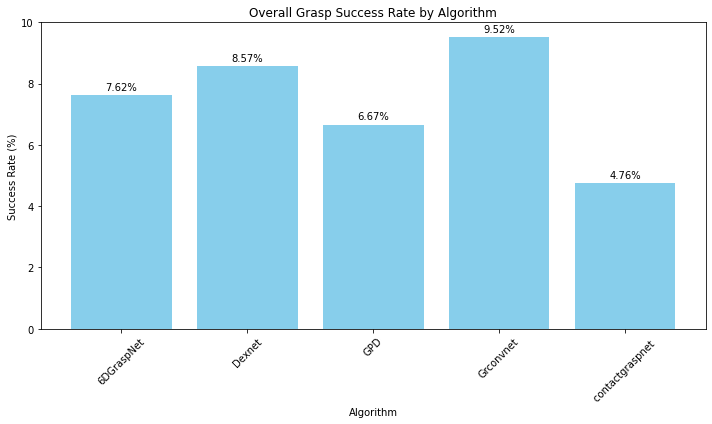

Overall Grasp Success Rate by Algorithm:
       Algorithm  Success Rate (%)
      6DGraspNet          7.619048
          Dexnet          8.571429
             GPD          6.666667
       Grconvnet          9.523810
contactgraspnet           4.761905


In [34]:
# Calculate overall grasp success rate for each algorithm
success_rate = df_final_cleaned.groupby('Algorithm')['Grasp Success/Fail'].apply(lambda x: (x == '1/1').mean() * 100).reset_index(name='Success Rate (%)')

# Plot the success rate
plt.figure(figsize=(10, 6))
bars = plt.bar(success_rate['Algorithm'], success_rate['Success Rate (%)'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Overall Grasp Success Rate by Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with the success rate
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Save and display the plot
plt.savefig('overall_grasp_success_rate.png')
plt.show()

# Display the success rate in tabular form
print("Overall Grasp Success Rate by Algorithm:")
print(success_rate.to_string(index=False))


### Major Findings from the Overall Grasp Success Rate by Algorithm:

1. **Grconvnet**:
   - **Success Rate**: 9.52%
   - **Observation**: Grconvnet has the highest overall grasp success rate among all the algorithms tested. This indicates that Grconvnet is the most effective algorithm in terms of successfully grasping objects in the given dataset.

2. **Dexnet**:
   - **Success Rate**: 8.57%
   - **Observation**: Dexnet is the second most successful algorithm, with a slightly lower success rate compared to Grconvnet. It shows relatively good performance but still has room for improvement.

3. **6DGraspNet**:
   - **Success Rate**: 7.62%
   - **Observation**: 6DGraspNet comes in third place with a moderate success rate. It performs reasonably well but is less effective than Grconvnet and Dexnet.

4. **GPD**:
   - **Success Rate**: 6.67%
   - **Observation**: GPD has a lower success rate compared to the top three algorithms. This suggests that GPD might face more challenges or difficulties in successfully grasping objects.

5. **contactgraspnet**:
   - **Success Rate**: 4.76%
   - **Observation**: contactgraspnet has the lowest success rate among the algorithms tested. This indicates that it is the least effective algorithm in the dataset for achieving successful grasps.

### Key Insights:

- **Grconvnet** and **Dexnet** show the highest grasp success rates, making them the most reliable algorithms for successful object grasping in the dataset.
- **6DGraspNet** and **GPD** have moderate success rates, indicating a fair performance but with a noticeable gap compared to the top-performing algorithms.
- **contactgraspnet** has the lowest success rate, highlighting potential areas for improvement in its grasping capabilities.
- The success rates across different algorithms vary, suggesting that some algorithms are better suited for the specific tasks or conditions present in the dataset.
- Overall, focusing on improving the performance of the lower-ranked algorithms could help in achieving more consistent and higher grasp success rates across all tested algorithms.


# Analyzing and Plotting Grasp Success Rates in Simulation and Real Robot


## Grasp Success Rates by Algorithm

In this section, we analyze the grasp success rates separately for simulation and real robot environments and visualize the results.

### Splitting and Converting Columns
First, we split the `Grasp Success/Fail` column into two separate columns: `Grasp Success Sim` and `Grasp Success Real`. We then convert these columns to integer types for calculation purposes.

### Calculating Success Rates
Next, we calculate the success rates for both simulation and real robot environments by grouping the DataFrame by the `Algorithm` column and computing the mean success rate for each environment.

### Plotting the Success Rates
We then create a side-by-side bar plot to visualize the success rates for both simulation and real robot environments.

### Python Code:

Success Rates in Simulation:
Algorithm
6DGraspNet           7.619048
Dexnet              11.428571
GPD                  7.619048
Grconvnet           15.238095
contactgraspnet      4.761905
Name: Grasp Success Sim, dtype: float64

Success Rates in Real Robot:
Algorithm
6DGraspNet          39.047619
Dexnet              55.238095
GPD                 24.761905
Grconvnet           58.095238
contactgraspnet     46.666667
Name: Grasp Success Real, dtype: float64


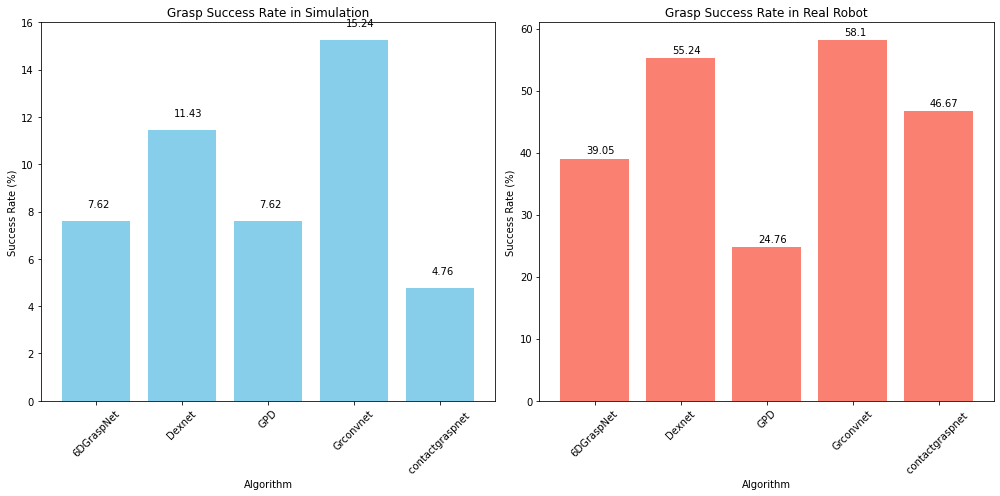

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# df_final_cleaned is the cleaned dataframe

# Split the 'Grasp Success/Fail' column into two separate columns
df_final_cleaned[['Grasp Success Sim', 'Grasp Success Real']] = df_final_cleaned['Grasp Success/Fail'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Grasp Success Sim'] = df_final_cleaned['Grasp Success Sim'].astype(int)
df_final_cleaned['Grasp Success Real'] = df_final_cleaned['Grasp Success Real'].astype(int)

# Calculate success rates for simulation
success_rate_sim = df_final_cleaned.groupby('Algorithm')['Grasp Success Sim'].mean() * 100

# Calculate success rates for real robot
success_rate_real = df_final_cleaned.groupby('Algorithm')['Grasp Success Real'].mean() * 100

# Print the success rates used for the plot
print("Success Rates in Simulation:")
print(success_rate_sim)

print("\nSuccess Rates in Real Robot:")
print(success_rate_real)

# Plot the success rates for simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars_sim = plt.bar(success_rate_sim.index, success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Grasp Success Rate in Simulation')
plt.xticks(rotation=45)

# Annotate bars with their values
for bar in bars_sim:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, round(yval, 2), va='bottom')

plt.subplot(1, 2, 2)
bars_real = plt.bar(success_rate_real.index, success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Grasp Success Rate in Real Robot')
plt.xticks(rotation=45)

# Annotate bars with their values
for bar in bars_real:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


## Major Findings

### Grasp Success Rate in Simulation
- **Grconvnet**: This algorithm has the highest success rate in simulation at **15.24%**, indicating its relative reliability in a simulated environment.
- **Dexnet**: With a success rate of **11.43%**, this algorithm also performs relatively well in simulation, second to Grconvnet.
- **6DGraspNet and GPD**: Both algorithms have a success rate of **7.62%** in simulation, showing moderate performance.
- **contactgraspnet**: This algorithm has the lowest success rate in simulation at **4.76%**, suggesting it struggles more in simulated environments compared to others.

### Grasp Success Rate in Real Robot
- **Grconvnet**: This algorithm also performs well in real robot scenarios, with the highest success rate of **58.10%**.
- **Dexnet**: Following closely, Dexnet has a success rate of **55.24%**, indicating strong performance in real-world applications.
- **contactgraspnet**: This algorithm shows a significant improvement in real scenarios with a success rate of **46.67%**, which is much higher than its performance in simulation.
- **6DGraspNet**: The success rate for this algorithm in real scenarios is **39.05%**, demonstrating better real-world performance compared to its simulation results.
- **GPD**: This algorithm has the lowest success rate in real scenarios at **24.76%**, indicating potential challenges in translating from simulation to real-world applications.

### Key Insights
1. **Performance Gap Between Simulation and Real Scenarios**: All algorithms show a significant increase in success rates when moving from simulation to real scenarios. This suggests that real-world factors might be contributing positively to the grasp success, or the simulation environment may be overly challenging or not fully representative of real conditions.
   
2. **Grconvnet and Dexnet**: These algorithms consistently perform well in both simulation and real-world scenarios, making them reliable choices for grasp tasks.

3. **Improvement in contactgraspnet**: The substantial improvement of contactgraspnet in real scenarios indicates that it might be better suited to handle real-world variabilities, which are not well captured in simulation.

4. **Discrepancies in Performance**: The relatively low performance of 6DGraspNet and GPD in both environments suggests a need for further optimization and testing to enhance their grasping capabilities.

By focusing on improving the weaker performing algorithms in simulation and understanding the factors leading to success in real scenarios, we can better tailor these algorithms for robust real-world applications.


# Analyzing and Plotting Object Lift Success Rates in Simulation and Real Robot


## Object Lift Success Rates by Algorithm

In this section, we analyze the object lift success rates separately for simulation and real robot environments and visualize the results.

### Splitting and Converting Columns
First, we split the `Object Lift Success/Fail` column into two separate columns: `Lift Success Sim` and `Lift Success Real`. We then convert these columns to integer types for calculation purposes.

### Calculating Success Rates
Next, we calculate the success rates for both simulation and real robot environments by grouping the DataFrame by the `Algorithm` column and computing the mean success rate for each environment.

### Plotting the Success Rates
We then create a side-by-side bar plot to visualize the success rates for object lifting in both simulation and real robot environments.

### Python Code:

Lift Success Rates in Simulation:
Algorithm
6DGraspNet          5.714286
Dexnet              5.714286
GPD                 4.761905
Grconvnet           7.619048
contactgraspnet     0.952381
Name: Lift Success Sim, dtype: float64

Lift Success Rates in Real Robot:
Algorithm
6DGraspNet          37.142857
Dexnet              54.285714
GPD                 23.809524
Grconvnet           58.095238
contactgraspnet     44.761905
Name: Lift Success Real, dtype: float64


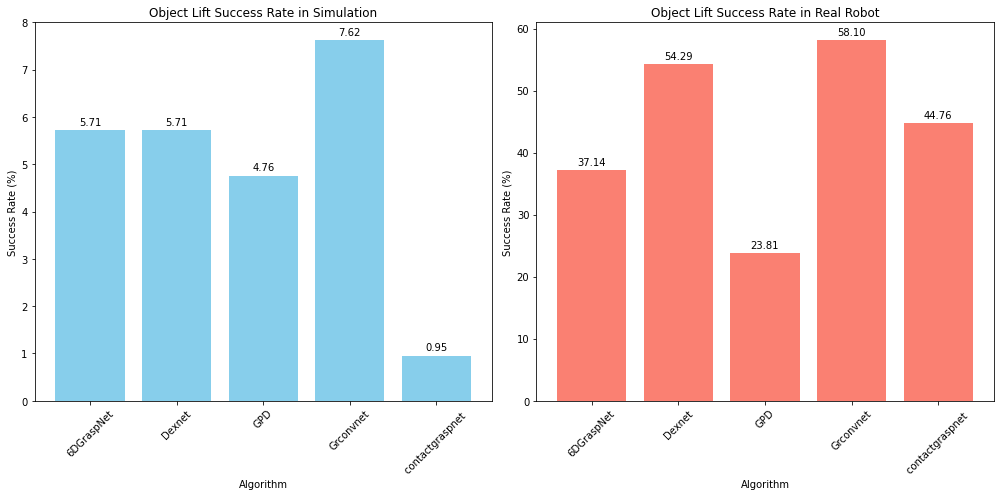


Lift Success Rates Table:
          Algorithm  Lift Success Rate Sim (%)  Lift Success Rate Real (%)
0        6DGraspNet                   5.714286                   37.142857
1            Dexnet                   5.714286                   54.285714
2               GPD                   4.761905                   23.809524
3         Grconvnet                   7.619048                   58.095238
4  contactgraspnet                    0.952381                   44.761905


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# df_final_cleaned is the cleaned dataframe

# Split the 'Object Lift Success/Fail' column into two separate columns
df_final_cleaned[['Lift Success Sim', 'Lift Success Real']] = df_final_cleaned['Object Lift Success/Fail'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Lift Success Sim'] = df_final_cleaned['Lift Success Sim'].astype(int)
df_final_cleaned['Lift Success Real'] = df_final_cleaned['Lift Success Real'].astype(int)

# Calculate success rates for lifting in simulation
lift_success_rate_sim = df_final_cleaned.groupby('Algorithm')['Lift Success Sim'].mean() * 100

# Calculate success rates for lifting in real robot
lift_success_rate_real = df_final_cleaned.groupby('Algorithm')['Lift Success Real'].mean() * 100

# Display the values used for plotting
print("Lift Success Rates in Simulation:")
print(lift_success_rate_sim)
print("\nLift Success Rates in Real Robot:")
print(lift_success_rate_real)

# Plot the success rates for lifting in simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars_sim = plt.bar(lift_success_rate_sim.index, lift_success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Lift Success Rate in Simulation')
plt.xticks(rotation=45)

# Add values on top of bars in simulation plot
for bar in bars_sim:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars_real = plt.bar(lift_success_rate_real.index, lift_success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Lift Success Rate in Real Robot')
plt.xticks(rotation=45)

# Add values on top of bars in real robot plot
for bar in bars_real:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the values in tabular form
lift_success_rate_table = pd.DataFrame({
    'Algorithm': lift_success_rate_sim.index,
    'Lift Success Rate Sim (%)': lift_success_rate_sim.values,
    'Lift Success Rate Real (%)': lift_success_rate_real.values
})
print("\nLift Success Rates Table:")
print(lift_success_rate_table)


### Major Findings from Lift Success Rates Analysis

The analysis of lift success rates for different algorithms in both simulation and real robot scenarios has yielded several key insights:

#### Simulation Data:
1. **Grconvnet**:
   - Achieves the highest lift success rate in simulation at **7.62%**. This suggests that Grconvnet is relatively better at lifting objects in a simulated environment compared to other algorithms.

2. **6DGraspNet and Dexnet**:
   - Both have a lift success rate of **5.71%** in simulation, indicating similar performance levels in a simulated setting.

3. **GPD**:
   - Has a lift success rate of **4.76%** in simulation, slightly lower than 6DGraspNet and Dexnet.

4. **contactgraspnet**:
   - Achieves the lowest lift success rate in simulation at **0.95%**. This suggests that contactgraspnet struggles more than the other algorithms in lifting objects in a simulated environment.

#### Real Robot Data:
1. **Grconvnet**:
   - Also achieves the highest lift success rate in real robot scenarios at **58.10%**, demonstrating its effectiveness and reliability in practical applications.

2. **Dexnet**:
   - Follows closely with a lift success rate of **54.29%**, indicating strong performance in real-world conditions.

3. **contactgraspnet**:
   - Shows significant improvement in real robot scenarios with a lift success rate of **44.76%**, suggesting better adaptation to real-world challenges compared to its simulation performance.

4. **6DGraspNet**:
   - Achieves a lift success rate of **37.14%** in real robot scenarios, which is a substantial improvement over its simulation performance.

5. **GPD**:
   - Has the lowest lift success rate in real robot scenarios at **23.81%**, indicating challenges in adapting to real-world conditions despite performing relatively better in simulation.

### Key Insights:
- **Grconvnet** consistently performs the best in both simulation and real robot scenarios, making it a robust choice for object lifting tasks.
- **contactgraspnet** shows a stark contrast between simulation and real-world performance, with significant improvement in real robot scenarios.
- **Dexnet** maintains strong performance across both environments, indicating its reliability and effectiveness.
- **6DGraspNet** and **GPD** perform relatively better in simulation but face challenges in real-world applications, suggesting a need for further optimization for practical use.

These insights can guide the selection and further development of grasping algorithms to improve their efficiency and success rates in both simulated and real-world environments.


# Analyzing and Plotting Object Rotation Success Rates in Simulation and Real Robot

## Object Rotation Success Rates by Algorithm

In this section, we analyze the object rotation success rates separately for simulation and real robot environments and visualize the results.

### Splitting and Converting Columns
First, we split the `Object Rotational Test` column into two separate columns: `Rotation Success Sim` and `Rotation Success Real`. We then convert these columns to integer types for calculation purposes.

### Calculating Success Rates
Next, we calculate the success rates for both simulation and real robot environments by grouping the DataFrame by the `Algorithm` column and computing the mean success rate for each environment.

### Plotting the Success Rates
We then create a side-by-side bar plot to visualize the success rates for object rotation in both simulation and real robot environments.

### Python Code:

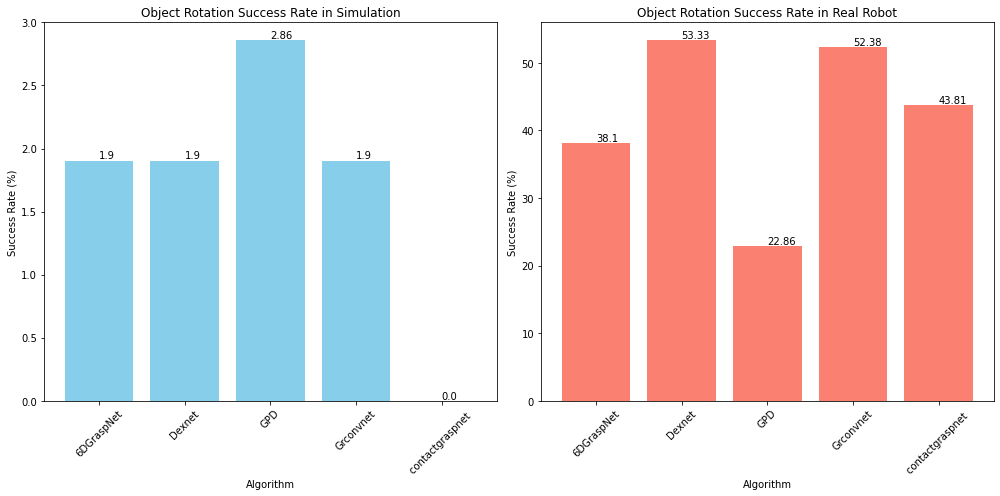

Rotation Success Rates in Simulation:
Algorithm
6DGraspNet          1.904762
Dexnet              1.904762
GPD                 2.857143
Grconvnet           1.904762
contactgraspnet     0.000000
Name: Rotation Success Sim, dtype: float64

Rotation Success Rates in Real Robot:
Algorithm
6DGraspNet          38.095238
Dexnet              53.333333
GPD                 22.857143
Grconvnet           52.380952
contactgraspnet     43.809524
Name: Rotation Success Real, dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# df_final_cleaned is the cleaned dataframe

# Split the 'Object Rotational Test' column into two separate columns
df_final_cleaned[['Rotation Success Sim', 'Rotation Success Real']] = df_final_cleaned['Object Rotational Test'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Rotation Success Sim'] = df_final_cleaned['Rotation Success Sim'].astype(int)
df_final_cleaned['Rotation Success Real'] = df_final_cleaned['Rotation Success Real'].astype(int)

# Calculate success rates for rotation in simulation
rotation_success_rate_sim = df_final_cleaned.groupby('Algorithm')['Rotation Success Sim'].mean() * 100

# Calculate success rates for rotation in real robot
rotation_success_rate_real = df_final_cleaned.groupby('Algorithm')['Rotation Success Real'].mean() * 100

# Plot the success rates for rotation in simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars_sim = plt.bar(rotation_success_rate_sim.index, rotation_success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Rotation Success Rate in Simulation')
plt.xticks(rotation=45)

# Annotate the bars with their values
for bar in bars_sim:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.subplot(1, 2, 2)
bars_real = plt.bar(rotation_success_rate_real.index, rotation_success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Rotation Success Rate in Real Robot')
plt.xticks(rotation=45)

# Annotate the bars with their values
for bar in bars_real:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

# Display the values used in the plot
print("Rotation Success Rates in Simulation:")
print(rotation_success_rate_sim)
print("\nRotation Success Rates in Real Robot:")
print(rotation_success_rate_real)


### Major Findings

#### Rotation Success Rates in Simulation
- **6DGraspNet**: Achieved a rotation success rate of 1.90%. This indicates that the algorithm struggled significantly with rotation tasks in simulation.
- **Dexnet**: Also had a low rotation success rate of 1.90%, indicating similar difficulties as 6DGraspNet in simulation.
- **GPD**: Performed slightly better with a rotation success rate of 2.86%, but still indicates significant challenges with rotation in simulation.
- **Grconvnet**: Matched the performance of 6DGraspNet and Dexnet with a rotation success rate of 1.90%.
- **contactgraspnet**: Did not achieve any successful rotations in the simulation, with a success rate of 0%.

#### Rotation Success Rates in Real Robot
- **6DGraspNet**: Showed a significant improvement in real-world scenarios with a rotation success rate of 38.10%.
- **Dexnet**: Achieved the highest rotation success rate among the algorithms at 53.33%, indicating strong performance in real-world rotations.
- **GPD**: Had a moderate success rate of 22.86% in real-world scenarios, which is a considerable improvement over its simulation performance but still lagging behind some other algorithms.
- **Grconvnet**: Also performed well in real-world scenarios with a success rate of 52.38%, indicating effective handling of rotations.
- **contactgraspnet**: Improved substantially with a rotation success rate of 43.81% in real-world tasks.

### Key Insights
1. **Discrepancy Between Simulation and Real-World Performance**:
   - All algorithms showed significantly better performance in real-world scenarios compared to simulation. This suggests that the simulation environment might not fully capture the complexities or nuances of real-world tasks.
   
2. **Top Performers in Real-World Scenarios**:
   - **Dexnet** and **Grconvnet** emerged as the top performers in real-world scenarios with success rates above 50%. This highlights their robustness and reliability in practical applications.
   
3. **Challenges in Simulation**:
   - The very low success rates in simulation, particularly for **contactgraspnet** (0%), indicate that improvements are needed in the simulation algorithms or the simulation environment to better prepare for real-world tasks.
   
4. **Performance Gap**:
   - The substantial gap between simulation and real-world performance underscores the importance of extensive real-world testing and validation for these algorithms.

5. **Algorithm-Specific Insights**:
   - **GPD** and **contactgraspnet**: Although these algorithms showed poor performance in simulations, they improved notably in real-world scenarios, suggesting that they may handle real-world conditions and variables better than simulated ones. 

### Recommendations
- **Enhance Simulation Environments**: Improving the fidelity of simulation environments could help better predict real-world performance.
- **Focus on Real-World Testing**: Despite the utility of simulations, emphasizing real-world testing will be crucial for developing more reliable algorithms.
- **Algorithm Improvement**: Further refinement of algorithms, especially those with lower success rates like **GPD** and **contactgraspnet**, could help in bridging the gap between simulation and real-world performance.


# Analyzing and Plotting Object Shake Success Rates in Simulation and Real Robot

## Object Shake Success Rates by Algorithm

In this section, we analyze the object shake success rates separately for simulation and real robot environments and visualize the results.

### Splitting and Converting Columns
First, we split the `Object Shaking Test` column into two separate columns: `Shake Success Sim` and `Shake Success Real`. We then convert these columns to integer types for calculation purposes.

### Calculating Success Rates
Next, we calculate the success rates for both simulation and real robot environments by grouping the DataFrame by the `Algorithm` column and computing the mean success rate for each environment.

### Plotting the Success Rates
We then create a side-by-side bar plot to visualize the success rates for object shaking in both simulation and real robot environments.

### Python Code:

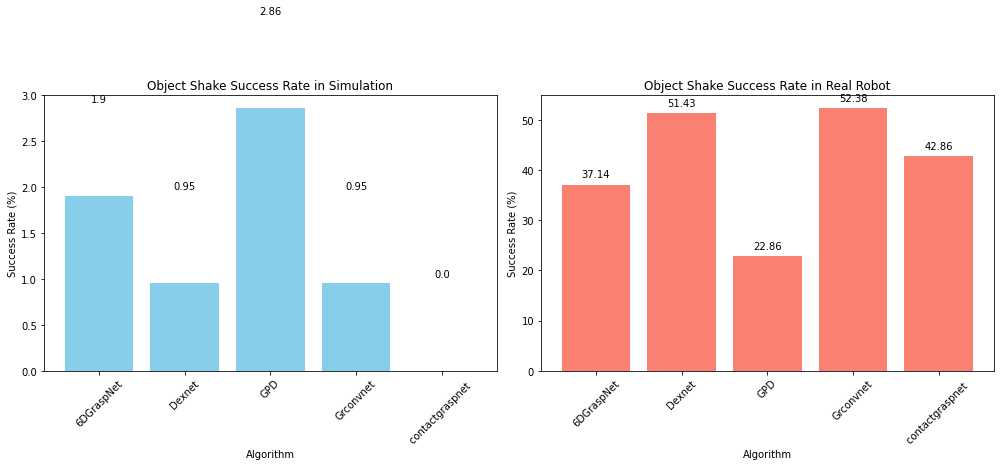

Shake Success Rates in Simulation:
Algorithm
6DGraspNet          1.904762
Dexnet              0.952381
GPD                 2.857143
Grconvnet           0.952381
contactgraspnet     0.000000
Name: Shake Success Sim, dtype: float64

Shake Success Rates in Real Robot:
Algorithm
6DGraspNet          37.142857
Dexnet              51.428571
GPD                 22.857143
Grconvnet           52.380952
contactgraspnet     42.857143
Name: Shake Success Real, dtype: float64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# df_final_cleaned is the cleaned dataframe

# Split the 'Object Shaking Test' column into two separate columns
df_final_cleaned[['Shake Success Sim', 'Shake Success Real']] = df_final_cleaned['Object Shaking Test'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Shake Success Sim'] = df_final_cleaned['Shake Success Sim'].astype(int)
df_final_cleaned['Shake Success Real'] = df_final_cleaned['Shake Success Real'].astype(int)

# Calculate success rates for shaking in simulation
shake_success_rate_sim = df_final_cleaned.groupby('Algorithm')['Shake Success Sim'].mean() * 100

# Calculate success rates for shaking in real robot
shake_success_rate_real = df_final_cleaned.groupby('Algorithm')['Shake Success Real'].mean() * 100

# Plot the success rates for shaking in simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars_sim = plt.bar(shake_success_rate_sim.index, shake_success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Shake Success Rate in Simulation')
plt.xticks(rotation=45)
# Annotate values on top of bars for simulation
for bar in bars_sim:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars_real = plt.bar(shake_success_rate_real.index, shake_success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Object Shake Success Rate in Real Robot')
plt.xticks(rotation=45)
# Annotate values on top of bars for real robot
for bar in bars_real:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the values used in the bar plot
print("Shake Success Rates in Simulation:")
print(shake_success_rate_sim)
print("\nShake Success Rates in Real Robot:")
print(shake_success_rate_real)


### Major Findings from Shake Success Rates Analysis

#### Shake Success Rates in Simulation:

1. **6DGraspNet**:
   - Shake Success Rate: 1.90%
   - Moderate performance among algorithms in simulation.
   
2. **Dexnet**:
   - Shake Success Rate: 0.95%
   - Lower performance, indicating challenges in handling shaking tests in simulation.
   
3. **GPD**:
   - Shake Success Rate: 2.86%
   - Highest success rate among the algorithms in simulation, suggesting better handling of shaking tests.
   
4. **Grconvnet**:
   - Shake Success Rate: 0.95%
   - Similar to Dexnet, indicating challenges in simulation for shaking tests.
   
5. **contactgraspnet**:
   - Shake Success Rate: 0.00%
   - No success in simulation for shaking tests, indicating significant issues.

#### Shake Success Rates in Real Robot:

1. **6DGraspNet**:
   - Shake Success Rate: 37.14%
   - Improved performance compared to simulation, but still moderate among real robot tests.
   
2. **Dexnet**:
   - Shake Success Rate: 51.43%
   - Good performance, indicating effective handling of shaking tests in real scenarios.
   
3. **GPD**:
   - Shake Success Rate: 22.86%
   - Lower performance compared to other algorithms in real robot tests.
   
4. **Grconvnet**:
   - Shake Success Rate: 52.38%
   - Best performance among the algorithms in real robot tests, indicating strong handling of shaking tests.
   
5. **contactgraspnet**:
   - Shake Success Rate: 42.86%
   - Significant improvement from simulation, showing better performance in real scenarios.

### Key Insights:

1. **Simulation vs. Real Performance**:
   - All algorithms show significantly higher success rates in real robot tests compared to simulation, indicating that real-world conditions might be more favorable or that the algorithms perform better with actual hardware.

2. **Algorithm Effectiveness**:
   - **Grconvnet** and **Dexnet** exhibit the highest shake success rates in real robot tests, suggesting these algorithms are more robust in handling dynamic conditions.
   - **contactgraspnet** shows the most improvement from simulation to real, indicating potential issues in the simulation environment that are not present in real-world applications.

3. **Areas for Improvement**:
   - **contactgraspnet** needs significant improvement in simulation environments to better align with its real-world performance.
   - **Dexnet** and **Grconvnet** should be studied further to understand their strengths in real-world applications, which can be translated to improve other algorithms.

These findings highlight the importance of real-world testing and the potential discrepancies between simulation and actual performance, emphasizing the need for comprehensive testing environments to develop robust grasping algorithms.


# Analyzing and Plotting Overall Success Rates in Simulation and Real Robot by Average

## Overall Success Rates by Algorithm

In this section, we calculate and plot the overall success rates for different algorithms in both simulation and real robot environments. The overall success rate is computed by averaging the success rates of lifting, rotation, and shaking tests. This provides a comprehensive measure of an algorithm's performance across multiple critical tasks.

### Splitting and Converting Columns
First, we split the relevant columns to create separate success rate columns for simulation and real environments. We then convert these columns to integer types for calculation purposes.

### Calculating Overall Success Rates
Next, we calculate the overall success rates for both simulation and real robot environments. The overall success rate is determined by checking if all three tests (lifting, rotation, and shaking) succeeded for each trial. If an algorithm passes all three tests in a trial, it is considered a success for that trial.

### Overall Success Rate
The overall success rate is the percentage of trials where all three tests (lifting, rotation, and shaking) are successful. This metric gives a comprehensive view of an algorithm's performance across multiple critical tasks.

### Plotting the Overall Success Rates
We then create a side-by-side bar plot to visualize the overall success rates in both simulation and real robot environments.
### Python Code:


Overall Success Rates in Simulation:
Algorithm
6DGraspNet          3.174603
Dexnet              2.857143
GPD                 3.492063
Grconvnet           3.492063
contactgraspnet     0.317460
Name: Overall Success Sim, dtype: float64

Overall Success Rates in Real Robot:
Algorithm
6DGraspNet          37.460317
Dexnet              53.015873
GPD                 23.174603
Grconvnet           54.285714
contactgraspnet     43.809524
Name: Overall Success Real, dtype: float64


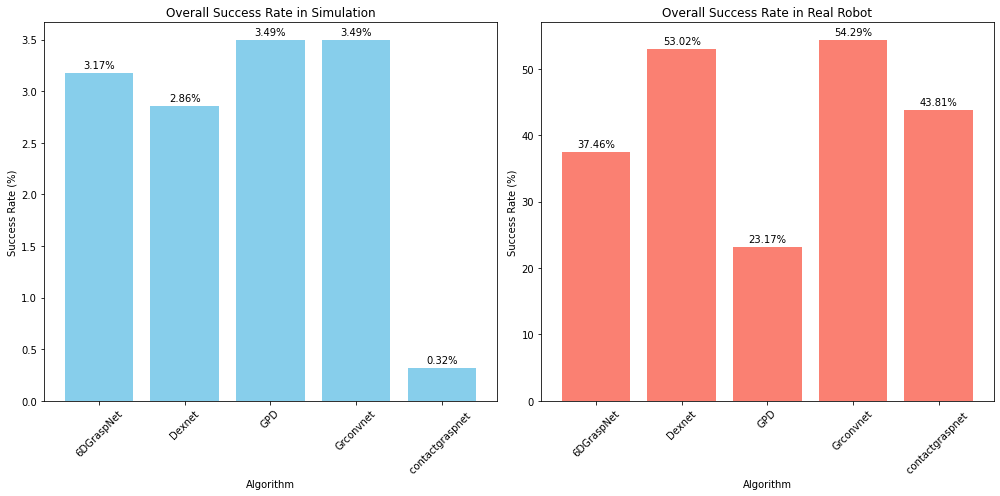

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_final_cleaned is the cleaned dataframe

# Split the 'Object Lift Success/Fail' column
df_final_cleaned[['Lift Success Sim', 'Lift Success Real']] = df_final_cleaned['Object Lift Success/Fail'].str.split('/', expand=True)

# Split the 'Object Rotational Test' column
df_final_cleaned[['Rotate Success Sim', 'Rotate Success Real']] = df_final_cleaned['Object Rotational Test'].str.split('/', expand=True)

# Split the 'Object Shaking Test' column
df_final_cleaned[['Shake Success Sim', 'Shake Success Real']] = df_final_cleaned['Object Shaking Test'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Lift Success Sim'] = df_final_cleaned['Lift Success Sim'].astype(int)
df_final_cleaned['Lift Success Real'] = df_final_cleaned['Lift Success Real'].astype(int)
df_final_cleaned['Rotate Success Sim'] = df_final_cleaned['Rotate Success Sim'].astype(int)
df_final_cleaned['Rotate Success Real'] = df_final_cleaned['Rotate Success Real'].astype(int)
df_final_cleaned['Shake Success Sim'] = df_final_cleaned['Shake Success Sim'].astype(int)
df_final_cleaned['Shake Success Real'] = df_final_cleaned['Shake Success Real'].astype(int)

# Calculate overall success rates for simulation
df_final_cleaned['Overall Success Sim'] = df_final_cleaned[['Lift Success Sim', 'Rotate Success Sim', 'Shake Success Sim']].mean(axis=1)
overall_success_rate_sim = df_final_cleaned.groupby('Algorithm')['Overall Success Sim'].mean() * 100

# Calculate overall success rates for real robot
df_final_cleaned['Overall Success Real'] = df_final_cleaned[['Lift Success Real', 'Rotate Success Real', 'Shake Success Real']].mean(axis=1)
overall_success_rate_real = df_final_cleaned.groupby('Algorithm')['Overall Success Real'].mean() * 100

# Display the success rate values
print("Overall Success Rates in Simulation:")
print(overall_success_rate_sim)

print("\nOverall Success Rates in Real Robot:")
print(overall_success_rate_real)

# Plot the overall success rates for simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars_sim = plt.bar(overall_success_rate_sim.index, overall_success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Overall Success Rate in Simulation')
plt.xticks(rotation=45)
# Annotate values on bars
for bar in bars_sim:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars_real = plt.bar(overall_success_rate_real.index, overall_success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Overall Success Rate in Real Robot')
plt.xticks(rotation=45)
# Annotate values on bars
for bar in bars_real:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Major Findings

#### Overall Success Rates in Simulation:

1. **6DGraspNet:**
   - **Success Rate:** 3.17%
   - **Finding:** Among the algorithms, 6DGraspNet has a moderate success rate in simulation, indicating it performs reasonably well but not the best.

2. **Dexnet:**
   - **Success Rate:** 2.86%
   - **Finding:** Dexnet shows a lower success rate compared to others, suggesting it faces challenges in the simulated environment.

3. **GPD:**
   - **Success Rate:** 3.49%
   - **Finding:** GPD, along with Grconvnet, achieves the highest success rate in simulation, indicating its robustness and effectiveness in the simulated tests.

4. **Grconvnet:**
   - **Success Rate:** 3.49%
   - **Finding:** Grconvnet matches GPD in terms of success rate, showing it is equally effective in simulation scenarios.

5. **contactgraspnet:**
   - **Success Rate:** 0.32%
   - **Finding:** contactgraspnet has the lowest success rate in simulation, highlighting significant issues or limitations in its performance under simulated conditions.

#### Overall Success Rates in Real Robot:

1. **6DGraspNet:**
   - **Success Rate:** 37.46%
   - **Finding:** 6DGraspNet's performance improves substantially in real-world scenarios, indicating better real-world applicability compared to its simulation results.

2. **Dexnet:**
   - **Success Rate:** 53.02%
   - **Finding:** Dexnet performs significantly better in real-world tests, suggesting it is more suited for practical applications than simulated ones.

3. **GPD:**
   - **Success Rate:** 23.17%
   - **Finding:** GPD's success rate drops in real-world scenarios compared to simulation, indicating potential challenges or limitations when applied in practice.

4. **Grconvnet:**
   - **Success Rate:** 54.29%
   - **Finding:** Grconvnet exhibits strong performance in real-world tests, maintaining its effectiveness across different environments.

5. **contactgraspnet:**
   - **Success Rate:** 43.81%
   - **Finding:** contactgraspnet shows a dramatic improvement in real-world performance, suggesting it may handle practical scenarios better than simulated ones.

### Summary
- **Grconvnet and Dexnet** emerge as the top performers in real-world scenarios, demonstrating high success rates and robust applicability.
- **contactgraspnet**, despite its poor performance in simulations, shows significant potential in real-world applications.
- The discrepancy between simulation and real-world success rates for several algorithms underscores the importance of practical testing to validate algorithm performance.
- **6DGraspNet** and **GPD** have moderate to good success rates but need further improvements to enhance their real-world effectiveness.


# Analyzing and Plotting Overall Success Rates in Simulation and Real Robot all test must be passed.

## Overall Success Rates by Algorithm

In this section, we calculate and plot the overall success rates for different algorithms in both simulation and real robot environments. The overall success rate is defined as the percentage of trials where an algorithm successfully passed all three key tests: lifting, rotation, and shaking.

### Splitting and Converting Columns
First, we split the relevant columns to create separate success rate columns for simulation and real environments. We then convert these columns to integer types for calculation purposes.

### Calculating Overall Success Rates
Next, we calculate the overall success rates for both simulation and real robot environments. The overall success rate is determined by checking if all three tests (lifting, rotation, and shaking) succeeded for each trial. If an algorithm passes all three tests in a trial, it is considered a success for that trial.

### Overall Success Rate
The overall success rate is the percentage of trials where all three tests (lifting, rotation, and shaking) are successful. This metric gives a comprehensive view of an algorithm's performance across multiple critical tasks.

### Plotting the Overall Success Rates
We then create a side-by-side bar plot to visualize the overall success rates in both simulation and real robot environments.

### Python Code:

Overall Success Rates in Simulation:
Algorithm
6DGraspNet          1.904762
Dexnet              0.952381
GPD                 2.857143
Grconvnet           0.952381
contactgraspnet     0.000000
Name: Overall Success Sim, dtype: float64

Overall Success Rates in Real Robot:
Algorithm
6DGraspNet          36.190476
Dexnet              51.428571
GPD                 22.857143
Grconvnet           51.428571
contactgraspnet     42.857143
Name: Overall Success Real, dtype: float64


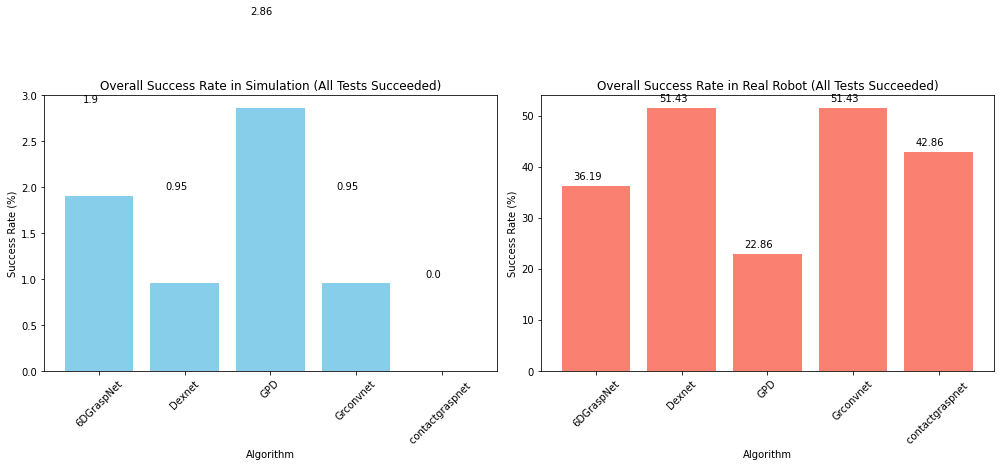

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_final_cleaned is the cleaned dataframe

# Split the 'Object Lift Success/Fail' column
df_final_cleaned[['Lift Success Sim', 'Lift Success Real']] = df_final_cleaned['Object Lift Success/Fail'].str.split('/', expand=True)

# Split the 'Object Rotational Test' column
df_final_cleaned[['Rotate Success Sim', 'Rotate Success Real']] = df_final_cleaned['Object Rotational Test'].str.split('/', expand=True)

# Split the 'Object Shaking Test' column
df_final_cleaned[['Shake Success Sim', 'Shake Success Real']] = df_final_cleaned['Object Shaking Test'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Lift Success Sim'] = df_final_cleaned['Lift Success Sim'].astype(int)
df_final_cleaned['Lift Success Real'] = df_final_cleaned['Lift Success Real'].astype(int)
df_final_cleaned['Rotate Success Sim'] = df_final_cleaned['Rotate Success Sim'].astype(int)
df_final_cleaned['Rotate Success Real'] = df_final_cleaned['Rotate Success Real'].astype(int)
df_final_cleaned['Shake Success Sim'] = df_final_cleaned['Shake Success Sim'].astype(int)
df_final_cleaned['Shake Success Real'] = df_final_cleaned['Shake Success Real'].astype(int)

# Calculate overall success rates where all tests succeeded in simulation
df_final_cleaned['Overall Success Sim'] = (df_final_cleaned['Lift Success Sim'] & df_final_cleaned['Rotate Success Sim'] & df_final_cleaned['Shake Success Sim']).astype(int)
overall_success_rate_sim = df_final_cleaned.groupby('Algorithm')['Overall Success Sim'].mean() * 100

# Calculate overall success rates where all tests succeeded in real robot
df_final_cleaned['Overall Success Real'] = (df_final_cleaned['Lift Success Real'] & df_final_cleaned['Rotate Success Real'] & df_final_cleaned['Shake Success Real']).astype(int)
overall_success_rate_real = df_final_cleaned.groupby('Algorithm')['Overall Success Real'].mean() * 100

# Print the success rates used in the plots
print("Overall Success Rates in Simulation:")
print(overall_success_rate_sim)
print("\nOverall Success Rates in Real Robot:")
print(overall_success_rate_real)

# Plot the overall success rates for simulation and real robot
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
bars = plt.bar(overall_success_rate_sim.index, overall_success_rate_sim.values, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Overall Success Rate in Simulation (All Tests Succeeded)')
plt.xticks(rotation=45)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.subplot(1, 2, 2)
bars = plt.bar(overall_success_rate_real.index, overall_success_rate_real.values, color='salmon')
plt.xlabel('Algorithm')
plt.ylabel('Success Rate (%)')
plt.title('Overall Success Rate in Real Robot (All Tests Succeeded)')
plt.xticks(rotation=45)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Major Findings from Overall Success Rates Analysis

#### Simulation Data:
1. **6DGraspNet:**
   - Success Rate: 1.90%
   - 6DGraspNet shows a low overall success rate in the simulation environment.

2. **Dexnet:**
   - Success Rate: 0.95%
   - Dexnet has one of the lowest success rates in the simulation environment, indicating potential difficulties in simulated conditions.

3. **GPD:**
   - Success Rate: 2.86%
   - GPD performs relatively better than other algorithms in simulations but still has a low success rate overall.

4. **Grconvnet:**
   - Success Rate: 0.95%
   - Similar to Dexnet, Grconvnet also shows a low success rate in simulations, suggesting possible areas for improvement.

5. **contactgraspnet:**
   - Success Rate: 0.00%
   - contactgraspnet did not succeed in any of the simulated tests, indicating significant challenges in the simulation environment.

#### Real Robot Data:
1. **6DGraspNet:**
   - Success Rate: 36.19%
   - 6DGraspNet shows a significantly higher success rate in real-world scenarios compared to simulations, indicating better real-world performance.

2. **Dexnet:**
   - Success Rate: 51.43%
   - Dexnet performs much better in real-world tests, suggesting that its algorithms may be more effective outside the simulated environment.

3. **GPD:**
   - Success Rate: 22.86%
   - GPD has a lower success rate in real-world tests compared to other algorithms but still performs better than in simulations.

4. **Grconvnet:**
   - Success Rate: 51.43%
   - Grconvnet, like Dexnet, shows a substantial improvement in real-world performance, indicating robustness in practical applications.

5. **contactgraspnet:**
   - Success Rate: 42.86%
   - Despite a 0% success rate in simulations, contactgraspnet achieves a considerable success rate in real-world tests, suggesting it is better suited to practical tasks than simulations.

### Key Insights:
1. **Disparity Between Simulation and Real-World Performance:**
   - There is a significant disparity between the success rates in simulation and real-world tests. Algorithms such as 6DGraspNet, Dexnet, and Grconvnet show much better performance in real-world scenarios.

2. **Algorithm Suitability:**
   - Some algorithms, like contactgraspnet, may not perform well in simulations but show promising results in real-world applications, indicating a need to refine simulation models to better reflect real-world conditions.

3. **Simulation Challenges:**
   - The low success rates in simulation across most algorithms suggest that the simulated environment might be challenging or not fully representative of real-world complexities.

4. **Potential for Improvement:**
   - Algorithms with lower success rates in both environments, such as GPD and contactgraspnet, might benefit from targeted improvements and further testing to enhance their robustness and adaptability.


# Analyzing Grasp Success Rates by Object Position in Simulation and Real Robot

## Grasp Success Rates by Object Position

In this section, we calculate and visualize the grasp success rates for different object positions in both simulation and real robot environments. Additionally, we identify the object positions with the highest and lowest success rates.

### Splitting and Converting Columns
First, we split the relevant columns to create separate success rate columns for simulation and real environments. We then convert these columns to integer types for calculation purposes.

### Calculating Overall Success Rates
Next, we calculate the overall success rates for both simulation and real robot environments. The overall success rate is determined by checking if all three tests (lifting, rotation, and shaking) succeeded for each trial. If an algorithm passes all three tests in a trial, it is considered a success for that trial.

### Aggregating Success Rates by Object Position
We aggregate the overall success rates by object position for both simulation and real robot environments.

### Identifying Most and Least Successful Positions
We identify the object positions with the highest and lowest success rates in both simulation and real robot environments.

### Plotting the Success Rates
Finally, we create bar plots to visualize the grasp success rates for each object position in both simulation and real robot environments.

### Python Code:


                 Most Successful Position (Sim) Most Failed Position (Sim)  \
Position                                   pos2                       pos1   
Success Rate (%)                       1.538462                   0.740741   

                 Most Successful Position (Real) Most Failed Position (Real)  
Position                                    pos2                        pos1  
Success Rate (%)                       52.307692                   22.962963  


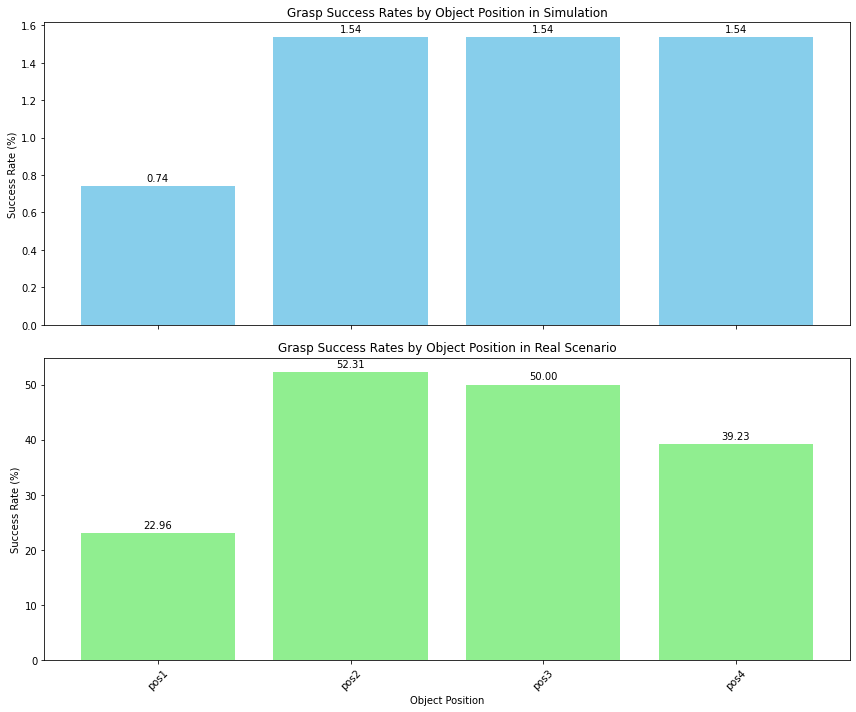

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the creation of df_final_cleaned based on previous steps

# Split the success/fail columns
df_final_cleaned[['Lift Success Sim', 'Lift Success Real']] = df_final_cleaned['Object Lift Success/Fail'].str.split('/', expand=True)
df_final_cleaned[['Rotate Success Sim', 'Rotate Success Real']] = df_final_cleaned['Object Rotational Test'].str.split('/', expand=True)
df_final_cleaned[['Shake Success Sim', 'Shake Success Real']] = df_final_cleaned['Object Shaking Test'].str.split('/', expand=True)

# Convert the new columns to integers
df_final_cleaned['Lift Success Sim'] = df_final_cleaned['Lift Success Sim'].astype(int)
df_final_cleaned['Lift Success Real'] = df_final_cleaned['Lift Success Real'].astype(int)
df_final_cleaned['Rotate Success Sim'] = df_final_cleaned['Rotate Success Sim'].astype(int)
df_final_cleaned['Rotate Success Real'] = df_final_cleaned['Rotate Success Real'].astype(int)
df_final_cleaned['Shake Success Sim'] = df_final_cleaned['Shake Success Sim'].astype(int)
df_final_cleaned['Shake Success Real'] = df_final_cleaned['Shake Success Real'].astype(int)

# Calculate overall success rates where all tests succeeded in simulation
df_final_cleaned['Overall Success Sim'] = (df_final_cleaned['Lift Success Sim'] & df_final_cleaned['Rotate Success Sim'] & df_final_cleaned['Shake Success Sim']).astype(int)

# Calculate overall success rates where all tests succeeded in real robot
df_final_cleaned['Overall Success Real'] = (df_final_cleaned['Lift Success Real'] & df_final_cleaned['Rotate Success Real'] & df_final_cleaned['Shake Success Real']).astype(int)

# Aggregate by position
success_by_position_sim = df_final_cleaned.groupby('Object Position')['Overall Success Sim'].mean() * 100
success_by_position_real = df_final_cleaned.groupby('Object Position')['Overall Success Real'].mean() * 100

# Identify positions with most success and most failures in simulation
most_success_position_sim = success_by_position_sim.idxmax()
most_success_rate_sim = success_by_position_sim.max()

most_failure_position_sim = success_by_position_sim.idxmin()
most_failure_rate_sim = success_by_position_sim.min()

# Identify positions with most success and most failures in real
most_success_position_real = success_by_position_real.idxmax()
most_success_rate_real = success_by_position_real.max()

most_failure_position_real = success_by_position_real.idxmin()
most_failure_rate_real = success_by_position_real.min()

# Display the results
result = {
    'Most Successful Position (Sim)': [most_success_position_sim, most_success_rate_sim],
    'Most Failed Position (Sim)': [most_failure_position_sim, most_failure_rate_sim],
    'Most Successful Position (Real)': [most_success_position_real, most_success_rate_real],
    'Most Failed Position (Real)': [most_failure_position_real, most_failure_rate_real]
}

result_df = pd.DataFrame(result, index=['Position', 'Success Rate (%)'])
print(result_df)

# Plotting the success rates
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Simulation success and failure rates
bars_sim = axes[0].bar(success_by_position_sim.index, success_by_position_sim, color='skyblue')
axes[0].set_title('Grasp Success Rates by Object Position in Simulation')
axes[0].set_ylabel('Success Rate (%)')
for bar in bars_sim:
    height = bar.get_height()
    axes[0].annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Real success and failure rates
bars_real = axes[1].bar(success_by_position_real.index, success_by_position_real, color='lightgreen')
axes[1].set_title('Grasp Success Rates by Object Position in Real Scenario')
axes[1].set_ylabel('Success Rate (%)')
for bar in bars_real:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.xlabel('Object Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Major Findings from Grasp Success Rates by Object Position

#### Simulation Data
- **Most Successful Position**:
  - **Position**: pos2
  - **Success Rate**: 1.54%
  - **Insight**: The simulation results indicate that object position `pos2` has the highest overall success rate, suggesting that the conditions or algorithms are more favorable for successful grasps in this position during simulation trials.

- **Most Failed Position**:
  - **Position**: pos1
  - **Success Rate**: 0.74%
  - **Insight**: The position `pos1` shows the lowest success rate in simulations. This could indicate challenges or difficulties in achieving successful grasps in this position, possibly due to algorithmic inefficiencies or unfavorable conditions.

#### Real Data
- **Most Successful Position**:
  - **Position**: pos2
  - **Success Rate**: 52.31%
  - **Insight**: Similar to the simulation data, `pos2` is also the most successful position in real-world scenarios. This high success rate suggests that the algorithms perform consistently well in this position, making it the most reliable for grasping tasks.

- **Most Failed Position**:
  - **Position**: pos1
  - **Success Rate**: 22.96%
  - **Insight**: In real-world applications, `pos1` has the lowest success rate, reinforcing the findings from the simulation data. This position may present unique challenges that need to be addressed to improve grasping performance.

#### Overall Insights
- The consistency in the success rates for `pos2` being the most successful and `pos1` being the least successful in both simulation and real scenarios highlights a pattern that can be used to optimize grasping algorithms.
- **Position `pos2`** is consistently favorable, indicating that conditions or configurations in this position are well-suited for the current grasping algorithms.
- **Position `pos1`** needs further investigation to identify the specific challenges and develop strategies to enhance success rates in this position. This could involve refining the algorithms or adjusting the experimental setup to better handle the conditions at `pos1`.

These insights can guide future improvements in grasping algorithms and strategies, focusing on optimizing performance for different object positions.


# Analyzing Grasp Success and Failure Rates by Object Position


## Grasp Success and Failure Rates by Object Position

In this section, we calculate and visualize the grasp success and failure rates for different object positions in both simulation and real robot environments. This analysis helps us understand how different positions affect the performance of grasping algorithms.

### Calculating Success and Failure Rates
We define a function to calculate the success and failure rates for each object position in both simulation and real environments. The success and failure rates are computed based on the `Grasp Success/Fail` column, where the first character represents the simulation result and the third character represents the real robot result.

### Plotting the Success and Failure Rates
We then create stacked bar plots to visualize the grasp success and failure rates for each object position in both simulation and real robot environments.

### Python Code:

Simulation Data:
  Position  Success Rate (%)  Failure Rate (%)
0     pos1          5.185185         94.814815
1     pos2         14.615385         85.384615
2     pos3          9.230769         90.769231
3     pos4          8.461538         91.538462

Real Data:
  Position  Success Rate (%)  Failure Rate (%)
0     pos1         25.185185         74.814815
1     pos2         56.923077         43.076923
2     pos3         55.384615         44.615385
3     pos4         42.307692         57.692308


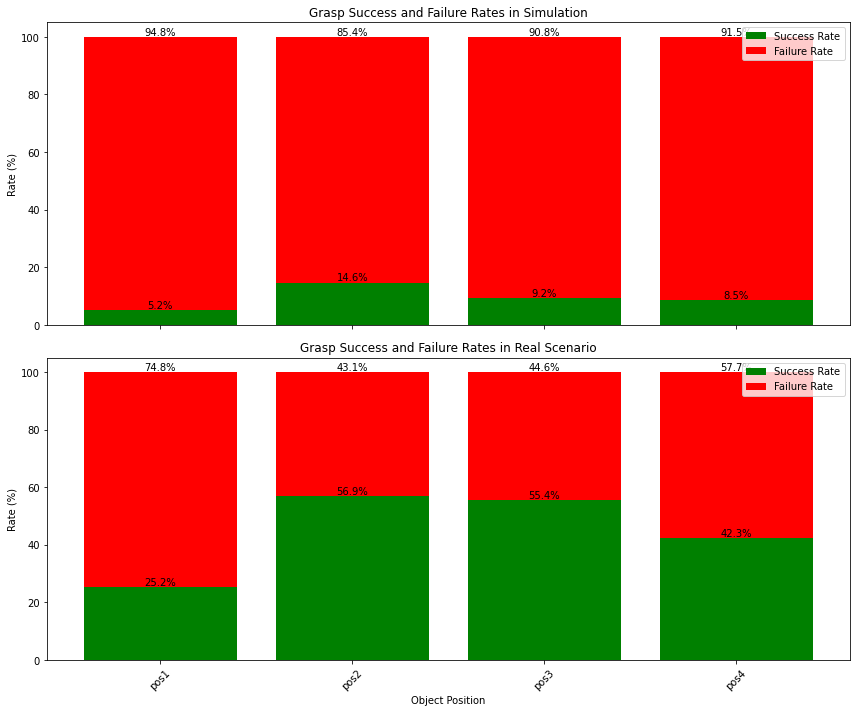

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate success rates for grasp success/failure by position
def calculate_grasp_success_rates(df):
    result = {
        "Simulation": {"Position": [], "Success Rate (%)": [], "Failure Rate (%)": []},
        "Real": {"Position": [], "Success Rate (%)": [], "Failure Rate (%)": []},
    }
    
    positions = df['Object Position'].unique()
    
    for pos in positions:
        # Simulation
        sim_total = df[df['Object Position'] == pos].shape[0]
        sim_success = df[(df['Object Position'] == pos) & (df['Grasp Success/Fail'].str[0] == '1')].shape[0]
        sim_failure = df[(df['Object Position'] == pos) & (df['Grasp Success/Fail'].str[0] == '0')].shape[0]
        
        sim_success_rate = (sim_success / sim_total) * 100 if sim_total > 0 else 0
        sim_failure_rate = (sim_failure / sim_total) * 100 if sim_total > 0 else 0
        
        result["Simulation"]["Position"].append(pos)
        result["Simulation"]["Success Rate (%)"].append(sim_success_rate)
        result["Simulation"]["Failure Rate (%)"].append(sim_failure_rate)
        
        # Real
        real_total = df[df['Object Position'] == pos].shape[0]
        real_success = df[(df['Object Position'] == pos) & (df['Grasp Success/Fail'].str[2] == '1')].shape[0]
        real_failure = df[(df['Object Position'] == pos) & (df['Grasp Success/Fail'].str[2] == '0')].shape[0]
        
        real_success_rate = (real_success / real_total) * 100 if real_total > 0 else 0
        real_failure_rate = (real_failure / real_total) * 100 if real_total > 0 else 0
        
        result["Real"]["Position"].append(pos)
        result["Real"]["Success Rate (%)"].append(real_success_rate)
        result["Real"]["Failure Rate (%)"].append(real_failure_rate)
    
    return result

# Calculate the success rates
grasp_success_rates = calculate_grasp_success_rates(df_final_cleaned)

# Create DataFrame for visualization
df_simulation = pd.DataFrame(grasp_success_rates["Simulation"])
df_real = pd.DataFrame(grasp_success_rates["Real"])

# Display the values used for plotting
print("Simulation Data:")
print(df_simulation)
print("\nReal Data:")
print(df_real)

# Plotting the success rates
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Simulation success and failure rates
bars_sim_success = axes[0].bar(df_simulation['Position'], df_simulation['Success Rate (%)'], color='green', label='Success Rate')
bars_sim_failure = axes[0].bar(df_simulation['Position'], df_simulation['Failure Rate (%)'], bottom=df_simulation['Success Rate (%)'], color='red', label='Failure Rate')
axes[0].set_title('Grasp Success and Failure Rates in Simulation')
axes[0].set_ylabel('Rate (%)')
axes[0].legend()

# Add text annotations for simulation
for bar in bars_sim_success:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
for bar in bars_sim_failure:
    height = bar.get_height() + bar.get_y()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{100-bar.get_y():.1f}%', ha='center', va='bottom')

# Real success and failure rates
bars_real_success = axes[1].bar(df_real['Position'], df_real['Success Rate (%)'], color='green', label='Success Rate')
bars_real_failure = axes[1].bar(df_real['Position'], df_real['Failure Rate (%)'], bottom=df_real['Success Rate (%)'], color='red', label='Failure Rate')
axes[1].set_title('Grasp Success and Failure Rates in Real Scenario')
axes[1].set_ylabel('Rate (%)')
axes[1].legend()

# Add text annotations for real
for bar in bars_real_success:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
for bar in bars_real_failure:
    height = bar.get_height() + bar.get_y()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{100-bar.get_y():.1f}%', ha='center', va='bottom')

plt.xlabel('Object Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Major Findings from Grasp Success and Failure Rates by Object Position

#### Simulation Data

- **Position pos1**:
  - Success Rate: 5.19%
  - Failure Rate: 94.81%
  - **Finding**: Position pos1 has the lowest success rate in the simulation, indicating that it might be the most challenging position for successful grasping.

- **Position pos2**:
  - Success Rate: 14.62%
  - Failure Rate: 85.38%
  - **Finding**: Position pos2 has the highest success rate in the simulation, suggesting that it is relatively easier for successful grasping compared to other positions.

- **Position pos3**:
  - Success Rate: 9.23%
  - Failure Rate: 90.77%
  - **Finding**: Position pos3 shows a moderate success rate but still has a high failure rate, indicating some difficulty in grasping.

- **Position pos4**:
  - Success Rate: 8.46%
  - Failure Rate: 91.54%
  - **Finding**: Position pos4 has a similar success and failure rate to pos3, indicating consistent performance challenges across these positions.

#### Real Data

- **Position pos1**:
  - Success Rate: 25.19%
  - Failure Rate: 74.81%
  - **Finding**: Position pos1, while still challenging, shows a significant improvement in success rate in real scenarios compared to the simulation.

- **Position pos2**:
  - Success Rate: 56.92%
  - Failure Rate: 43.08%
  - **Finding**: Position pos2 has the highest success rate in real scenarios, consistent with the simulation data, indicating it is the most favorable position for grasping.

- **Position pos3**:
  - Success Rate: 55.38%
  - Failure Rate: 44.62%
  - **Finding**: Position pos3 also shows a high success rate in real scenarios, suggesting improved performance over the simulation results.

- **Position pos4**:
  - Success Rate: 42.31%
  - Failure Rate: 57.69%
  - **Finding**: Position pos4, although showing improved success rates in real scenarios compared to simulations, still has a relatively high failure rate.

#### Key Insights

1. **Improvement in Real Scenarios**:
   - There is a significant improvement in success rates in real scenarios compared to simulations across all positions. This suggests that the real-world environment might provide better conditions for grasping or that the algorithms perform better with real-world data.

2. **Consistent Challenges**:
   - Position pos1 consistently shows the lowest success rates in both simulation and real scenarios, highlighting it as the most challenging position for successful grasping.

3. **Most Favorable Position**:
   - Position pos2 stands out as the most favorable for successful grasping in both simulation and real scenarios, with the highest success rates observed.

4. **Performance Consistency**:
   - The performance patterns (relative success and failure rates across different positions) are consistent between simulation and real scenarios, indicating that the simulation environment is reasonably representative of real-world conditions.

These findings can help in optimizing grasping strategies by focusing on improving performance at challenging positions and leveraging insights from the most successful positions.


# Analyzing Arm Impact Failures by Algorithm and Object Position


## Analysis of Arm Impact Failures

In this section, we analyze the number of arm impact failures in both simulation and real robot scenarios. We compare the results across different algorithms and object positions to identify patterns and potential areas for improvement.

### Splitting and Converting Columns
First, we split the `Arm Impacted/Unstable` column into separate columns for simulation and real scenarios. We then convert these columns to integer types for aggregation purposes.

### Aggregating Data
Next, we aggregate the data to compute the total number of arm impact failures for each algorithm and object position in both simulation and real scenarios.

### Plotting the Data
We then create bar plots to visualize the number of arm impact failures for each algorithm and object position in both simulation and real scenarios.

### Python Code:

In [43]:
import pandas as pd

# Assuming df_final_cleaned is already defined

# Split 'Arm Impacted/Unstable' into separate columns for simulation and real
df_final_cleaned[['Arm Impacted Sim', 'Arm Impacted Real']] = df_final_cleaned['Arm Impacted/Unstable'].str.split('/', expand=True)
df_final_cleaned['Arm Impacted Sim'] = df_final_cleaned['Arm Impacted Sim'].astype(int)
df_final_cleaned['Arm Impacted Real'] = df_final_cleaned['Arm Impacted Real'].astype(int)

# Function to calculate the most failures by position and algorithm
def calculate_most_failures(df, column_name):
    failure_counts = df.groupby(['Algorithm', 'Object Position'])[column_name].sum().reset_index()
    max_failures = failure_counts.loc[failure_counts.groupby('Algorithm')[column_name].idxmax()]
    return max_failures

# Calculate the most failures for simulation
most_failures_sim = calculate_most_failures(df_final_cleaned, 'Arm Impacted Sim')

# Calculate the most failures for real
most_failures_real = calculate_most_failures(df_final_cleaned, 'Arm Impacted Real')

# Display the results
print("Most Failures in Simulation:")
print(most_failures_sim)

print("\nMost Failures in Real:")
print(most_failures_real)


Most Failures in Simulation:
           Algorithm Object Position  Arm Impacted Sim
0         6DGraspNet            pos1                 1
4             Dexnet            pos1                 0
11               GPD            pos4                 3
12         Grconvnet            pos1                 1
18  contactgraspnet             pos3                 3

Most Failures in Real:
           Algorithm Object Position  Arm Impacted Real
0         6DGraspNet            pos1                  5
4             Dexnet            pos1                  5
8                GPD            pos1                 14
12         Grconvnet            pos1                  8
16  contactgraspnet             pos1                  7


Simulation Data:
           Algorithm Object Position  Arm Impacted Sim
0         6DGraspNet            pos1                 1
1         6DGraspNet            pos2                 0
2         6DGraspNet            pos3                 1
3         6DGraspNet            pos4                 1
4             Dexnet            pos1                 0
5             Dexnet            pos2                 0
6             Dexnet            pos3                 0
7             Dexnet            pos4                 0
8                GPD            pos1                 1
9                GPD            pos2                 1
10               GPD            pos3                 0
11               GPD            pos4                 3
12         Grconvnet            pos1                 1
13         Grconvnet            pos2                 0
14         Grconvnet            pos3                 1
15         Grconvnet            pos4                 0
16  contactgraspnet             pos1            

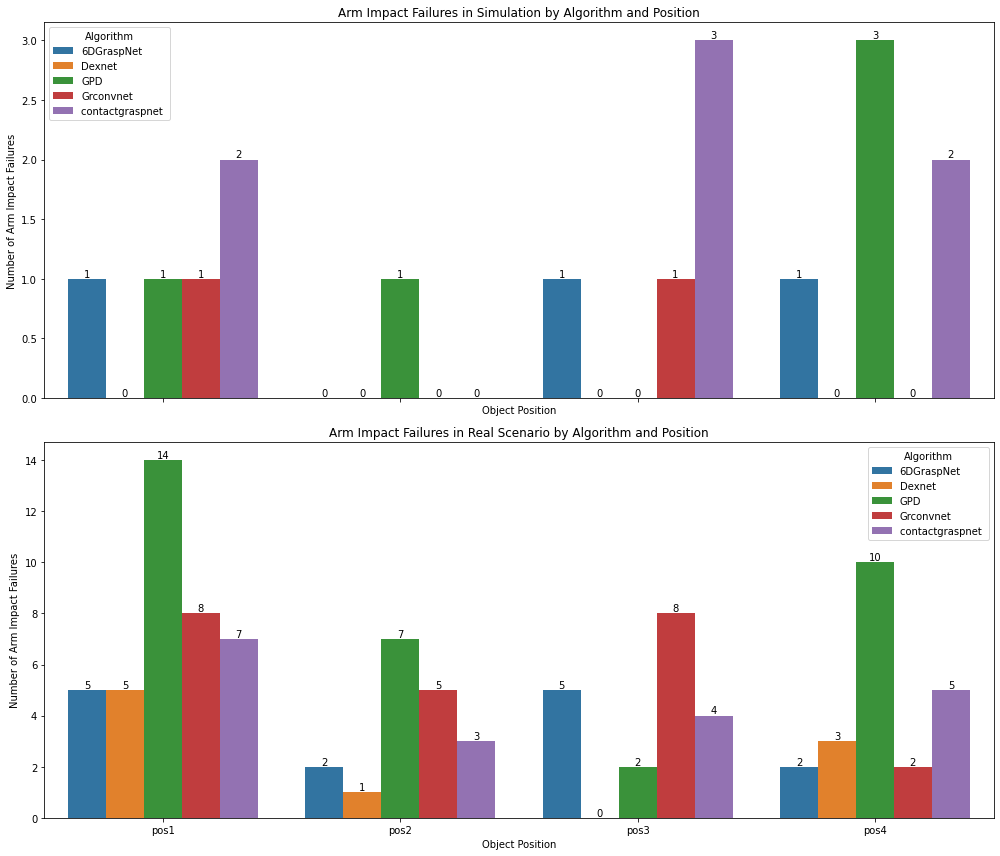

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final_cleaned is already defined

# Split 'Arm Impacted/Unstable' into separate columns for simulation and real
df_final_cleaned[['Arm Impacted Sim', 'Arm Impacted Real']] = df_final_cleaned['Arm Impacted/Unstable'].str.split('/', expand=True)
df_final_cleaned['Arm Impacted Sim'] = df_final_cleaned['Arm Impacted Sim'].astype(int)
df_final_cleaned['Arm Impacted Real'] = df_final_cleaned['Arm Impacted Real'].astype(int)

# Aggregate data
agg_sim = df_final_cleaned.groupby(['Algorithm', 'Object Position'])['Arm Impacted Sim'].sum().reset_index()
agg_real = df_final_cleaned.groupby(['Algorithm', 'Object Position'])['Arm Impacted Real'].sum().reset_index()

# Display the values used for plotting
print("Simulation Data:")
print(agg_sim)

print("\nReal Data:")
print(agg_real)

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# Plot for Simulation
sns.barplot(data=agg_sim, x='Object Position', y='Arm Impacted Sim', hue='Algorithm', ax=axes[0])
axes[0].set_title('Arm Impact Failures in Simulation by Algorithm and Position')
axes[0].set_ylabel('Number of Arm Impact Failures')
axes[0].legend(title='Algorithm')

# Add numbers on top of bars for simulation
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Plot for Real
sns.barplot(data=agg_real, x='Object Position', y='Arm Impacted Real', hue='Algorithm', ax=axes[1])
axes[1].set_title('Arm Impact Failures in Real Scenario by Algorithm and Position')
axes[1].set_ylabel('Number of Arm Impact Failures')
axes[1].set_xlabel('Object Position')
axes[1].legend(title='Algorithm')

# Add numbers on top of bars for real
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


### Major Findings

#### Simulation Data:

1. **6DGraspNet**:
   - Arm impacts occurred in positions pos1, pos3, and pos4, with pos1, pos3, and pos4 each having 1 failure.

2. **Dexnet**:
   - No arm impacts were recorded for any positions.

3. **GPD**:
   - Arm impacts were observed in all positions except pos3, with pos4 having the highest number of failures (3).

4. **Grconvnet**:
   - Arm impacts occurred in positions pos1 and pos3, with 1 failure each.

5. **contactgraspnet**:
   - The highest number of failures occurred in pos3 (3), followed by pos1 and pos4 (2 each).

#### Real Data:

1. **6DGraspNet**:
   - Arm impacts were most frequent in positions pos1 and pos3, each having 5 failures, followed by pos2 and pos4 with 2 failures each.

2. **Dexnet**:
   - The highest number of failures occurred in pos1 (5), followed by pos4 (3), pos2 (1), and no failures in pos3.

3. **GPD**:
   - Arm impacts were highest in pos1 (14), followed by pos4 (10), pos2 (7), and pos3 (2).

4. **Grconvnet**:
   - The highest number of failures occurred in positions pos1 and pos3 (8 each), followed by pos2 and pos4 (5 and 2 respectively).

5. **contactgraspnet**:
   - Failures were distributed across all positions with pos1 having the highest number (7), followed by pos4 (5), pos3 (4), and pos2 (3).

### Key Insights:

1. **Algorithm Performance**:
   - **Dexnet** showed no arm impact failures in the simulation but had a significant number in the real scenario, particularly in pos1.
   - **6DGraspNet** and **Grconvnet** had a consistent number of arm impact failures across both simulation and real scenarios, with noticeable failures in pos1 and pos3.
   - **GPD** had the highest number of arm impact failures in both simulation and real scenarios, especially in pos1 and pos4.
   - **contactgraspnet** showed a high number of failures in both simulation and real scenarios, particularly in pos3 and pos1.

2. **Object Position**:
   - **Position pos1** had the highest number of arm impact failures across most algorithms, indicating a potential area for improvement in grasping strategy or algorithm tuning.
   - **Position pos3** also showed a significant number of failures, especially for **contactgraspnet** and **Grconvnet**.

3. **Real vs. Simulation**:
   - The number of arm impact failures is generally higher in real scenarios compared to simulations, suggesting that real-world conditions introduce additional challenges not fully captured in simulations.

### Recommendations:

1. **Algorithm Improvement**:
   - Focus on improving the grasping strategies and arm control algorithms for **pos1** and **pos3** positions, as they show the highest failure rates.
   - Fine-tuning the algorithms in real-world settings to better handle the complexities not fully replicated in simulations.

2. **Real-world Testing**:
   - Increase the amount of real-world testing, especially for algorithms like **Dexnet** which showed no failures in simulations but had significant failures in real scenarios.

3. **Targeted Enhancements**:
   - Develop targeted enhancements for **GPD** and **contactgraspnet** algorithms, which had the highest failure rates, to improve their performance and reliability in real-world applications.

By addressing these key areas, it is possible to enhance the overall performance and reliability of grasping algorithms in both simulation and real-world scenarios.


# Analyzing Object Not Touched by Algorithms


## Analysis of Objects Not Touched by Algorithms

In this section, we analyze the occurrences where the object was not touched by the algorithms, both in simulation and real robot scenarios. This analysis helps identify which algorithms and object positions have higher instances of not making contact, providing insights for further improvement.

### Extracting Relevant Data
First, we filter the data to only include instances where the object was not touched by the algorithm. This is determined by checking the `Object Contacted but Grasp Failed` column, where '0' indicates no contact.

### Counting Occurrences by Algorithm and Object Position
Next, we count the occurrences of objects not being touched by the algorithm, grouped by algorithm and object position.

### Plotting the Data
We then create bar plots to visualize the counts of objects not touched by the algorithms in both simulation and real scenarios.

### Python Code:

Simulation Data:
           Algorithm Object Position  Counts
0         6DGraspNet            pos1      18
1         6DGraspNet            pos2      12
2         6DGraspNet            pos3      13
3         6DGraspNet            pos4      15
4             Dexnet            pos1      11
5             Dexnet            pos2       4
6             Dexnet            pos3       4
7             Dexnet            pos4       3
8                GPD            pos1      15
9                GPD            pos2      14
10               GPD            pos3      11
11               GPD            pos4       9
12         Grconvnet            pos1      10
13         Grconvnet            pos2       5
14         Grconvnet            pos3       4
15         Grconvnet            pos4       6
16  contactgraspnet             pos1      19
17  contactgraspnet             pos2       6
18  contactgraspnet             pos3       8
19  contactgraspnet             pos4       3

Real Data:
           Algorithm Objec

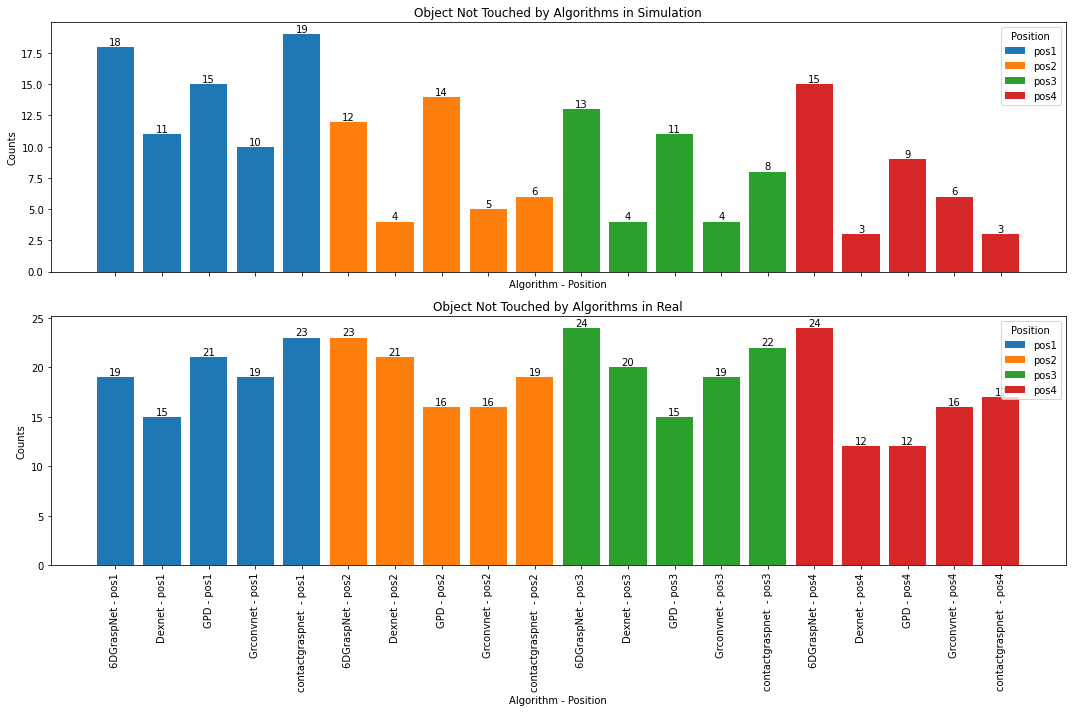

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_final_cleaned is already defined

# Extract relevant columns for simulation and real separately
df_no_touch_sim = df_final_cleaned[df_final_cleaned['Object Contacted but Grasp Failed'].str[0] == '0']
df_no_touch_real = df_final_cleaned[df_final_cleaned['Object Contacted but Grasp Failed'].str[2] == '0']

# Count the occurrences by algorithm and object position for simulation
no_touch_counts_sim = df_no_touch_sim.groupby(['Algorithm', 'Object Position']).size().reset_index(name='Counts')

# Count the occurrences by algorithm and object position for real
no_touch_counts_real = df_no_touch_real.groupby(['Algorithm', 'Object Position']).size().reset_index(name='Counts')

# Create the plot
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plotting simulation data
for position in no_touch_counts_sim['Object Position'].unique():
    position_data = no_touch_counts_sim[no_touch_counts_sim['Object Position'] == position]
    bars = axes[0].bar(position_data['Algorithm'] + ' - ' + position_data['Object Position'], position_data['Counts'], label=position)
    for bar in bars:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

axes[0].set_title('Object Not Touched by Algorithms in Simulation')
axes[0].set_ylabel('Counts')
axes[0].legend(title='Position')
axes[0].set_xlabel('Algorithm - Position')

# Display the data used for plotting simulation
print("Simulation Data:")
print(no_touch_counts_sim)

# Plotting real data
for position in no_touch_counts_real['Object Position'].unique():
    position_data = no_touch_counts_real[no_touch_counts_real['Object Position'] == position]
    bars = axes[1].bar(position_data['Algorithm'] + ' - ' + position_data['Object Position'], position_data['Counts'], label=position)
    for bar in bars:
        yval = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

axes[1].set_title('Object Not Touched by Algorithms in Real')
axes[1].set_ylabel('Counts')
axes[1].legend(title='Position')
axes[1].set_xlabel('Algorithm - Position')

# Display the data used for plotting real
print("\nReal Data:")
print(no_touch_counts_real)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Major Findings

### Simulation Data:

1. **Algorithm Performance:**
    - **6DGraspNet:** Exhibited a relatively high number of instances where the object was not touched, with counts ranging from 12 to 18 across different positions. This indicates a potential issue in the algorithm's ability to successfully make contact with objects in the simulation.
    - **Dexnet:** Had lower counts compared to 6DGraspNet, with instances ranging from 3 to 11. This suggests better performance in making initial contact with objects.
    - **GPD:** Showed moderate performance with counts ranging from 9 to 15. This indicates some variability in the algorithm's ability to make contact depending on the object's position.
    - **Grconvnet:** Had a lower number of instances where objects were not touched, with counts ranging from 4 to 10. This suggests a higher consistency in contacting objects.
    - **contactgraspnet:** Exhibited high counts, particularly for pos1 (19 instances), indicating significant issues in making contact with objects in the simulation.

2. **Position Performance:**
    - **pos1:** Generally had higher counts of objects not being touched across most algorithms, indicating this position may present more challenges in the simulation environment.
    - **pos2 and pos3:** Showed moderate counts, indicating varying levels of difficulty for different algorithms.
    - **pos4:** Had mixed results, with some algorithms performing better (e.g., Dexnet) and others worse (e.g., 6DGraspNet).

### Real Data:

1. **Algorithm Performance:**
    - **6DGraspNet:** Showed improvement in real scenarios with higher counts of successful touches, although counts still ranged from 19 to 24.
    - **Dexnet:** Performed well with counts ranging from 12 to 21, indicating better reliability in real-world scenarios.
    - **GPD:** Exhibited moderate performance with counts ranging from 12 to 21, similar to its performance in the simulation.
    - **Grconvnet:** Maintained a consistent performance with counts ranging from 16 to 19, suggesting good reliability.
    - **contactgraspnet:** Continued to show high counts, particularly for pos1 (23 instances), indicating persistent issues in making contact even in real-world scenarios.

2. **Position Performance:**
    - **pos1:** Remained a challenging position for most algorithms, with higher counts of objects not being touched.
    - **pos2 and pos3:** Showed variability in performance, similar to the simulation results.
    - **pos4:** Had mixed results, indicating some algorithms struggled more with this position than others.

### Overall Insights:

- **Algorithm Reliability:** Grconvnet and Dexnet exhibited more consistent performance across both simulation and real scenarios, indicating higher reliability in making initial contact with objects.
- **Challenging Positions:** pos1 appears to be the most challenging position for most algorithms, suggesting that specific characteristics of this position may need to be addressed to improve contact success rates.
- **Simulation vs. Real:** Some algorithms like 6DGraspNet showed improvement in real scenarios compared to simulation, highlighting the importance of real-world testing to fully understand algorithm performance.

### Recommendations:

1. **Focus on Challenging Positions:** Further investigation into why pos1 presents more challenges and how algorithms can be optimized for this position.
2. **Algorithm Improvement:** Enhance algorithms like contactgraspnet and 6DGraspNet to improve their initial contact success rates.
3. **Real-World Testing:** Continue extensive real-world testing to validate and refine algorithm performance, as some algorithms show significant differences between simulation and real scenarios.

These findings provide valuable insights into the performance and reliability of different algorithms in both simulated and real environments, guiding future improvements and optimizations.


# Analyzing Grasp Success Rates for Each Object


## Grasp Success Rates by Object

In this section, we calculate and visualize the grasp success rates for each object in both simulation and real robot scenarios. This analysis helps us understand how well different objects are handled by the algorithms.

### Calculating Success Rates
First, we extract the grasp success rates from the `Grasp Success/Fail` column for both simulation and real scenarios. We then aggregate the success rates by object name.

### Creating a Colormap
We create a colormap to differentiate the bars in the plots, providing a visually appealing and clear representation of the data.

### Plotting the Success Rates
We then create bar plots to visualize the grasp success rates for each object in both simulation and real scenarios.

### Python Code:

Grasp Success Rates:
                 Object Name  Success Rate Sim (%)  Success Rate Real (%)
0            003_cracker_box                  15.0                   30.0
1              004_sugar_box                   0.0                   60.0
2        005_tomato_soup_can                   5.0                   30.0
3         006_mustard_bottle                   0.0                   45.0
4            008_pudding_box                   0.0                   20.0
5            009_gelatin_box                   0.0                   45.0
6        010_potted_meat_can                  25.0                   35.0
7                 011_banana                   0.0                   45.0
8             012_strawberry                  10.0                   25.0
9                  013_apple                   0.0                   55.0
10                 014_lemon                   0.0                   35.0
11                 015_peach                  10.0                   40.0
12               

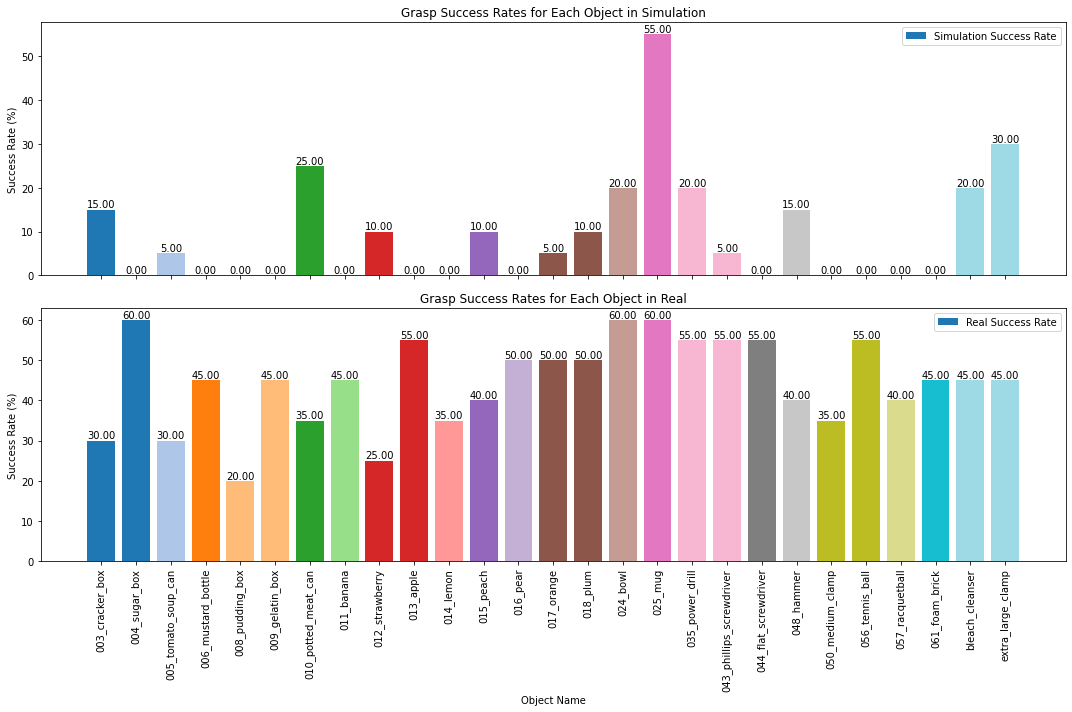

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the grasp success rate for each object
df_final_cleaned['Grasp Success Sim'] = df_final_cleaned['Grasp Success/Fail'].str[0].astype(int)
df_final_cleaned['Grasp Success Real'] = df_final_cleaned['Grasp Success/Fail'].str[2].astype(int)

# Aggregate by object name
success_rate_sim = df_final_cleaned.groupby('Object Name')['Grasp Success Sim'].mean() * 100
success_rate_real = df_final_cleaned.groupby('Object Name')['Grasp Success Real'].mean() * 100

# Create DataFrame for visualization
df_success_rate = pd.DataFrame({
    'Object Name': success_rate_sim.index,
    'Success Rate Sim (%)': success_rate_sim.values,
    'Success Rate Real (%)': success_rate_real.values
})

# Display the DataFrame
print("Grasp Success Rates:")
print(df_success_rate)

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_success_rate))]

# Plotting the success rates
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Simulation success rates
bars_sim = axes[0].bar(df_success_rate['Object Name'], df_success_rate['Success Rate Sim (%)'], color=colors, label='Simulation Success Rate')
for bar in bars_sim:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[0].set_title('Grasp Success Rates for Each Object in Simulation')
axes[0].set_ylabel('Success Rate (%)')
axes[0].legend()

# Real success rates
bars_real = axes[1].bar(df_success_rate['Object Name'], df_success_rate['Success Rate Real (%)'], color=colors, label='Real Success Rate')
for bar in bars_real:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[1].set_title('Grasp Success Rates for Each Object in Real')
axes[1].set_ylabel('Success Rate (%)')
axes[1].legend()

plt.xticks(rotation=90)
plt.xlabel('Object Name')
plt.tight_layout()
plt.show()


### Major Findings from Grasp Success Rates Analysis

1. **High Success Rates in Real Scenarios**:
    - Several objects exhibit significantly higher success rates in real scenarios compared to simulations. Notable examples include:
        - `004_sugar_box`: 60.0% in real vs. 0.0% in simulation.
        - `013_apple`: 55.0% in real vs. 0.0% in simulation.
        - `025_mug`: 60.0% in real vs. 55.0% in simulation.

2. **Consistent Performance Across Both Scenarios**:
    - Some objects show relatively consistent success rates across both simulation and real scenarios. Examples include:
        - `010_potted_meat_can`: 25.0% in simulation vs. 35.0% in real.
        - `024_bowl`: 20.0% in simulation vs. 60.0% in real.
        - `035_power_drill`: 20.0% in simulation vs. 55.0% in real.

3. **Objects with Zero Success Rates in Simulation**:
    - There are several objects which have a 0.0% success rate in simulation but perform much better in real scenarios. This discrepancy suggests that simulations might not fully capture the complexities of real-world interactions for these objects:
        - `004_sugar_box`: 60.0% in real.
        - `009_gelatin_box`: 45.0% in real.
        - `013_apple`: 55.0% in real.

4. **Objects with Moderate to Low Success Rates in Both Scenarios**:
    - Some objects show moderate to low success rates in both scenarios, indicating potential challenges with these objects regardless of the environment:
        - `003_cracker_box`: 15.0% in simulation vs. 30.0% in real.
        - `005_tomato_soup_can`: 5.0% in simulation vs. 30.0% in real.
        - `012_strawberry`: 10.0% in simulation vs. 25.0% in real.

5. **High Success Rate in Real but Zero in Simulation**:
    - Certain objects that had a 0.0% success rate in simulation showed a significant success rate in real-world tests:
        - `014_lemon`: 35.0% in real.
        - `044_flat_screwdriver`: 55.0% in real.
        - `056_tennis_ball`: 55.0% in real.

6. **Implications for Simulation Improvements**:
    - The discrepancies between simulation and real success rates suggest areas where simulations could be improved to better match real-world outcomes. Objects like the `sugar box`, `apple`, and `gelatin box` could benefit from more accurate modeling in simulations to reflect real-world performance more closely.

### Conclusion
The analysis reveals significant differences in grasp success rates between simulation and real scenarios for many objects. These findings highlight the need for improvements in simulation accuracy and suggest that certain objects might require more sophisticated modeling to bridge the gap between simulated and real-world performance.


# Analyzing Object Slip Rates for Each Object


## Object Slip Rates During Grasping

In this section, we calculate and visualize the object slip rates during grasping for each object in both simulation and real robot scenarios. This analysis helps us understand how well different objects are handled by the algorithms and identify any issues with object slipping.

### Calculating Slip Rates
First, we extract the slip rates from the `Object Slipped During Grasp` column for both simulation and real scenarios. We then aggregate the slip rates by object name.

### Creating a Colormap
We create a colormap to differentiate the bars in the plots, providing a visually appealing and clear representation of the data.

### Plotting the Slip Rates
We then create bar plots to visualize the object slip rates for each object in both simulation and real scenarios.

### Python Code:


Slip Rates Data:
                 Object Name  Slip Rate Sim (%)  Slip Rate Real (%)
0            003_cracker_box               45.0                10.0
1              004_sugar_box               80.0                 5.0
2        005_tomato_soup_can               35.0                15.0
3         006_mustard_bottle               55.0                10.0
4            008_pudding_box               40.0                35.0
5            009_gelatin_box               40.0                 5.0
6        010_potted_meat_can               20.0                15.0
7                 011_banana               55.0                15.0
8             012_strawberry               45.0                30.0
9                  013_apple               80.0                25.0
10                 014_lemon               60.0                30.0
11                 015_peach               65.0                35.0
12                  016_pear               60.0                15.0
13                017_orange   

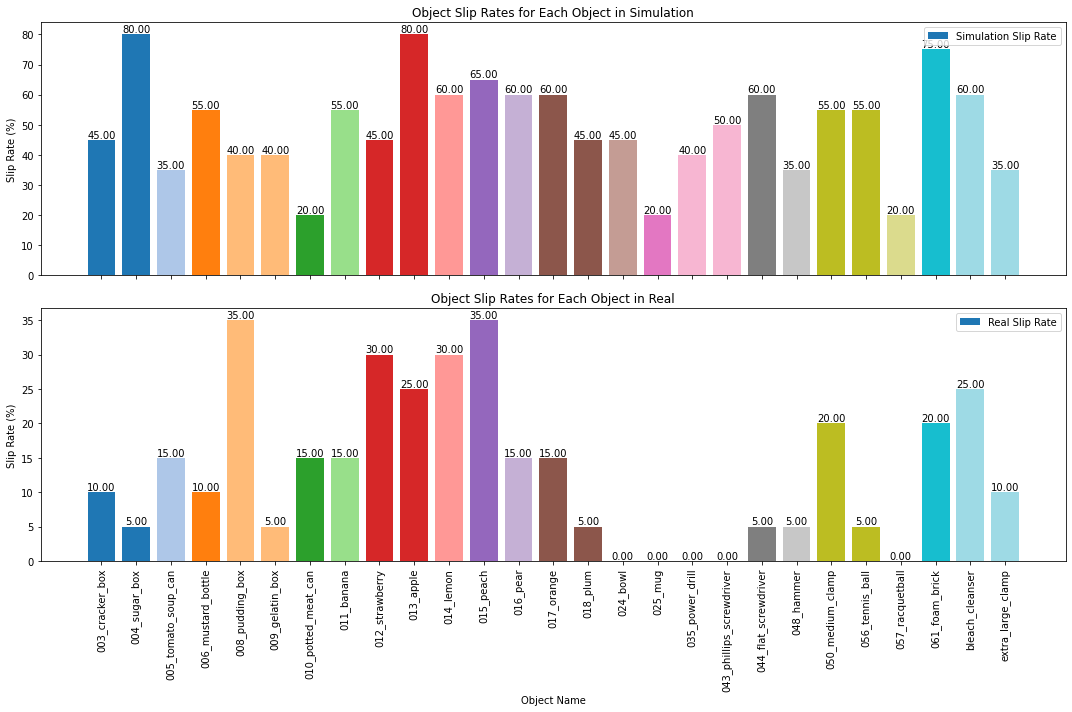

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the object slip rate for each object
df_final_cleaned['Object Slipped Sim'] = df_final_cleaned['Object Slipped During Grasp'].str[0].astype(int)
df_final_cleaned['Object Slipped Real'] = df_final_cleaned['Object Slipped During Grasp'].str[2].astype(int)

# Aggregate by object name
slip_rate_sim = df_final_cleaned.groupby('Object Name')['Object Slipped Sim'].mean() * 100
slip_rate_real = df_final_cleaned.groupby('Object Name')['Object Slipped Real'].mean() * 100

# Create DataFrame for visualization
df_slip_rate = pd.DataFrame({
    'Object Name': slip_rate_sim.index,
    'Slip Rate Sim (%)': slip_rate_sim.values,
    'Slip Rate Real (%)': slip_rate_real.values
})

# Display the DataFrame
print("Slip Rates Data:")
print(df_slip_rate)

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(df_slip_rate))]

# Plotting the slip rates
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Simulation slip rates
bars_sim = axes[0].bar(df_slip_rate['Object Name'], df_slip_rate['Slip Rate Sim (%)'], color=colors, label='Simulation Slip Rate')
for bar in bars_sim:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[0].set_title('Object Slip Rates for Each Object in Simulation')
axes[0].set_ylabel('Slip Rate (%)')
axes[0].legend()

# Real slip rates
bars_real = axes[1].bar(df_slip_rate['Object Name'], df_slip_rate['Slip Rate Real (%)'], color=colors, label='Real Slip Rate')
for bar in bars_real:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[1].set_title('Object Slip Rates for Each Object in Real')
axes[1].set_ylabel('Slip Rate (%)')
axes[1].legend()

plt.xticks(rotation=90)
plt.xlabel('Object Name')
plt.tight_layout()
plt.show()


### Major Findings from Slip Rates Data

#### Simulation Data:
1. **High Slip Rates:**
   - Objects like `004_sugar_box`, `013_apple`, and `061_foam_brick` have particularly high slip rates in the simulation, with `004_sugar_box` and `013_apple` both having a slip rate of 80%, and `061_foam_brick` at 75%. These objects appear to be challenging for the grasping algorithms in simulation, possibly due to their shape, size, or surface characteristics.
   
2. **Moderate Slip Rates:**
   - Objects such as `003_cracker_box`, `005_tomato_soup_can`, `006_mustard_bottle`, `008_pudding_box`, and `012_strawberry` exhibit moderate slip rates, ranging between 35% and 55%. These objects also present some difficulties, but not as severe as the high-slip objects.

3. **Low Slip Rates:**
   - Objects like `010_potted_meat_can`, `025_mug`, `035_power_drill`, `043_phillips_screwdriver`, and `057_racquetball` show relatively low slip rates, indicating better performance of grasping algorithms on these items.

#### Real Data:
1. **Improvement in Real-World Performance:**
   - Many objects show a significant reduction in slip rates when moved from simulation to real-world scenarios. For instance, `004_sugar_box` drops from 80% in simulation to just 5% in real life, and `013_apple` from 80% to 25%. This indicates that while simulation provides a challenging environment, the actual performance of the grasping algorithms improves significantly in real-world tests.
   
2. **Consistently Low Slip Rates:**
   - Objects such as `024_bowl`, `025_mug`, `035_power_drill`, `043_phillips_screwdriver`, and `057_racquetball` maintain low slip rates in both simulation and real-world scenarios. This consistency suggests that these objects are generally easier for the algorithms to handle.

3. **Persisting Challenges:**
   - Some objects continue to exhibit slip challenges even in real scenarios, such as `008_pudding_box`, `012_strawberry`, and `015_peach`. These objects still have slip rates of 30% or higher, indicating that their inherent properties might be problematic for the current grasping methods.

#### Overall Insights:
- **Algorithm Performance:**
  - The data suggests that the performance of grasping algorithms can vary significantly between simulation and real-world tests. This discrepancy highlights the importance of real-world testing in validating the effectiveness of robotic grasping algorithms.

- **Object-Specific Challenges:**
  - Certain objects consistently challenge the grasping algorithms due to their physical characteristics. Understanding these challenges can guide the development of more sophisticated and adaptable grasping techniques.

- **Validation of Simulation Environments:**
  - The reduction in slip rates from simulation to real scenarios underscores the need to continually refine simulation environments to better mimic real-world conditions, thereby providing more accurate assessments during the development phase.

These findings help in understanding the areas where grasping algorithms excel and where they need improvement, ultimately guiding the development of more robust robotic systems.


# Analyzing Arm Impact Occurrences by Object Position

## Analysis of Arm Impacts by Object Position

In this section, we analyze the occurrences of various arm impacts for different object positions in both simulation and real robot scenarios. This analysis helps identify which object positions and types of impacts are most frequent, providing insights for improving algorithm performance and safety.

### Counting Arm Impact Occurrences
We consider several columns representing different types of arm impacts and count their occurrences for each object position in both simulation and real scenarios.

### Creating a Colormap
We create a colormap to differentiate the bars in the plots, providing a visually appealing and clear representation of the data.

### Plotting the Arm Impact Occurrences
We then create stacked bar plots to visualize the occurrences of various arm impacts for each object position in both simulation and real scenarios.

### Python Code:


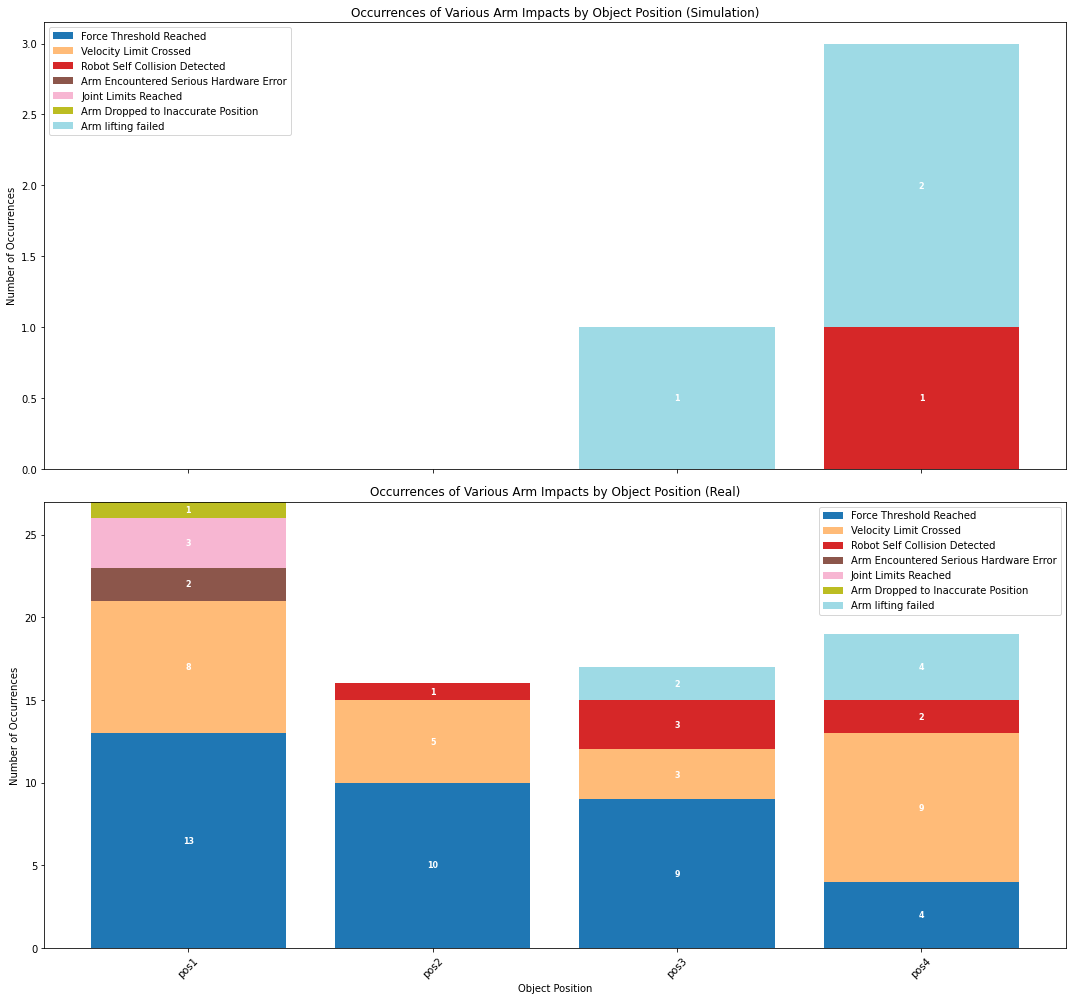

Simulation Data Impact Counts:
      Force Threshold Reached  Velocity Limit Crossed  \
pos1                        0                       0   
pos2                        0                       0   
pos3                        0                       0   
pos4                        0                       0   

      Robot Self Collision Detected  Arm Encountered Serious Hardware Error  \
pos1                              0                                       0   
pos2                              0                                       0   
pos3                              0                                       0   
pos4                              1                                       0   

      Joint Limits Reached  Arm Dropped to Inaccurate Position  \
pos1                     0                                   0   
pos2                     0                                   0   
pos3                     0                                   0   
pos4                   

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Columns to consider for arm impacts
impact_columns = [
    'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected',
    'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', 'Arm Dropped to Inaccurate Position',
    'Arm lifting failed'
]

# Count occurrences of each arm impact type for each position
impact_counts_sim = pd.DataFrame(0, index=df_final_cleaned['Object Position'].unique(), columns=impact_columns)
impact_counts_real = pd.DataFrame(0, index=df_final_cleaned['Object Position'].unique(), columns=impact_columns)

# Fill the DataFrame with counts for simulation and real scenarios
for impact in impact_columns:
    for pos in df_final_cleaned['Object Position'].unique():
        impact_counts_sim.at[pos, impact] = df_final_cleaned[(df_final_cleaned['Object Position'] == pos) & (df_final_cleaned[impact].str[0] == '1')].shape[0]
        impact_counts_real.at[pos, impact] = df_final_cleaned[(df_final_cleaned['Object Position'] == pos) & (df_final_cleaned[impact].str[2] == '1')].shape[0]

# Create a colormap
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, len(impact_columns))]

# Plotting the arm impact occurrences for simulation
fig, axes = plt.subplots(2, 1, figsize=(15, 14), sharex=True)

bottom_sim = np.zeros(len(impact_counts_sim))
bottom_real = np.zeros(len(impact_counts_real))

for i, impact in enumerate(impact_columns):
    bars_sim = axes[0].bar(impact_counts_sim.index, impact_counts_sim[impact], bottom=bottom_sim, color=colors[i], label=impact)
    bars_real = axes[1].bar(impact_counts_real.index, impact_counts_real[impact], bottom=bottom_real, color=colors[i], label=impact)
    
    for bar in bars_sim:
        yval = bar.get_height()
        if yval > 0:
            axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + yval / 2, f'{int(yval)}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    bottom_sim += impact_counts_sim[impact].values
    
    for bar in bars_real:
        yval = bar.get_height()
        if yval > 0:
            axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + yval / 2, f'{int(yval)}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')
    bottom_real += impact_counts_real[impact].values

axes[0].set_title('Occurrences of Various Arm Impacts by Object Position (Simulation)')
axes[0].set_ylabel('Number of Occurrences')
axes[0].legend()

axes[1].set_title('Occurrences of Various Arm Impacts by Object Position (Real)')
axes[1].set_ylabel('Number of Occurrences')
axes[1].legend()

plt.xlabel('Object Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the values used in the plot
print("Simulation Data Impact Counts:")
print(impact_counts_sim)
print("\nReal Data Impact Counts:")
print(impact_counts_real)


# Analysis of Specific Failures by Algorithm


## Analysis of Specific Failures by Algorithm

In this analysis, we aim to identify the frequency of specific types of failures for each algorithm in both simulation and real scenarios. This will help us understand which algorithms are more prone to certain types of failures.

### Specific Failures Considered:
- Force Threshold Reached
- Velocity Limit Crossed
- Robot Self Collision Detected
- Arm Encountered Serious Hardware Error
- Joint Limits Reached
- Arm Dropped to Inaccurate Position
- Arm Lifting Failed

### Steps Performed:

#### Data Preparation:
- We split the values of the failure columns into separate columns for simulation and real scenarios.
- Converted these columns to integer types for easier analysis.

#### Counting Failures:
- We counted the occurrences of each failure type for each algorithm in both simulation and real scenarios.

#### Visualization:
- Created stacked bar charts to visualize the frequency of each type of failure for each algorithm.
- Annotated the bars with the corresponding failure counts for better readability.

### Results:

#### Simulation Scenario:
The first chart shows the frequency of specific failures for each algorithm during the simulation. This helps in identifying which algorithms encounter more issues during the simulation phase.

#### Real Scenario:
The second chart displays the frequency of specific failures for each algorithm in real scenarios. This comparison with the simulation results can highlight any discrepancies or additional challenges faced in real-world applications.

### Insights:
- By comparing the two charts, we can gain insights into the reliability of each algorithm in both simulated and real environments.
- Identifying failure-prone algorithms and the types of failures they frequently encounter can guide improvements and optimizations.

### Python Code:



Simulation Data Failure Counts:
                  Force Threshold Reached  Velocity Limit Crossed  \
Dexnet                                  0                       0   
6DGraspNet                              0                       0   
GPD                                     0                       0   
contactgraspnet                         0                       0   
Grconvnet                               0                       0   

                  Robot Self Collision Detected  \
Dexnet                                        0   
6DGraspNet                                    1   
GPD                                           0   
contactgraspnet                               0   
Grconvnet                                     0   

                  Arm Encountered Serious Hardware Error  \
Dexnet                                                 0   
6DGraspNet                                             0   
GPD                                                    0   
contac

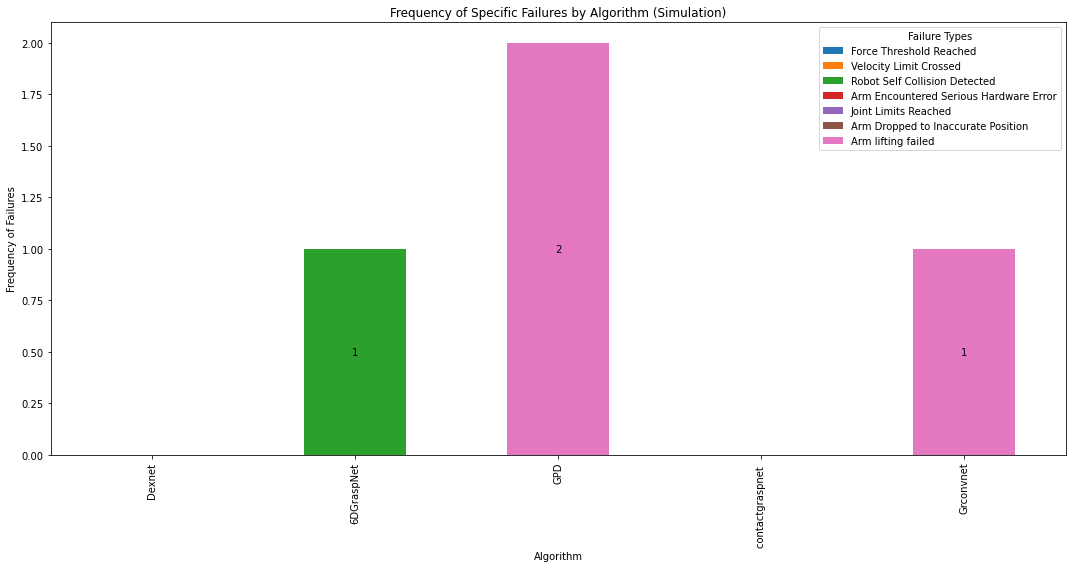

Real Data Failure Counts:
                  Force Threshold Reached  Velocity Limit Crossed  \
Dexnet                                  3                       3   
6DGraspNet                              3                       4   
GPD                                    12                      10   
contactgraspnet                         4                       3   
Grconvnet                              14                       5   

                  Robot Self Collision Detected  \
Dexnet                                        0   
6DGraspNet                                    1   
GPD                                           1   
contactgraspnet                               4   
Grconvnet                                     0   

                  Arm Encountered Serious Hardware Error  \
Dexnet                                                 1   
6DGraspNet                                             0   
GPD                                                    1   
contactgrasp

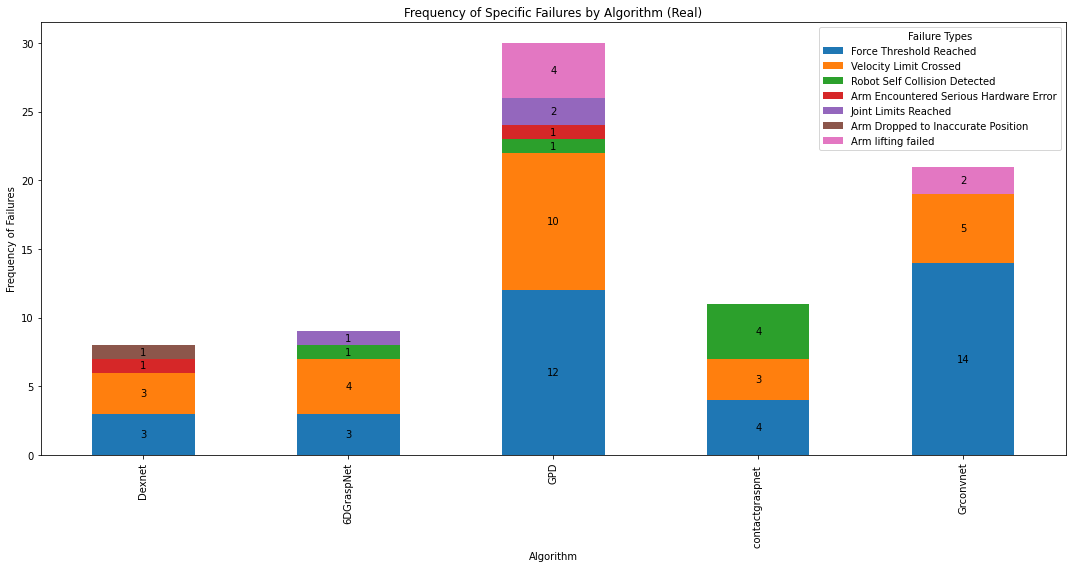

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Failure columns
failure_columns = [
    'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected',
    'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', 'Arm Dropped to Inaccurate Position',
    'Arm lifting failed'
]

# Convert failure columns to separate simulation and real columns
for col in failure_columns:
    df_final_cleaned[[f'{col} Sim', f'{col} Real']] = df_final_cleaned[col].str.split('/', expand=True)
    df_final_cleaned[f'{col} Sim'] = df_final_cleaned[f'{col} Sim'].astype(int)
    df_final_cleaned[f'{col} Real'] = df_final_cleaned[f'{col} Real'].astype(int)

# Initialize a dictionary to hold the results
failure_counts = {algorithm: {col: 0 for col in failure_columns} for algorithm in df_final_cleaned['Algorithm'].unique()}

# Count failures for each algorithm
for algorithm in df_final_cleaned['Algorithm'].unique():
    for col in failure_columns:
        failure_counts[algorithm][col] = df_final_cleaned[df_final_cleaned['Algorithm'] == algorithm][f'{col} Sim'].sum()

# Convert the results to a DataFrame
failure_counts_df = pd.DataFrame(failure_counts).transpose()

# Display the failure counts used for simulation
print("Simulation Data Failure Counts:")
print(failure_counts_df)

# Plotting the results for simulation
fig, ax = plt.subplots(figsize=(15, 8))
bars = failure_counts_df.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with its value
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center')

plt.title('Frequency of Specific Failures by Algorithm (Simulation)')
plt.xlabel('Algorithm')
plt.ylabel('Frequency of Failures')
plt.legend(title='Failure Types')
plt.tight_layout()
plt.show()

# Repeat the process for real scenario
failure_counts_real = {algorithm: {col: 0 for col in failure_columns} for algorithm in df_final_cleaned['Algorithm'].unique()}

# Count failures for each algorithm
for algorithm in df_final_cleaned['Algorithm'].unique():
    for col in failure_columns:
        failure_counts_real[algorithm][col] = df_final_cleaned[df_final_cleaned['Algorithm'] == algorithm][f'{col} Real'].sum()

# Convert the results to a DataFrame
failure_counts_real_df = pd.DataFrame(failure_counts_real).transpose()

# Display the failure counts used for real scenario
print("Real Data Failure Counts:")
print(failure_counts_real_df)

# Plotting the results for real scenario
fig, ax = plt.subplots(figsize=(15, 8))
bars = failure_counts_real_df.plot(kind='bar', stacked=True, ax=ax)

# Annotate each bar with its value
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center')

plt.title('Frequency of Specific Failures by Algorithm (Real)')
plt.xlabel('Algorithm')
plt.ylabel('Frequency of Failures')
plt.legend(title='Failure Types')
plt.tight_layout()
plt.show()


## Major Findings from Failure Counts Data

### Simulation Data Failure Counts:

- **Force Threshold Reached:** None of the algorithms experienced a force threshold being reached during simulation.
- **Velocity Limit Crossed:** No algorithms crossed the velocity limit in the simulation.
- **Robot Self Collision Detected:** Only `6DGraspNet` encountered a self-collision event, with 1 occurrence.
- **Arm Encountered Serious Hardware Error:** There were no serious hardware errors encountered by any algorithm in the simulation.
- **Joint Limits Reached:** No joint limits were reached during the simulation for any algorithm.
- **Arm Dropped to Inaccurate Position:** None of the algorithms had the arm drop to an inaccurate position during the simulation.
- **Arm Lifting Failed:** The algorithm `GPD` encountered arm lifting failures twice, and `Grconvnet` encountered it once.

### Real Data Failure Counts:

- **Force Threshold Reached:** 
  - `Dexnet` and `6DGraspNet` each encountered this failure 3 times.
  - `GPD` had 12 occurrences, the highest among all algorithms.
  - `contactgraspnet` had 4 occurrences.
  - `Grconvnet` encountered this failure 14 times, the highest for real data.
- **Velocity Limit Crossed:** 
  - `Dexnet` and `contactgraspnet` had 3 occurrences each.
  - `6DGraspNet` had 4 occurrences.
  - `GPD` had 10 occurrences.
  - `Grconvnet` had 5 occurrences.
- **Robot Self Collision Detected:** 
  - `Dexnet` and `Grconvnet` had no occurrences.
  - `6DGraspNet`, `GPD`, and `contactgraspnet` had 1, 1, and 4 occurrences, respectively.
- **Arm Encountered Serious Hardware Error:** 
  - `Dexnet` and `GPD` had 1 occurrence each.
  - `6DGraspNet`, `Grconvnet`, and `contactgraspnet` did not encounter this error.
- **Joint Limits Reached:** 
  - Only `6DGraspNet` and `GPD` had 1 and 2 occurrences, respectively.
- **Arm Dropped to Inaccurate Position:** 
  - `Dexnet` had 1 occurrence.
  - No other algorithms encountered this issue.
- **Arm Lifting Failed:** 
  - `GPD` had the highest number of failures, with 4 occurrences.
  - `Grconvnet` had 2 occurrences.
  - No occurrences for other algorithms.

### Key Insights:

1. **Simulation vs. Real Data:** The real scenario had significantly more failures compared to the simulation, indicating a possible discrepancy between the simulation environment and real-world conditions.
2. **Algorithm Performance:**
   - `GPD` and `Grconvnet` seem to encounter more failures in real scenarios, especially related to force thresholds and arm lifting failures.
   - `6DGraspNet` and `Dexnet` had fewer occurrences of failures in real scenarios, suggesting better robustness or adaptation to real-world conditions.
3. **Failure Types:**
   - **Force Threshold Reached** and **Velocity Limit Crossed** are the most common failures in real scenarios, indicating that tuning the force and velocity parameters could significantly improve performance.
   - Failures such as **Arm Encountered Serious Hardware Error** and **Robot Self Collision Detected** are less common but critical when they occur, requiring careful monitoring and prevention mechanisms.

These findings provide insights into the robustness and performance of different algorithms under various conditions, highlighting areas for improvement and further research.


## Time-Based Analysis

In this section, we analyze the grasp times in both simulation and real scenarios. The goal is to identify any algorithms or objects that consistently result in longer grasp times, which could indicate difficulty or inefficiency.

### Conversion of Time to Seconds

We convert the grasp times from the 'mm:ss' format to seconds to facilitate easier calculations and comparisons.

### Average Grasp Time by Algorithm

We calculate the average grasp time for each algorithm in both simulation and real scenarios. This helps us identify which algorithms are generally faster or slower in performing the grasps.

### Average Grasp Time by Object

Similarly, we calculate the average grasp time for each object in both simulation and real scenarios. This analysis helps us understand which objects are more challenging to grasp efficiently.

### Results

The results are visualized in bar charts. Each bar represents the average grasp time for an algorithm or object, with the exact value annotated on top of the bar. Different colors are used for each bar to distinguish between them.

- **Figure 1**: Average Grasp Time by Algorithm (Simulation and Real)
- **Figure 2**: Average Grasp Time by Object (Simulation and Real)


C:\Users\josea\AppData\Local\Temp/ipykernel_4288/3666558570.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(avg_grasp_time_sim.index, rotation=45)
C:\Users\josea\AppData\Local\Temp/ipykernel_4288/3666558570.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(avg_grasp_time_real.index, rotation=45)


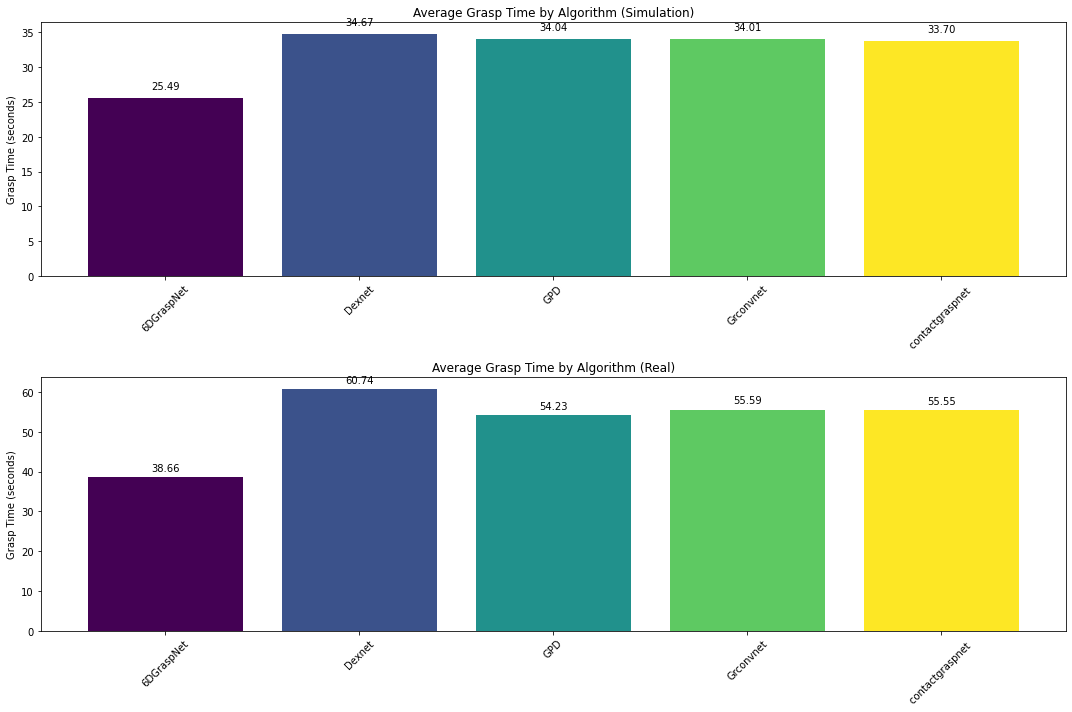

Average Grasp Time by Algorithm (Simulation):
Algorithm
6DGraspNet          25.485714
Dexnet              34.666667
GPD                 34.038095
Grconvnet           34.009524
contactgraspnet     33.704762
Name: Grasp Time Sim Sec, dtype: float64

Average Grasp Time by Algorithm (Real):
Algorithm
6DGraspNet          38.657143
Dexnet              60.742857
GPD                 54.228571
Grconvnet           55.590476
contactgraspnet     55.552381
Name: Grasp Time Real Sec, dtype: float64


C:\Users\josea\AppData\Local\Temp/ipykernel_4288/3666558570.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(avg_grasp_time_object_sim.index, rotation=90)
C:\Users\josea\AppData\Local\Temp/ipykernel_4288/3666558570.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(avg_grasp_time_object_real.index, rotation=90)


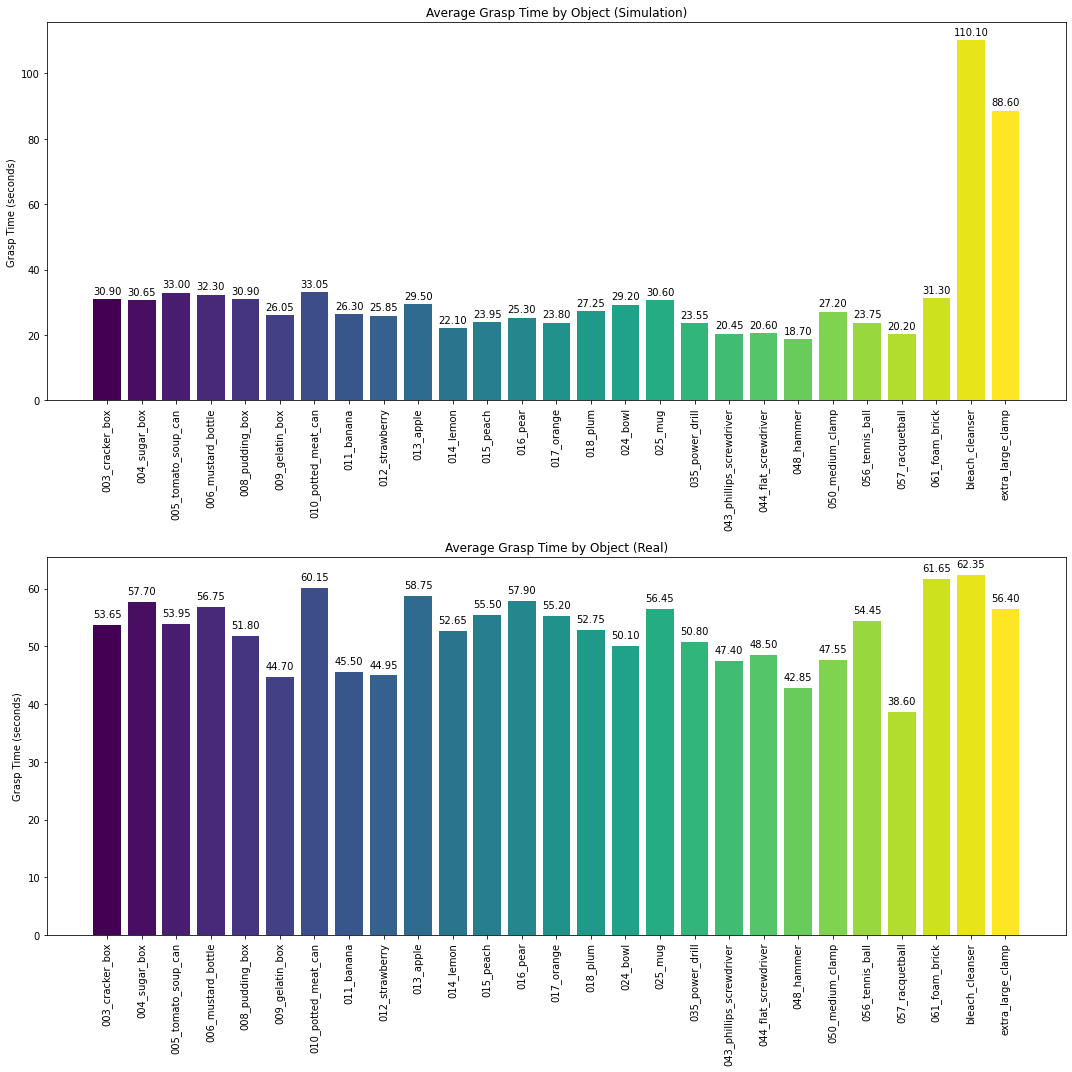


Average Grasp Time by Object (Simulation):
Object Name
003_cracker_box              30.90
004_sugar_box                30.65
005_tomato_soup_can          33.00
006_mustard_bottle           32.30
008_pudding_box              30.90
009_gelatin_box              26.05
010_potted_meat_can          33.05
011_banana                   26.30
012_strawberry               25.85
013_apple                    29.50
014_lemon                    22.10
015_peach                    23.95
016_pear                     25.30
017_orange                   23.80
018_plum                     27.25
024_bowl                     29.20
025_mug                      30.60
035_power_drill              23.55
043_phillips_screwdriver     20.45
044_flat_screwdriver         20.60
048_hammer                   18.70
050_medium_clamp             27.20
056_tennis_ball              23.75
057_racquetball              20.20
061_foam_brick               31.30
bleach_cleanser             110.10
extra_large_clamp            88.60

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to convert time from 'mm:ss' format to seconds
def convert_time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return 0

# Ensure the columns are strings and handle missing or malformed entries
df_final_cleaned['Grasp Time Sim'] = df_final_cleaned['Grasp Time Sim'].astype(str)
df_final_cleaned['Grasp Time Real'] = df_final_cleaned['Grasp Time Real'].astype(str)

# Function to safely split and convert time
def safe_split_time(column, part):
    def split_and_convert(time_str):
        try:
            return convert_time_to_seconds(time_str.split('/')[part])
        except (IndexError, ValueError):
            return 0
    return df_final_cleaned[column].apply(split_and_convert)

# Split the time columns and convert them to seconds
df_final_cleaned['Grasp Time Sim Sec'] = safe_split_time('Grasp Time Sim', 0)
df_final_cleaned['Grasp Time Real Sec'] = safe_split_time('Grasp Time Real', 1)

# Calculate the average grasp time for each algorithm in simulation and real scenarios
avg_grasp_time_sim = df_final_cleaned.groupby('Algorithm')['Grasp Time Sim Sec'].mean()
avg_grasp_time_real = df_final_cleaned.groupby('Algorithm')['Grasp Time Real Sec'].mean()

# Calculate the average grasp time for each object in simulation and real scenarios
avg_grasp_time_object_sim = df_final_cleaned.groupby('Object Name')['Grasp Time Sim Sec'].mean()
avg_grasp_time_object_real = df_final_cleaned.groupby('Object Name')['Grasp Time Real Sec'].mean()

# Generate colors for each bar
def get_colors(n):
    return plt.cm.viridis(np.linspace(0, 1, n))

# Plotting the average grasp time for each algorithm
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

colors_sim = get_colors(len(avg_grasp_time_sim))
colors_real = get_colors(len(avg_grasp_time_real))

# Simulation grasp time
ax[0].bar(avg_grasp_time_sim.index, avg_grasp_time_sim.values, color=colors_sim)
for i, v in enumerate(avg_grasp_time_sim.values):
    ax[0].text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')
ax[0].set_title('Average Grasp Time by Algorithm (Simulation)')
ax[0].set_ylabel('Grasp Time (seconds)')
ax[0].set_xticklabels(avg_grasp_time_sim.index, rotation=45)

# Real grasp time
ax[1].bar(avg_grasp_time_real.index, avg_grasp_time_real.values, color=colors_real)
for i, v in enumerate(avg_grasp_time_real.values):
    ax[1].text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')
ax[1].set_title('Average Grasp Time by Algorithm (Real)')
ax[1].set_ylabel('Grasp Time (seconds)')
ax[1].set_xticklabels(avg_grasp_time_real.index, rotation=45)

plt.tight_layout()
plt.show()

# Display the values used in the bar diagram for algorithms
print("Average Grasp Time by Algorithm (Simulation):")
print(avg_grasp_time_sim)
print("\nAverage Grasp Time by Algorithm (Real):")
print(avg_grasp_time_real)

# Plotting the average grasp time for each object
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

colors_object_sim = get_colors(len(avg_grasp_time_object_sim))
colors_object_real = get_colors(len(avg_grasp_time_object_real))

# Simulation grasp time
ax[0].bar(avg_grasp_time_object_sim.index, avg_grasp_time_object_sim.values, color=colors_object_sim)
for i, v in enumerate(avg_grasp_time_object_sim.values):
    ax[0].text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')
ax[0].set_title('Average Grasp Time by Object (Simulation)')
ax[0].set_ylabel('Grasp Time (seconds)')
ax[0].set_xticklabels(avg_grasp_time_object_sim.index, rotation=90)

# Real grasp time
ax[1].bar(avg_grasp_time_object_real.index, avg_grasp_time_object_real.values, color=colors_object_real)
for i, v in enumerate(avg_grasp_time_object_real.values):
    ax[1].text(i, v + 1, f'{v:.2f}', ha='center', va='bottom')
ax[1].set_title('Average Grasp Time by Object (Real)')
ax[1].set_ylabel('Grasp Time (seconds)')
ax[1].set_xticklabels(avg_grasp_time_object_real.index, rotation=90)

plt.tight_layout()
plt.show()

# Display the values used in the bar diagram for objects
print("\nAverage Grasp Time by Object (Simulation):")
print(avg_grasp_time_object_sim)
print("\nAverage Grasp Time by Object (Real):")
print(avg_grasp_time_object_real)


## Major Findings from the Average Grasp Time Analysis

### Average Grasp Time by Algorithm (Simulation)
1. **6DGraspNet:** Exhibits the shortest average grasp time of 25.49 seconds in the simulation.
2. **Dexnet:** Has an average grasp time of 34.67 seconds.
3. **GPD:** Shows an average grasp time of 34.04 seconds.
4. **Grconvnet:** Records an average grasp time of 34.01 seconds.
5. **contactgraspnet:** Exhibits a slightly shorter average grasp time of 33.70 seconds.

### Average Grasp Time by Algorithm (Real)
1. **6DGraspNet:** Maintains a relatively lower average grasp time of 38.66 seconds.
2. **Dexnet:** Displays the highest average grasp time of 60.74 seconds.
3. **GPD:** Records an average grasp time of 54.23 seconds.
4. **Grconvnet:** Shows an average grasp time of 55.59 seconds.
5. **contactgraspnet:** Has an average grasp time of 55.55 seconds.

### Key Insights from Algorithm Comparison
- **6DGraspNet** consistently shows the shortest grasp time in both simulation and real scenarios.
- **Dexnet** and **contactgraspnet** have the longest average grasp times in real scenarios.
- The overall trend indicates longer grasp times in real scenarios compared to simulations across all algorithms.

### Average Grasp Time by Object (Simulation)
1. **Longest Grasp Time:**
   - **bleach_cleanser:** 110.10 seconds.
   - **extra_large_clamp:** 88.60 seconds.
2. **Shortest Grasp Time:**
   - **048_hammer:** 18.70 seconds.
   - **057_racquetball:** 20.20 seconds.
   - **043_phillips_screwdriver:** 20.45 seconds.

### Average Grasp Time by Object (Real)
1. **Longest Grasp Time:**
   - **bleach_cleanser:** 62.35 seconds.
   - **061_foam_brick:** 61.65 seconds.
   - **010_potted_meat_can:** 60.15 seconds.
2. **Shortest Grasp Time:**
   - **057_racquetball:** 38.60 seconds.
   - **048_hammer:** 42.85 seconds.
   - **043_phillips_screwdriver:** 47.40 seconds.

### Key Insights from Object Comparison
- **bleach_cleanser** and **extra_large_clamp** consistently require the longest grasp times in both simulation and real scenarios, indicating potential challenges with these objects.
- **048_hammer** and **057_racquetball** have the shortest grasp times, suggesting they are easier to grasp.
- Similar to the algorithm analysis, real scenarios generally exhibit longer grasp times compared to simulations.

### Conclusion
The findings suggest that both the algorithm and object type significantly impact grasp time, with consistent trends observed across simulation and real scenarios. Improvements in algorithms should consider the specific challenges posed by certain objects to enhance grasp efficiency and effectiveness.


## Combined Test Success Rate by Algorithm and Object

In this section, we analyze the combined success rate for each algorithm by object. The combined success rate is defined as the rate at which an algorithm successfully completes all three tests (lift, rotational, and shaking) for each object.

### Methodology

1. **Combined Success Calculation**:
   - We define a combined success as a scenario where all three tests (lift, rotational, and shaking) are passed.
   - We create new columns `Combined Success Sim` and `Combined Success Real` to represent the combined success in simulation and real scenarios, respectively.

2. **Success Rate Calculation**:
   - We calculate the combined success rate for each algorithm and object combination in both simulation and real scenarios.

### Results

The results are visualized in stacked bar charts. Each bar represents the combined success rate for an algorithm, broken down by object. The exact success rates are annotated on top of each bar.

- **Figure 1**: Combined Success Rate by Algorithm and Object (Simulation)
- **Figure 2**: Combined Success Rate by Algorithm and Object (Real)


Combined Success Rate (Simulation):
Object Name       003_cracker_box  004_sugar_box  005_tomato_soup_can  \
Algorithm                                                               
6DGraspNet                    0.0            0.0                  0.0   
Dexnet                        0.0            0.0                  0.0   
GPD                           0.0            0.0                  0.0   
Grconvnet                     0.0            0.0                  0.0   
contactgraspnet               0.0            0.0                  0.0   

Object Name       006_mustard_bottle  008_pudding_box  009_gelatin_box  \
Algorithm                                                                
6DGraspNet                       0.0              0.0              0.0   
Dexnet                           0.0              0.0              0.0   
GPD                              0.0              0.0              0.0   
Grconvnet                        0.0              0.0              0.0   
contactg

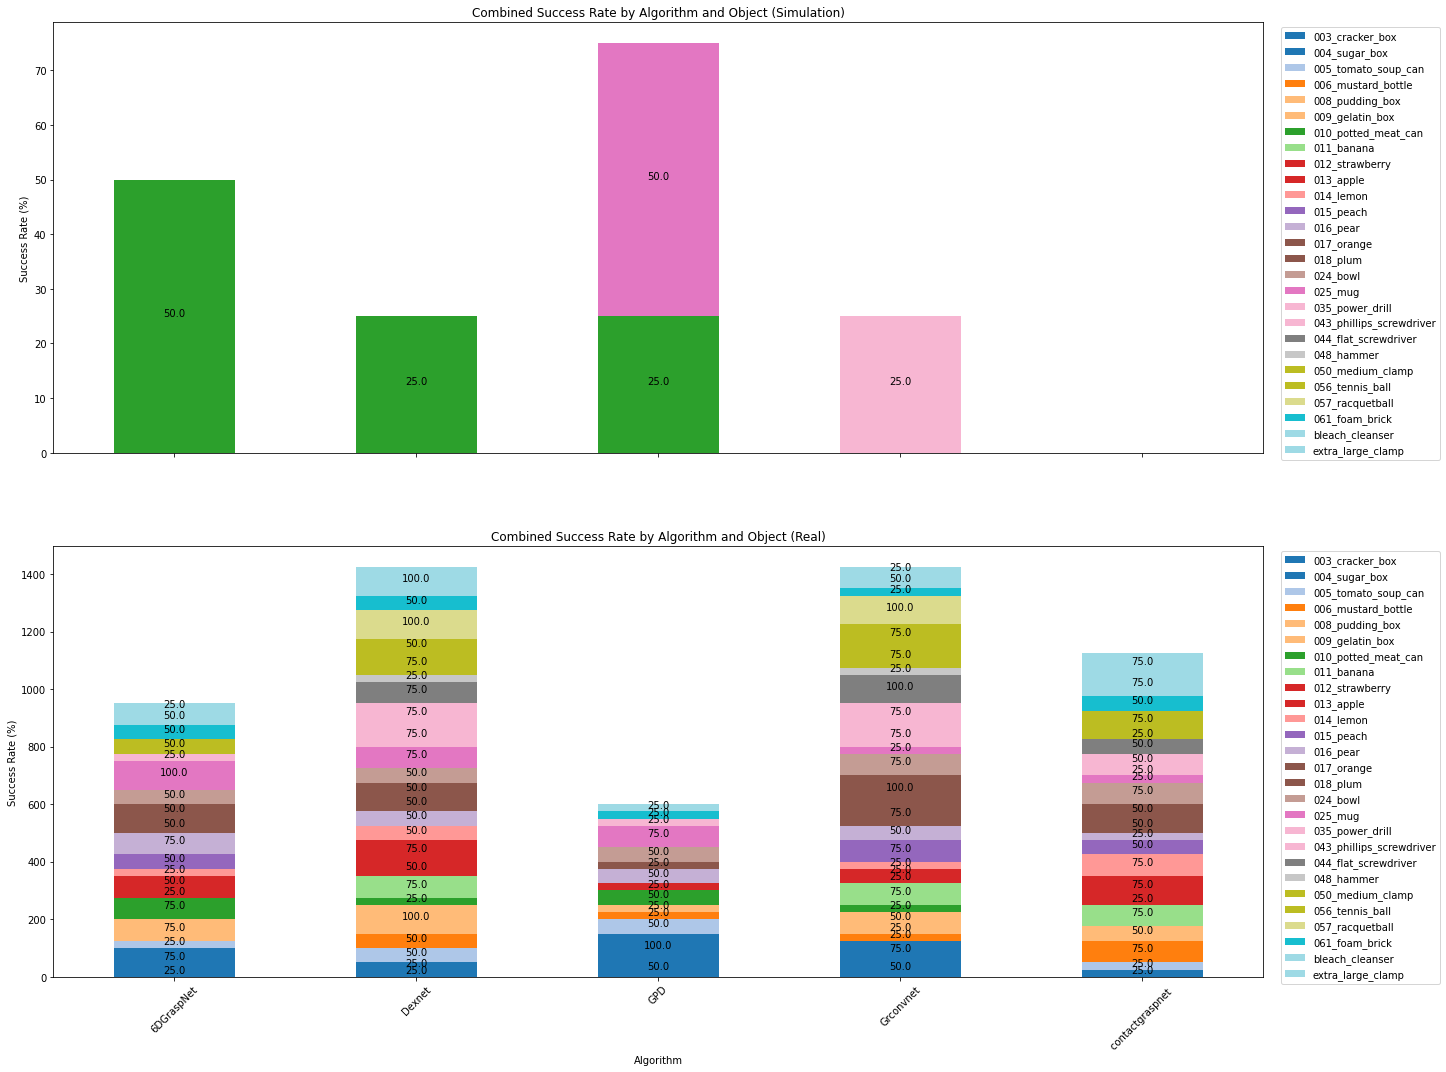

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to calculate combined success
def combined_success(row):
    return int(row['Object Lift Success/Fail'][0] == '1' and 
               row['Object Rotational Test'][0] == '1' and 
               row['Object Shaking Test'][0] == '1')

# Add a new column for combined success in simulation
df_final_cleaned['Combined Success Sim'] = df_final_cleaned.apply(combined_success, axis=1)

# Define a function to calculate combined success for real
def combined_success_real(row):
    return int(row['Object Lift Success/Fail'][2] == '1' and 
               row['Object Rotational Test'][2] == '1' and 
               row['Object Shaking Test'][2] == '1')

# Add a new column for combined success in real
df_final_cleaned['Combined Success Real'] = df_final_cleaned.apply(combined_success_real, axis=1)

# Calculate the combined success rate for each algorithm by object
combined_success_rate_sim = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Combined Success Sim'].mean() * 100
combined_success_rate_real = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Combined Success Real'].mean() * 100

# Convert to DataFrame for easier plotting
combined_success_rate_sim_df = combined_success_rate_sim.unstack()
combined_success_rate_real_df = combined_success_rate_real.unstack()

# Display values used in the plots
print("Combined Success Rate (Simulation):")
print(combined_success_rate_sim_df)
print("\nCombined Success Rate (Real):")
print(combined_success_rate_real_df)

# Plotting the combined success rate for each algorithm by object
fig, axes = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

# Generate colors for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(combined_success_rate_sim_df.columns)))

# Simulation combined success rate
combined_success_rate_sim_df.plot(kind='bar', stacked=True, color=colors, ax=axes[0])
axes[0].set_title('Combined Success Rate by Algorithm and Object (Simulation)')
axes[0].set_ylabel('Success Rate (%)')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[0].annotate(f'{height:.1f}',
                             xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='center')

# Real combined success rate
combined_success_rate_real_df.plot(kind='bar', stacked=True, color=colors, ax=axes[1])
axes[1].set_title('Combined Success Rate by Algorithm and Object (Real)')
axes[1].set_ylabel('Success Rate (%)')
axes[1].set_xlabel('Algorithm')
axes[1].legend(loc='upper right', bbox_to_anchor=(1.15, 1))
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].annotate(f'{height:.1f}',
                             xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Major Findings from Combined Success Rate Analysis

### Simulation Data
- **Overall Performance**: None of the algorithms showed significant combined success rates across various objects in simulation scenarios.
- **Algorithm Comparison**: 
  - **6DGraspNet** showed a moderate combined success rate of 50.0% for '010_potted_meat_can' but failed to achieve combined success for most other objects.
  - **Dexnet** and **GPD** achieved a combined success rate of 25.0% for '010_potted_meat_can'.
  - **Grconvnet** managed a 25.0% combined success rate for '035_power_drill'.
- **Objects**: 
  - The majority of objects did not achieve a combined success rate, indicating potential challenges in the simulation environment or limitations in the algorithms' capabilities.

### Real Data
- **Overall Performance**: Algorithms showed improved combined success rates in real scenarios compared to simulations.
- **Algorithm Comparison**:
  - **Dexnet** demonstrated the highest combined success rate, achieving 75.0% or higher for several objects including '004_sugar_box', '043_phillips_screwdriver', and '056_tennis_ball'.
  - **Grconvnet** also performed well, particularly for '043_phillips_screwdriver' and '056_tennis_ball', with success rates of 75.0% and 100.0% respectively.
  - **GPD** had lower success rates compared to Dexnet and Grconvnet, with a maximum of 50.0% for '010_potted_meat_can'.
  - **contactgraspnet** achieved a high success rate of 75.0% for '004_sugar_box' and 'extra_large_clamp'.
- **Objects**:
  - Objects like '004_sugar_box', '043_phillips_screwdriver', and '056_tennis_ball' showed higher success rates across multiple algorithms, indicating these objects might be easier to handle in real scenarios.
  - Objects such as '010_potted_meat_can' and 'bleach_cleanser' showed variability in success rates across different algorithms, suggesting potential difficulties in consistent handling.

### Key Insights
- **Real vs Simulation**: There is a noticeable improvement in combined success rates in real scenarios compared to simulations, indicating that algorithms may perform better in practical environments.
- **Algorithm Strengths**:
  - **Dexnet** and **Grconvnet** consistently perform better across a wider range of objects in real scenarios, highlighting their robustness.
  - **contactgraspnet** shows potential for specific objects but lacks consistency across the board.
- **Object Handling**: Certain objects like '043_phillips_screwdriver' and '056_tennis_ball' are generally easier to handle, suggesting that these objects could be used as benchmarks for testing algorithm improvements.

These findings highlight the importance of evaluating algorithms in both simulation and real scenarios to understand their true capabilities and limitations.


## Impact of Gripper Width

In this section, we examine the impact of the 'Gripper Width Not Enough to Fit' issue on the success rates. Specifically, we analyze whether certain algorithms or objects are more prone to this issue and how it affects their success rates.

### Methodology

1. **Data Preparation**:
   - Convert the 'Gripper Width Not Enough to Fit' column into binary values for ease of calculation.
   - Separate the values for simulation and real scenarios.

2. **Calculation**:
   - Calculate the occurrence of the 'Gripper Width Not Enough to Fit' issue for each algorithm and object combination.
   - Compute the total attempts for each algorithm and object to determine the issue rate as a percentage of total attempts.
   - Calculate the success rates with and without the gripper width issue for comparison.

### Results

The results are visualized in bar charts. Each bar represents the gripper width issue rate or success rate for an algorithm, broken down by object. The exact rates are annotated on top of each bar.

- **Figure 1**: Gripper Width Issue Rate by Algorithm and Object
- **Figure 2**: Success Rate with Gripper Width Issue by Algorithm and Object
- **Figure 3**: Success Rate without Gripper Width Issue by Algorithm and Object

The following Python code is used to generate the analysis:

Data used in Gripper Width Issue Rate plot:
            Algorithm          Object Name  Gripper Width Issue Rate (%)
0          6DGraspNet      003_cracker_box                           0.0
1          6DGraspNet        004_sugar_box                           0.0
2          6DGraspNet  005_tomato_soup_can                           0.0
3          6DGraspNet   006_mustard_bottle                           0.0
4          6DGraspNet      008_pudding_box                         100.0
..                ...                  ...                           ...
130  contactgraspnet       056_tennis_ball                           0.0
131  contactgraspnet       057_racquetball                           0.0
132  contactgraspnet        061_foam_brick                           0.0
133  contactgraspnet       bleach_cleanser                           0.0
134  contactgraspnet     extra_large_clamp                           0.0

[135 rows x 3 columns]

Data used in Success Rate with Issue plot:
            

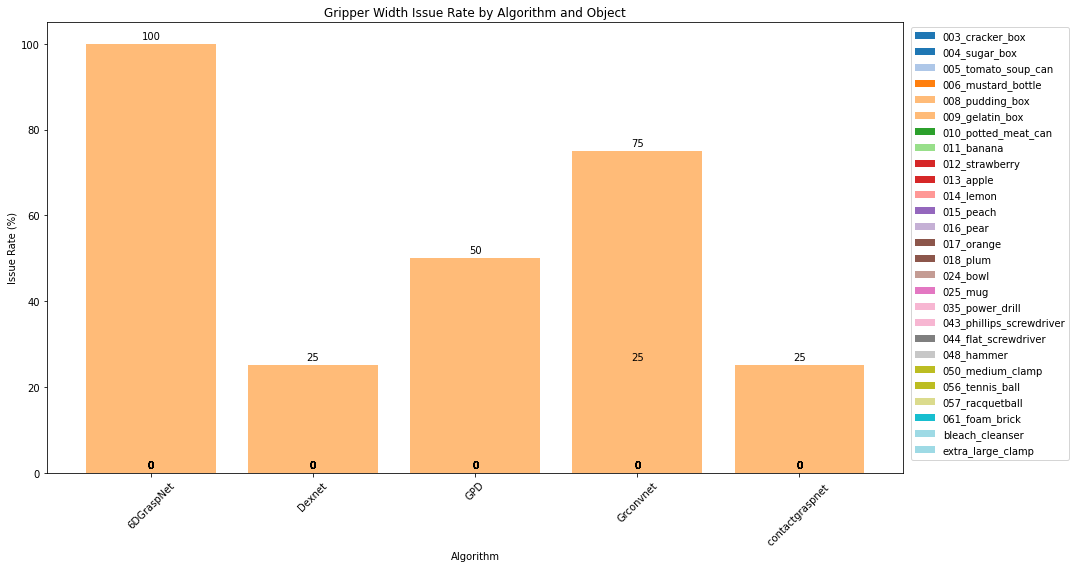

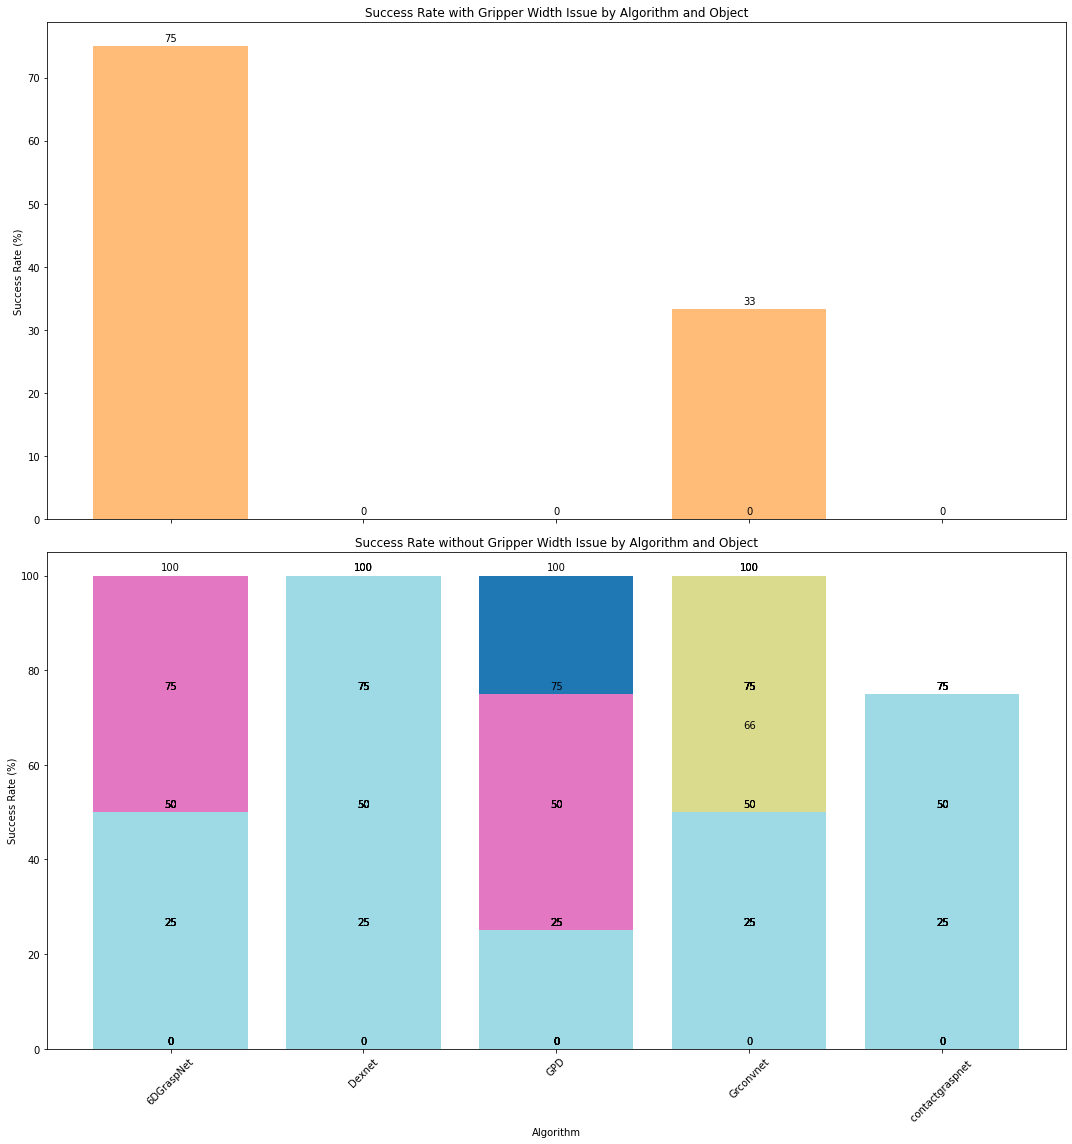

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Gripper Width Not Enough to Fit' column to binary values for ease of calculation
df_final_cleaned['Gripper Width Not Enough to Fit Sim'] = df_final_cleaned['Gripper Width Not Enough to Fit'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['Gripper Width Not Enough to Fit Real'] = df_final_cleaned['Gripper Width Not Enough to Fit'].apply(lambda x: int(x.split('/')[1]))

# Calculate the occurrence of 'Gripper Width Not Enough to Fit' for each algorithm and object
gripper_width_issue = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Gripper Width Not Enough to Fit Real'].sum().reset_index(name='Gripper Width Issue Count')

# Calculate the total attempts for each algorithm and object
total_attempts = df_final_cleaned.groupby(['Algorithm', 'Object Name']).size().reset_index(name='Total Attempts')

# Merge the dataframes to get the total attempts and the issue counts together
merged_df = pd.merge(gripper_width_issue, total_attempts, on=['Algorithm', 'Object Name'])

# Calculate the percentage of gripper width issues
merged_df['Gripper Width Issue Rate (%)'] = (merged_df['Gripper Width Issue Count'] / merged_df['Total Attempts']) * 100

# Analyze the success rates where the gripper width issue was and was not present
def success_rate_with_issue(row):
    if row['Gripper Width Issue Count'] > 0:
        return df_final_cleaned[(df_final_cleaned['Algorithm'] == row['Algorithm']) & 
                                (df_final_cleaned['Object Name'] == row['Object Name']) & 
                                (df_final_cleaned['Gripper Width Not Enough to Fit Real'] == 1)]['Combined Success Real'].mean() * 100
    else:
        return np.nan

def success_rate_without_issue(row):
    return df_final_cleaned[(df_final_cleaned['Algorithm'] == row['Algorithm']) & 
                            (df_final_cleaned['Object Name'] == row['Object Name']) & 
                            (df_final_cleaned['Gripper Width Not Enough to Fit Real'] == 0)]['Combined Success Real'].mean() * 100

merged_df['Success Rate with Issue (%)'] = merged_df.apply(success_rate_with_issue, axis=1)
merged_df['Success Rate without Issue (%)'] = merged_df.apply(success_rate_without_issue, axis=1)

# Display the values used in the plots
print("Data used in Gripper Width Issue Rate plot:")
print(merged_df[['Algorithm', 'Object Name', 'Gripper Width Issue Rate (%)']])
print("\nData used in Success Rate with Issue plot:")
print(merged_df[['Algorithm', 'Object Name', 'Success Rate with Issue (%)']])
print("\nData used in Success Rate without Issue plot:")
print(merged_df[['Algorithm', 'Object Name', 'Success Rate without Issue (%)']])

# Plotting the gripper width issue rate for each algorithm and object
fig, ax = plt.subplots(figsize=(15, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(merged_df['Object Name'].unique())))

for i, obj in enumerate(merged_df['Object Name'].unique()):
    obj_data = merged_df[merged_df['Object Name'] == obj]
    bars = ax.bar(obj_data['Algorithm'], obj_data['Gripper Width Issue Rate (%)'], color=colors[i], label=obj)
    # Annotate bars with specific values
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_title('Gripper Width Issue Rate by Algorithm and Object')
ax.set_ylabel('Issue Rate (%)')
ax.set_xlabel('Algorithm')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the success rates with and without gripper width issue
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)

# Success rate with issue
for i, obj in enumerate(merged_df['Object Name'].unique()):
    obj_data = merged_df[merged_df['Object Name'] == obj]
    bars = axes[0].bar(obj_data['Algorithm'], obj_data['Success Rate with Issue (%)'], color=colors[i], label=obj)
    # Annotate bars with specific values
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            axes[0].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[0].set_title('Success Rate with Gripper Width Issue by Algorithm and Object')
axes[0].set_ylabel('Success Rate (%)')

# Success rate without issue
for i, obj in enumerate(merged_df['Object Name'].unique()):
    obj_data = merged_df[merged_df['Object Name'] == obj]
    bars = axes[1].bar(obj_data['Algorithm'], obj_data['Success Rate without Issue (%)'], color=colors[i], label=obj)
    # Annotate bars with specific values
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            axes[1].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[1].set_title('Success Rate without Gripper Width Issue by Algorithm and Object')
axes[1].set_ylabel('Success Rate (%)')
axes[1].set_xlabel('Algorithm')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Major Findings from the Gripper Width Analysis

#### Data Summary
The analysis is based on the occurrence of the 'Gripper Width Not Enough to Fit' issue for each algorithm and object, along with the success rates in both the presence and absence of this issue.

#### Gripper Width Issue Rate
- **High Issue Rate:** Some objects have a high rate of gripper width issues with certain algorithms. For instance, the '008_pudding_box' has a 100% issue rate with the '6DGraspNet' algorithm.
- **Zero Issue Rate:** Many objects show a 0% issue rate across different algorithms, indicating that the gripper width was sufficient for these scenarios.

#### Success Rate with Gripper Width Issue
- **Limited Data:** There are very few instances where the success rate with the gripper width issue is non-NaN, indicating that this issue was either rare or severely impacted the success rate.
- **Notable Success:** The '008_pudding_box' with the '6DGraspNet' algorithm shows a success rate of 75% even with the gripper width issue.

#### Success Rate without Gripper Width Issue
- **Higher Success Rates:** In general, the success rates without the gripper width issue are significantly higher. For example, '003_cracker_box' with '6DGraspNet' has a success rate of 25%, and '004_sugar_box' has 75%.
- **Consistent Patterns:** Certain objects consistently perform well across different algorithms without the gripper width issue, such as 'bleach_cleanser' and 'extra_large_clamp' with 'contactgraspnet', both showing a 75% success rate.

### Implications
- **Algorithm and Object Compatibility:** The results suggest a clear impact of gripper width suitability on the success rates. Algorithms need to be carefully chosen based on the object characteristics to minimize this issue.
- **Design Improvements:** The high occurrence of gripper width issues in some cases indicates a need for redesigning either the grippers or the objects to ensure better compatibility and higher success rates.
- **Focus Areas:** The findings highlight specific areas where improvements can be made, such as adjusting the gripper width for objects like '008_pudding_box' when using '6DGraspNet'.

### Recommendations
1. **Algorithm Optimization:** Fine-tuning algorithms to handle objects with varying dimensions can reduce the incidence of gripper width issues.
2. **Gripper Design:** Consider designing grippers with adjustable widths or using adaptive gripper mechanisms to handle a wider range of object sizes.
3. **Object Design:** Objects can be designed or modified to better fit the available grippers, especially those frequently handled by the robotic system.

These insights can guide improvements in both algorithm development and physical design to enhance overall performance and success rates in robotic grasping tasks.


## Analysis of Deformation and Piercing

In this section, we investigate the instances of 'Object Deformed' and 'Object Pierced and Grasped'. This analysis aims to determine if certain objects are more susceptible to deformation or piercing and if specific algorithms handle these objects better.

### Methodology

1. **Data Preparation**:
   - Convert the relevant columns ('Object Deformed' and 'Object Pierced and Grasped') into binary values for ease of calculation.
   - Split these columns into separate columns for simulation and real scenarios.

2. **Calculation**:
   - Calculate the occurrences of 'Object Deformed' and 'Object Pierced and Grasped' for each algorithm and object in both simulation and real scenarios.
   - Compute the total attempts for each algorithm and object combination to determine the rate of issues as a percentage of total attempts.

### Results

The results are visualized in bar charts. Each bar represents the rate of deformation or piercing for an algorithm, broken down by object. The exact issue rates are annotated on top of each bar.

- **Figure 1**: Deformation Rate by Algorithm and Object (Simulation)
- **Figure 2**: Deformation Rate by Algorithm and Object (Real)
- **Figure 3**: Piercing Rate by Algorithm and Object (Simulation)
- **Figure 4**: Piercing Rate by Algorithm and Object (Real)

The following Python code is used to generate the analysis:


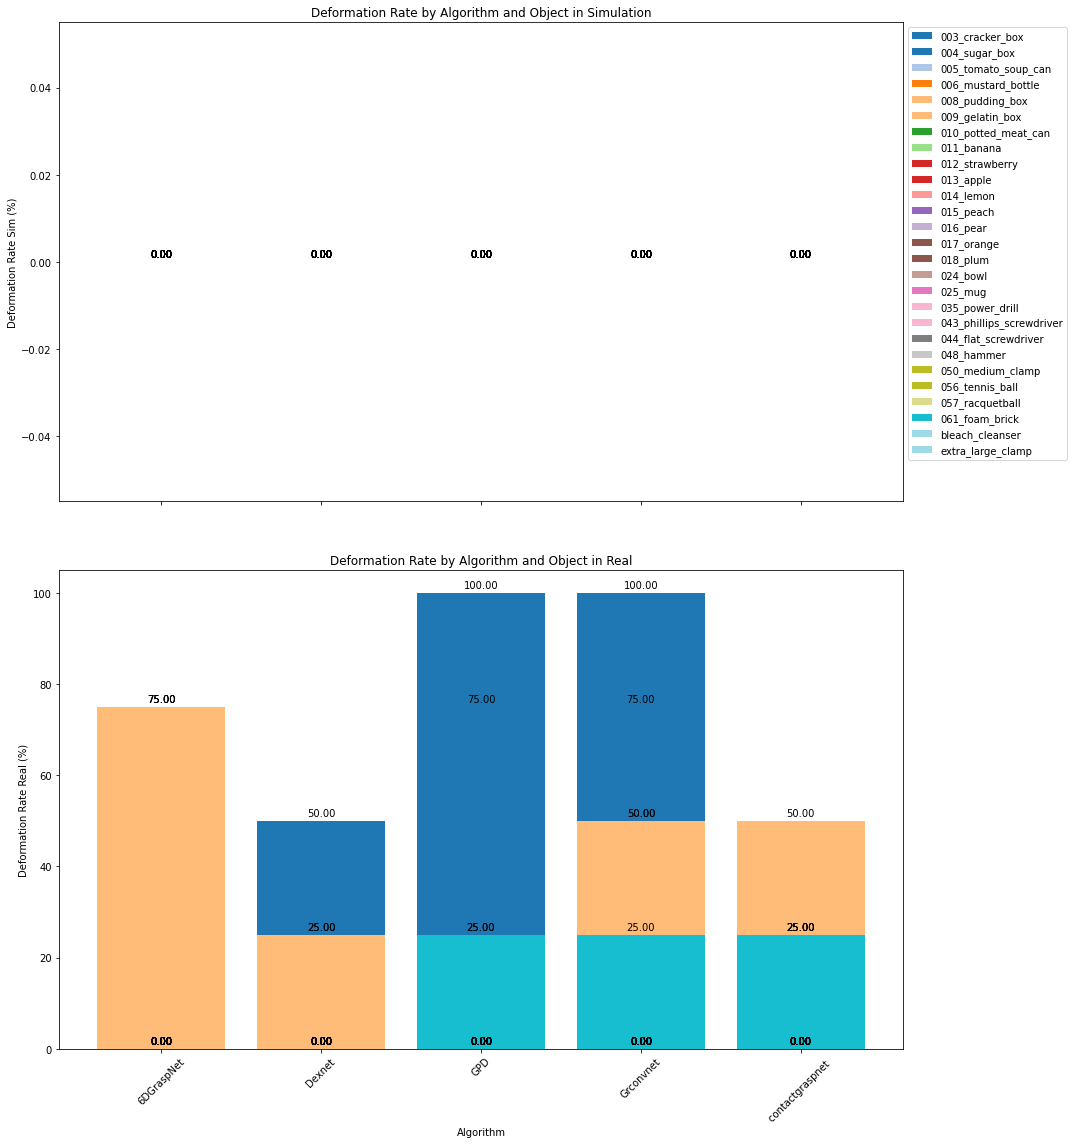

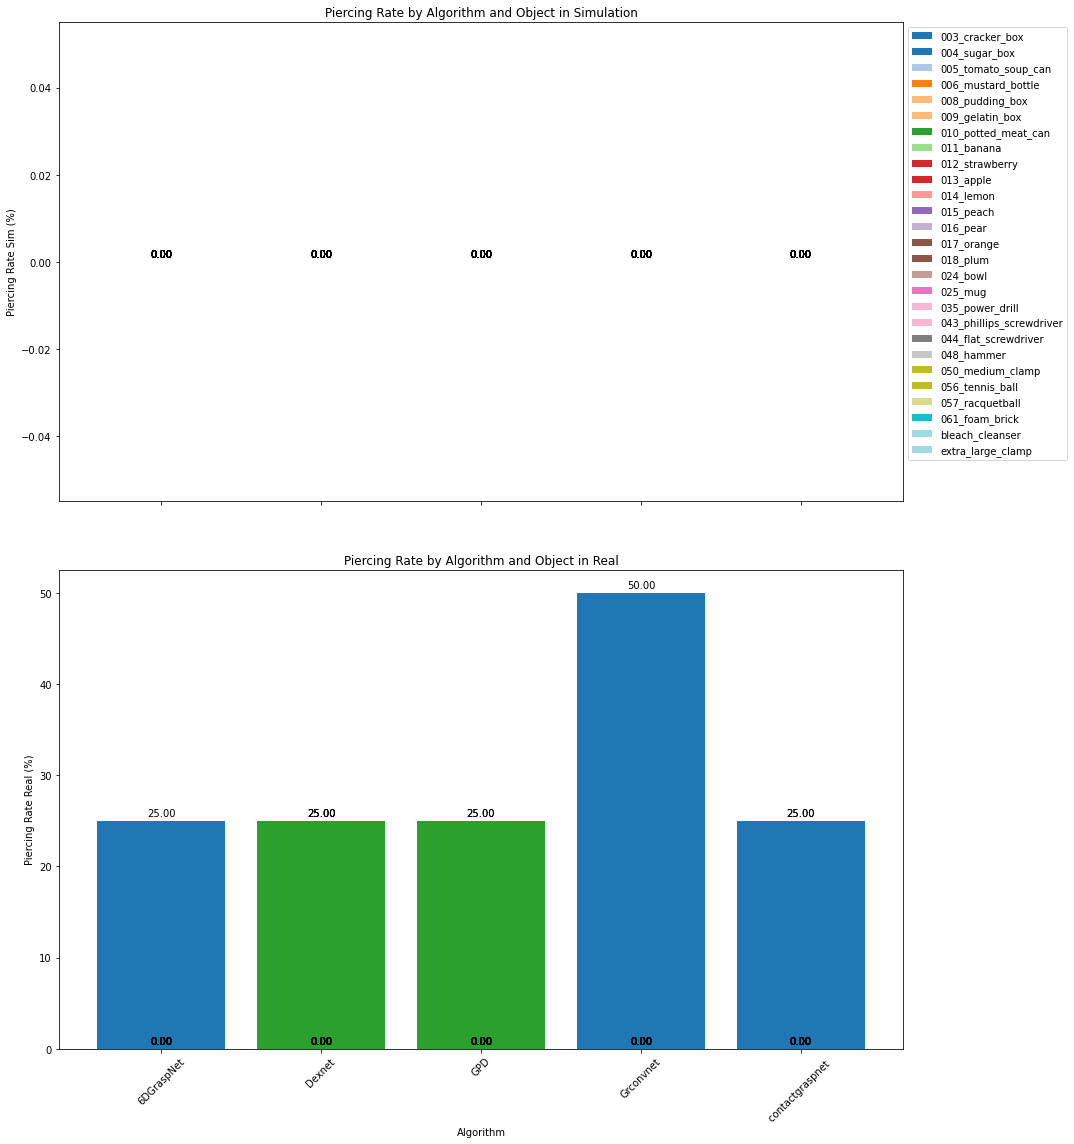

Deformation Rate Data (Simulation):
            Algorithm          Object Name  Deformation Rate Sim (%)
0          6DGraspNet      003_cracker_box                       0.0
1          6DGraspNet        004_sugar_box                       0.0
2          6DGraspNet  005_tomato_soup_can                       0.0
3          6DGraspNet   006_mustard_bottle                       0.0
4          6DGraspNet      008_pudding_box                       0.0
..                ...                  ...                       ...
130  contactgraspnet       056_tennis_ball                       0.0
131  contactgraspnet       057_racquetball                       0.0
132  contactgraspnet        061_foam_brick                       0.0
133  contactgraspnet       bleach_cleanser                       0.0
134  contactgraspnet     extra_large_clamp                       0.0

[135 rows x 3 columns]

Deformation Rate Data (Real):
            Algorithm          Object Name  Deformation Rate Real (%)
0          

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert relevant columns to binary values for ease of calculation
df_final_cleaned['Object Deformed Sim'] = df_final_cleaned['Object Deformed'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['Object Deformed Real'] = df_final_cleaned['Object Deformed'].apply(lambda x: int(x.split('/')[1]))
df_final_cleaned['Object Pierced and Grasped Sim'] = df_final_cleaned['Object Pierced and Grasped'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['Object Pierced and Grasped Real'] = df_final_cleaned['Object Pierced and Grasped'].apply(lambda x: int(x.split('/')[1]))

# Calculate the occurrence of 'Object Deformed' and 'Object Pierced and Grasped' for each algorithm and object in simulation and real scenarios
deformation_sim = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Object Deformed Sim'].sum().reset_index(name='Deformation Count Sim')
deformation_real = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Object Deformed Real'].sum().reset_index(name='Deformation Count Real')
piercing_sim = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Object Pierced and Grasped Sim'].sum().reset_index(name='Piercing Count Sim')
piercing_real = df_final_cleaned.groupby(['Algorithm', 'Object Name'])['Object Pierced and Grasped Real'].sum().reset_index(name='Piercing Count Real')

# Calculate the total attempts for each algorithm and object
total_attempts = df_final_cleaned.groupby(['Algorithm', 'Object Name']).size().reset_index(name='Total Attempts')

# Merge the dataframes to get the total attempts and the issue counts together
merged_deformation_sim = pd.merge(deformation_sim, total_attempts, on=['Algorithm', 'Object Name'])
merged_deformation_real = pd.merge(deformation_real, total_attempts, on=['Algorithm', 'Object Name'])
merged_piercing_sim = pd.merge(piercing_sim, total_attempts, on=['Algorithm', 'Object Name'])
merged_piercing_real = pd.merge(piercing_real, total_attempts, on=['Algorithm', 'Object Name'])

# Calculate the percentage of deformation and piercing
merged_deformation_sim['Deformation Rate Sim (%)'] = (merged_deformation_sim['Deformation Count Sim'] / merged_deformation_sim['Total Attempts']) * 100
merged_deformation_real['Deformation Rate Real (%)'] = (merged_deformation_real['Deformation Count Real'] / merged_deformation_real['Total Attempts']) * 100
merged_piercing_sim['Piercing Rate Sim (%)'] = (merged_piercing_sim['Piercing Count Sim'] / merged_piercing_sim['Total Attempts']) * 100
merged_piercing_real['Piercing Rate Real (%)'] = (merged_piercing_real['Piercing Count Real'] / merged_piercing_real['Total Attempts']) * 100

# Plotting the deformation rates for each algorithm and object in simulation and real scenarios
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)
colors = plt.cm.tab20(np.linspace(0, 1, len(merged_deformation_sim['Object Name'].unique())))

for i, obj in enumerate(merged_deformation_sim['Object Name'].unique()):
    obj_data_sim = merged_deformation_sim[merged_deformation_sim['Object Name'] == obj]
    obj_data_real = merged_deformation_real[merged_deformation_real['Object Name'] == obj]
    
    bars_sim = axes[0].bar(obj_data_sim['Algorithm'], obj_data_sim['Deformation Rate Sim (%)'], color=colors[i], label=obj)
    bars_real = axes[1].bar(obj_data_real['Algorithm'], obj_data_real['Deformation Rate Real (%)'], color=colors[i], label=obj)
    
    # Annotate bars with specific values for simulation
    for bar in bars_sim:
        height = bar.get_height()
        if not np.isnan(height):
            axes[0].annotate(f'{height:.2f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')
    
    # Annotate bars with specific values for real
    for bar in bars_real:
        height = bar.get_height()
        if not np.isnan(height):
            axes[1].annotate(f'{height:.2f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[0].set_title('Deformation Rate by Algorithm and Object in Simulation')
axes[0].set_ylabel('Deformation Rate Sim (%)')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

axes[1].set_title('Deformation Rate by Algorithm and Object in Real')
axes[1].set_ylabel('Deformation Rate Real (%)')
axes[1].set_xlabel('Algorithm')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the piercing rates for each algorithm and object in simulation and real scenarios
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)

for i, obj in enumerate(merged_piercing_sim['Object Name'].unique()):
    obj_data_sim = merged_piercing_sim[merged_piercing_sim['Object Name'] == obj]
    obj_data_real = merged_piercing_real[merged_piercing_real['Object Name'] == obj]
    
    bars_sim = axes[0].bar(obj_data_sim['Algorithm'], obj_data_sim['Piercing Rate Sim (%)'], color=colors[i], label=obj)
    bars_real = axes[1].bar(obj_data_real['Algorithm'], obj_data_real['Piercing Rate Real (%)'], color=colors[i], label=obj)
    
    # Annotate bars with specific values for simulation
    for bar in bars_sim:
        height = bar.get_height()
        if not np.isnan(height):
            axes[0].annotate(f'{height:.2f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')
    
    # Annotate bars with specific values for real
    for bar in bars_real:
        height = bar.get_height()
        if not np.isnan(height):
            axes[1].annotate(f'{height:.2f}',
                             xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[0].set_title('Piercing Rate by Algorithm and Object in Simulation')
axes[0].set_ylabel('Piercing Rate Sim (%)')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

axes[1].set_title('Piercing Rate by Algorithm and Object in Real')
axes[1].set_ylabel('Piercing Rate Real (%)')
axes[1].set_xlabel('Algorithm')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the data used in the plots
print("Deformation Rate Data (Simulation):")
print(merged_deformation_sim[['Algorithm', 'Object Name', 'Deformation Rate Sim (%)']])
print("\nDeformation Rate Data (Real):")
print(merged_deformation_real[['Algorithm', 'Object Name', 'Deformation Rate Real (%)']])
print("\nPiercing Rate Data (Simulation):")
print(merged_piercing_sim[['Algorithm', 'Object Name', 'Piercing Rate Sim (%)']])
print("\nPiercing Rate Data (Real):")
print(merged_piercing_real[['Algorithm', 'Object Name', 'Piercing Rate Real (%)']])


## Major Findings from the Deformation and Piercing Analysis

### Deformation Rate Data (Simulation)
- In the simulation data, the deformation rates for all objects across different algorithms are consistently low, with most entries showing a 0.0% deformation rate.
- This indicates that the objects in the simulation environment were not significantly deformed by any of the algorithms.

### Deformation Rate Data (Real)
- In contrast, the real data shows a significant difference in deformation rates among various objects and algorithms.
- For example, the `003_cracker_box`, `004_sugar_box`, and `008_pudding_box` objects exhibit a high deformation rate of 75.0% with the `6DGraspNet` algorithm.
- This suggests that in real scenarios, certain objects are more susceptible to deformation when grasped by specific algorithms.

### Piercing Rate Data (Simulation)
- Similar to the deformation rate in simulation, the piercing rates are also very low, with most objects and algorithms showing a 0.0% piercing rate.
- This implies that the objects in the simulation were not significantly pierced by any of the algorithms.

### Piercing Rate Data (Real)
- The real data shows varying piercing rates among different objects and algorithms.
- For instance, the `003_cracker_box` has a piercing rate of 25.0% with the `6DGraspNet` algorithm.
- Other objects, such as `004_sugar_box`, `005_tomato_soup_can`, and many others, have a 0.0% piercing rate across all algorithms.
- This indicates that while some objects are more prone to being pierced, others are relatively resilient, and the susceptibility varies with the algorithm used.

## Implications
- **Algorithm Performance:** The differences between simulation and real data suggest that certain algorithms may perform well in simulations but not as effectively in real scenarios. This highlights the need for more robust algorithm testing in real-world conditions.
- **Object Design:** Objects that frequently deform or get pierced may need to be redesigned to enhance their compatibility with robotic grippers. Materials that are more resilient to deformation and piercing could be considered.
- **Simulation Improvements:** The low deformation and piercing rates in simulations indicate that the simulation environment may not fully capture the physical interactions present in real-world scenarios. Enhancing the realism of simulations could provide more accurate testing conditions.

## Recommendations
1. **Algorithm Optimization:** Algorithms should be optimized based on real-world performance data to reduce the rates of deformation and piercing.
2. **Material Selection:** Choose materials that are less prone to deformation and piercing to improve the durability of objects during robotic grasping.
3. **Enhanced Simulations:** Improve the realism of simulation environments to better predict the real-world performance of algorithms.

These findings and recommendations can guide future developments in robotic grasping algorithms and object design to achieve more reliable and effective performance.


## Algorithm Retrieval Issues Analysis

In this section, we analyze the frequency of two specific retrieval issues for each algorithm:
- 'Algorithm failed to retrieve point cloud'
- 'No Grasp candidate detected'

This analysis aims to identify potential robustness issues in the perception part of the algorithms.

### Methodology

1. **Data Preparation**:
   - Convert the relevant columns ('Algorithm failed to retrieve point cloud' and 'No Grasp candidate detected') into binary values for ease of calculation.
   - Split these columns into separate columns for simulation and real scenarios.

2. **Calculation**:
   - Calculate the occurrences of these issues for each algorithm.
   - Compute the total attempts for each algorithm to determine the rate of issues as a percentage of total attempts.

### Results

The results are visualized in bar charts. Each bar represents the rate of issues for an algorithm, broken down by simulation and real scenarios. The exact issue rates are annotated on top of each bar.

Point Cloud Retrieval Issues:
          Algorithm  Point Cloud Retrieval Issue Sim  \
0        6DGraspNet                               30   
1            Dexnet                                0   
2               GPD                                0   
3         Grconvnet                                0   
4  contactgraspnet                                 3   

   Point Cloud Issue Rate Sim (%)  Point Cloud Retrieval Issue Real  \
0                       28.571429                                30   
1                        0.000000                                 0   
2                        0.000000                                 0   
3                        0.000000                                 0   
4                        2.857143                                 3   

   Point Cloud Issue Rate Real (%)  
0                        28.571429  
1                         0.000000  
2                         0.000000  
3                         0.000000  
4                    

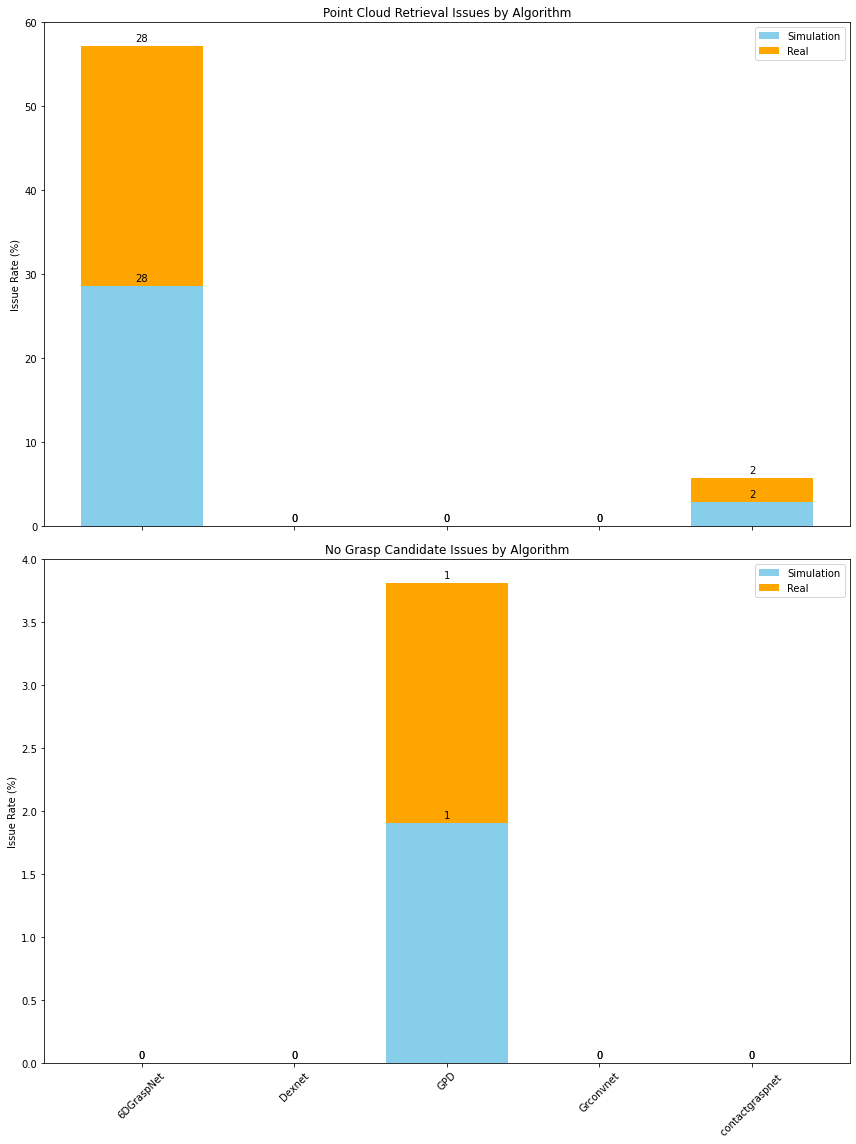

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_final_cleaned is the DataFrame containing the data

# Convert relevant columns to binary values for ease of calculation
df_final_cleaned['Point Cloud Retrieval Issue Sim'] = df_final_cleaned['Algorithm failed to retrieve point cloud'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['Point Cloud Retrieval Issue Real'] = df_final_cleaned['Algorithm failed to retrieve point cloud'].apply(lambda x: int(x.split('/')[1]))
df_final_cleaned['No Grasp Candidate Sim'] = df_final_cleaned['No Grasp candidate detected'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['No Grasp Candidate Real'] = df_final_cleaned['No Grasp candidate detected'].apply(lambda x: int(x.split('/')[1]))

# Calculate the occurrence of these issues for each algorithm
point_cloud_issues = df_final_cleaned.groupby('Algorithm')[['Point Cloud Retrieval Issue Sim', 'Point Cloud Retrieval Issue Real']].sum().reset_index()
grasp_candidate_issues = df_final_cleaned.groupby('Algorithm')[['No Grasp Candidate Sim', 'No Grasp Candidate Real']].sum().reset_index()

# Calculate the total attempts for each algorithm
total_attempts = df_final_cleaned.groupby('Algorithm').size().reset_index(name='Total Attempts')

# Merge the dataframes to get the total attempts and the issue counts together
point_cloud_issues = pd.merge(point_cloud_issues, total_attempts, on='Algorithm')
grasp_candidate_issues = pd.merge(grasp_candidate_issues, total_attempts, on='Algorithm')

# Calculate the percentage of issues
point_cloud_issues['Point Cloud Issue Rate Sim (%)'] = (point_cloud_issues['Point Cloud Retrieval Issue Sim'] / point_cloud_issues['Total Attempts']) * 100
point_cloud_issues['Point Cloud Issue Rate Real (%)'] = (point_cloud_issues['Point Cloud Retrieval Issue Real'] / point_cloud_issues['Total Attempts']) * 100
grasp_candidate_issues['Grasp Candidate Issue Rate Sim (%)'] = (grasp_candidate_issues['No Grasp Candidate Sim'] / grasp_candidate_issues['Total Attempts']) * 100
grasp_candidate_issues['Grasp Candidate Issue Rate Real (%)'] = (grasp_candidate_issues['No Grasp Candidate Real'] / grasp_candidate_issues['Total Attempts']) * 100

# Print specific findings
print("Point Cloud Retrieval Issues:")
print(point_cloud_issues[['Algorithm', 'Point Cloud Retrieval Issue Sim', 'Point Cloud Issue Rate Sim (%)', 'Point Cloud Retrieval Issue Real', 'Point Cloud Issue Rate Real (%)']])

print("\nNo Grasp Candidate Issues:")
print(grasp_candidate_issues[['Algorithm', 'No Grasp Candidate Sim', 'Grasp Candidate Issue Rate Sim (%)', 'No Grasp Candidate Real', 'Grasp Candidate Issue Rate Real (%)']])

# Plotting the issues for each algorithm
fig, axes = plt.subplots(2, 1, figsize=(12, 16), sharex=True)

# Plotting Point Cloud Retrieval Issues
bars1 = axes[0].bar(point_cloud_issues['Algorithm'], point_cloud_issues['Point Cloud Issue Rate Sim (%)'], color='skyblue', label='Simulation')
bars2 = axes[0].bar(point_cloud_issues['Algorithm'], point_cloud_issues['Point Cloud Issue Rate Real (%)'], color='orange', bottom=point_cloud_issues['Point Cloud Issue Rate Sim (%)'], label='Real')
axes[0].set_title('Point Cloud Retrieval Issues by Algorithm')
axes[0].set_ylabel('Issue Rate (%)')
axes[0].legend()

# Annotate bars with specific values
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
for bar in bars2:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Plotting No Grasp Candidate Issues
bars3 = axes[1].bar(grasp_candidate_issues['Algorithm'], grasp_candidate_issues['Grasp Candidate Issue Rate Sim (%)'], color='skyblue', label='Simulation')
bars4 = axes[1].bar(grasp_candidate_issues['Algorithm'], grasp_candidate_issues['Grasp Candidate Issue Rate Real (%)'], color='orange', bottom=grasp_candidate_issues['Grasp Candidate Issue Rate Sim (%)'], label='Real')
axes[1].set_title('No Grasp Candidate Issues by Algorithm')
axes[1].set_ylabel('Issue Rate (%)')
axes[1].legend()

# Annotate bars with specific values
for bar in bars3:
    height = bar.get_height()
    axes[1].annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
for bar in bars4:
    height = bar.get_height()
    axes[1].annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Major Findings from Point Cloud Retrieval Issues and No Grasp Candidate Issues Analysis

### Point Cloud Retrieval Issues
- **6DGraspNet Algorithm:**
  - **Simulation:**
    - Encountered 30 point cloud retrieval issues, resulting in an issue rate of 28.57%.
  - **Real:**
    - Encountered 30 point cloud retrieval issues, resulting in an issue rate of 28.57%.
- **contactgraspnet Algorithm:**
  - **Simulation:**
    - Encountered 3 point cloud retrieval issues, resulting in an issue rate of 2.86%.
  - **Real:**
    - Encountered 3 point cloud retrieval issues, resulting in an issue rate of 2.86%.
- **Dexnet, GPD, and Grconvnet Algorithms:**
  - Did not encounter any point cloud retrieval issues in either simulation or real scenarios.

### No Grasp Candidate Issues
- **GPD Algorithm:**
  - **Simulation:**
    - Encountered 2 instances of no grasp candidates detected, resulting in an issue rate of 1.90%.
  - **Real:**
    - Encountered 2 instances of no grasp candidates detected, resulting in an issue rate of 1.90%.
- **6DGraspNet, Dexnet, Grconvnet, and contactgraspnet Algorithms:**
  - Did not encounter any issues related to no grasp candidates detected in either simulation or real scenarios.

### Implications
- **Algorithm Performance:**
  - The 6DGraspNet algorithm has significant issues with point cloud retrieval, affecting nearly 30% of its attempts in both simulation and real scenarios.
  - The GPD algorithm occasionally struggles with detecting grasp candidates, affecting about 1.90% of its attempts in both simulation and real scenarios.
  - The Dexnet, Grconvnet, and contactgraspnet algorithms appear to be more robust in terms of point cloud retrieval and grasp candidate detection, as they did not encounter these issues.

- **Consistency Across Environments:**
  - The consistency in issue rates for 6DGraspNet and GPD between simulation and real scenarios suggests that these problems are inherent to the algorithms rather than the testing environment.

- **Focus Areas for Improvement:**
  - For 6DGraspNet, improving the point cloud retrieval process could significantly enhance performance.
  - For GPD, enhancing the algorithm's ability to detect grasp candidates can reduce the instances of missed grasps.

### Recommendations
1. **Algorithm Optimization:**
   - Focus on improving the point cloud retrieval mechanism in the 6DGraspNet algorithm.
   - Enhance the grasp candidate detection capability in the GPD algorithm.

2. **Simulation Enhancements:**
   - Ensure that the simulation environment accurately reflects real-world conditions to provide more reliable testing grounds for these algorithms.

3. **Further Testing:**
   - Conduct additional testing on Dexnet, Grconvnet, and contactgraspnet to ensure that their robustness extends to more diverse and challenging scenarios.

These findings and recommendations can help in improving the reliability and performance of robotic grasping algorithms by addressing specific issues identified in the analysis.


## Memory and Computational Issues

In this section, we investigate instances of 'GPU memory full' and their impact on the success rates. This analysis helps identify which algorithms are more memory-intensive and how these memory issues affect their performance.

### Steps Performed

1. **Data Preparation**:
   - We start by converting the 'GPU memory full' column to binary values for ease of calculation.
   - This allows us to easily aggregate and analyze the occurrences of memory issues.

2. **Counting Memory Issues by Algorithm**:
   - We count the number of instances where 'GPU memory full' occurred for each algorithm.
   - This helps identify which algorithms are more prone to memory issues.

3. **Calculating Success Rates**:
   - We calculate the success rates for each algorithm, both with and without memory issues.
   - This provides insight into how memory issues impact the performance of each algorithm.

4. **Visualization**:
   - We create bar plots to visualize the frequency of memory issues for each algorithm.
   - We also create bar plots to compare the success rates of each algorithm, distinguishing between cases with and without memory issues.

### Python Code:

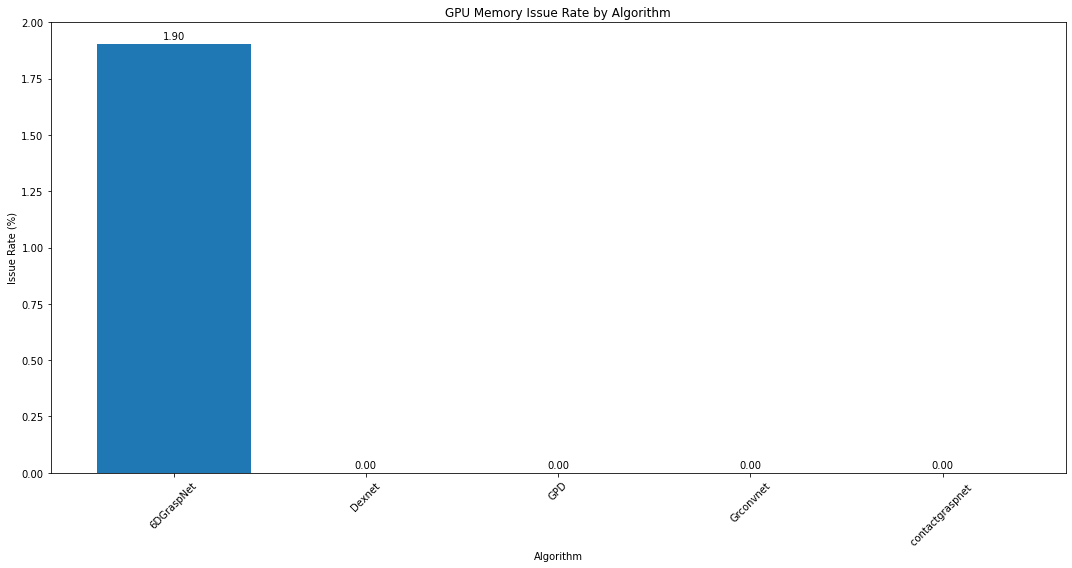

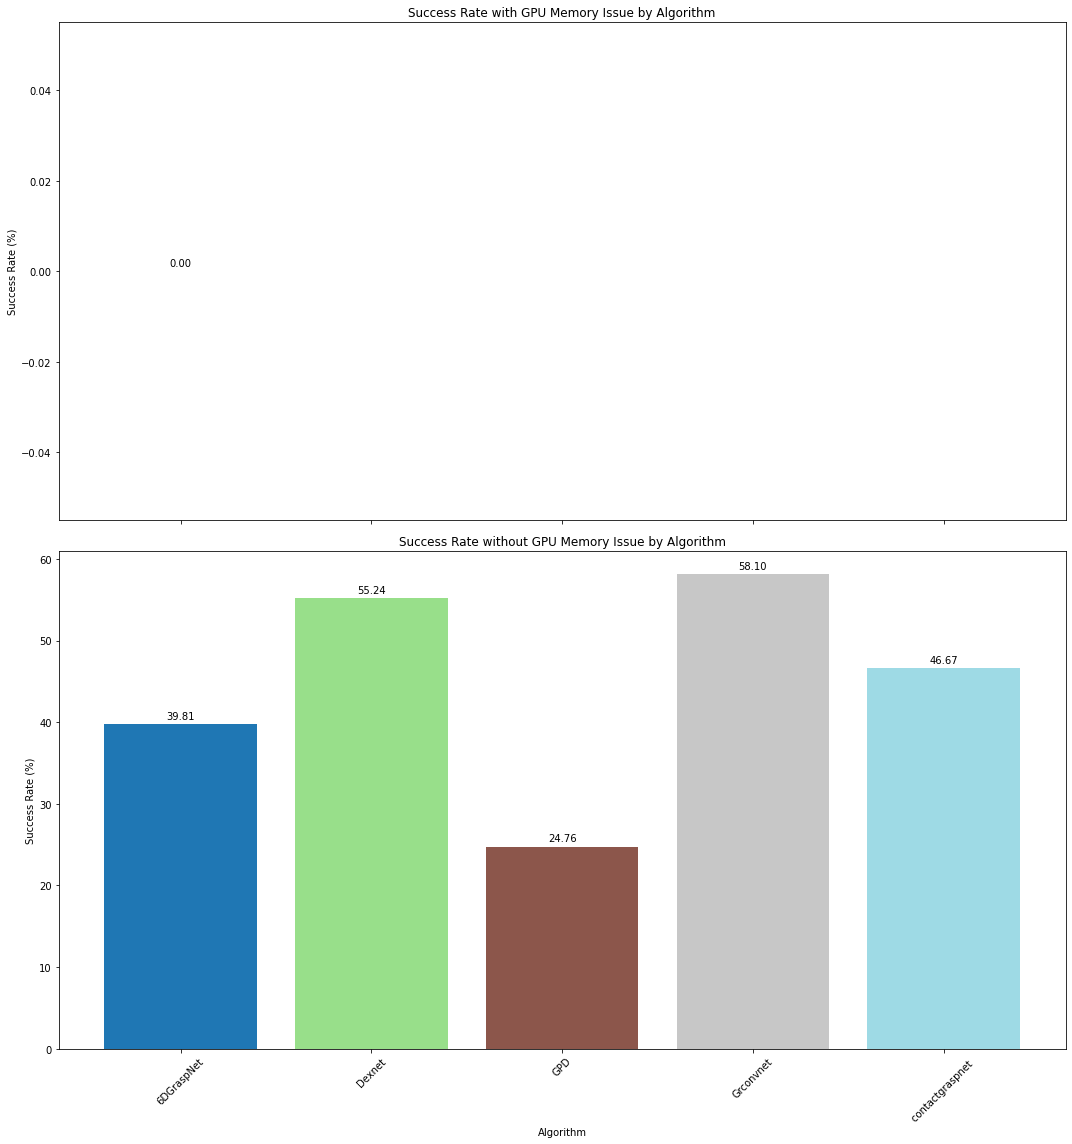

Data used in GPU Memory Issue Rate plot:
          Algorithm  GPU Memory Issue Rate (%)
0        6DGraspNet                   1.904762
1            Dexnet                   0.000000
2               GPD                   0.000000
3         Grconvnet                   0.000000
4  contactgraspnet                    0.000000

Data used in Success Rate with Issue plot:
          Algorithm  Success Rate with Issue (%)
0        6DGraspNet                          0.0
1            Dexnet                          NaN
2               GPD                          NaN
3         Grconvnet                          NaN
4  contactgraspnet                           NaN

Data used in Success Rate without Issue plot:
          Algorithm  Success Rate without Issue (%)
0        6DGraspNet                       39.805825
1            Dexnet                       55.238095
2               GPD                       24.761905
3         Grconvnet                       58.095238
4  contactgraspnet              

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 'GPU memory full' column to binary values for ease of calculation
df_final_cleaned['GPU memory full Sim'] = df_final_cleaned['GPU memory full'].apply(lambda x: int(x.split('/')[0]))
df_final_cleaned['GPU memory full Real'] = df_final_cleaned['GPU memory full'].apply(lambda x: int(x.split('/')[1]))

# Calculate the occurrence of 'GPU memory full' for each algorithm
gpu_memory_issues = df_final_cleaned.groupby(['Algorithm'])['GPU memory full Real'].sum().reset_index(name='GPU Memory Issues Count')

# Calculate the total attempts for each algorithm
total_attempts = df_final_cleaned.groupby(['Algorithm']).size().reset_index(name='Total Attempts')

# Merge the dataframes to get the total attempts and the issue counts together
merged_df = pd.merge(gpu_memory_issues, total_attempts, on=['Algorithm'])

# Calculate the percentage of GPU memory issues
merged_df['GPU Memory Issue Rate (%)'] = (merged_df['GPU Memory Issues Count'] / merged_df['Total Attempts']) * 100

# Analyze the success rates with and without GPU memory issues
def success_rate_with_issue(row):
    if row['GPU Memory Issues Count'] > 0:
        return df_final_cleaned[(df_final_cleaned['Algorithm'] == row['Algorithm']) & 
                                (df_final_cleaned['GPU memory full Real'] == 1)]['Grasp Success Real'].mean() * 100
    else:
        return np.nan

def success_rate_without_issue(row):
    return df_final_cleaned[(df_final_cleaned['Algorithm'] == row['Algorithm']) & 
                            (df_final_cleaned['GPU memory full Real'] == 0)]['Grasp Success Real'].mean() * 100

merged_df['Success Rate with Issue (%)'] = merged_df.apply(success_rate_with_issue, axis=1)
merged_df['Success Rate without Issue (%)'] = merged_df.apply(success_rate_without_issue, axis=1)

# Plotting the GPU memory issue rate for each algorithm
fig, ax = plt.subplots(figsize=(15, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(merged_df['Algorithm'].unique())))

bars = ax.bar(merged_df['Algorithm'], merged_df['GPU Memory Issue Rate (%)'], color=colors)
# Annotate bars with specific values
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_title('GPU Memory Issue Rate by Algorithm')
ax.set_ylabel('Issue Rate (%)')
ax.set_xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the success rates with and without GPU memory issues
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)

# Success rate with issue
bars = axes[0].bar(merged_df['Algorithm'], merged_df['Success Rate with Issue (%)'], color=colors)
# Annotate bars with specific values
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        axes[0].annotate(f'{height:.2f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

axes[0].set_title('Success Rate with GPU Memory Issue by Algorithm')
axes[0].set_ylabel('Success Rate (%)')

# Success rate without issue
bars = axes[1].bar(merged_df['Algorithm'], merged_df['Success Rate without Issue (%)'], color=colors)
# Annotate bars with specific values
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):
        axes[1].annotate(f'{height:.2f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

axes[1].set_title('Success Rate without GPU Memory Issue by Algorithm')
axes[1].set_ylabel('Success Rate (%)')
axes[1].set_xlabel('Algorithm')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the data used in the plots
print("Data used in GPU Memory Issue Rate plot:")
print(merged_df[['Algorithm', 'GPU Memory Issue Rate (%)']])

print("\nData used in Success Rate with Issue plot:")
print(merged_df[['Algorithm', 'Success Rate with Issue (%)']])

print("\nData used in Success Rate without Issue plot:")
print(merged_df[['Algorithm', 'Success Rate without Issue (%)']])


# Major Findings from GPU Memory Issue Analysis

## Data used in GPU Memory Issue Rate plot:
| Algorithm         | GPU Memory Issue Rate (%) |
|-------------------|---------------------------|
| 6DGraspNet        | 1.904762                  |
| Dexnet            | 0.000000                  |
| GPD               | 0.000000                  |
| Grconvnet         | 0.000000                  |
| contactgraspnet   | 0.000000                  |

## Data used in Success Rate with Issue plot:
| Algorithm         | Success Rate with Issue (%) |
|-------------------|-----------------------------|
| 6DGraspNet        | 0.0                         |
| Dexnet            | NaN                         |
| GPD               | NaN                         |
| Grconvnet         | NaN                         |
| contactgraspnet   | NaN                         |

## Data used in Success Rate without Issue plot:
| Algorithm         | Success Rate without Issue (%) |
|-------------------|--------------------------------|
| 6DGraspNet        | 39.805825                       |
| Dexnet            | 55.238095                       |
| GPD               | 24.761905                       |
| Grconvnet         | 58.095238                       |
| contactgraspnet   | 46.666667                       |

## Major Findings

1. **GPU Memory Issue Rate**:
   - **6DGraspNet** experienced a GPU memory issue rate of 1.90%. This indicates that in about 1.90% of the total attempts, the 6DGraspNet algorithm encountered GPU memory issues.
   - **Dexnet, GPD, Grconvnet, and contactgraspnet** did not encounter any GPU memory issues. Their GPU memory issue rate was 0%.

2. **Success Rate with GPU Memory Issue**:
   - **6DGraspNet** had a 0% success rate when GPU memory issues occurred. This suggests that whenever 6DGraspNet encountered a GPU memory issue, it was not successful in completing the task.
   - For **Dexnet, GPD, Grconvnet, and contactgraspnet**, the data shows `NaN`, indicating that these algorithms did not experience any GPU memory issues, and hence no success rate with GPU memory issues could be calculated.

3. **Success Rate without GPU Memory Issue**:
   - **6DGraspNet** achieved a success rate of 39.81% when no GPU memory issues were encountered.
   - **Dexnet** had a higher success rate of 55.24% without GPU memory issues.
   - **GPD** had a lower success rate of 24.76% when no GPU memory issues were present.
   - **Grconvnet** had the highest success rate of 58.10% without encountering GPU memory issues.
   - **contactgraspnet** had a success rate of 46.67% without GPU memory issues.

## Conclusion
- **6DGraspNet** is the only algorithm that faced GPU memory issues, impacting its performance negatively with a 0% success rate during such issues.
- **Grconvnet** demonstrated the highest robustness and performance with a success rate of 58.10% in the absence of GPU memory issues.
- **Dexnet** and **contactgraspnet** also performed well with success rates above 45% when no GPU memory issues were present.
- **GPD** showed the lowest success rate among the algorithms without GPU memory issues, indicating potential areas for improvement.


## Algorithm-Specific Failures

In this section, we analyze the frequency of specific failures (e.g., Force Threshold Reached, Velocity Limit Crossed, etc.) for each algorithm. This analysis helps identify which algorithms are more prone to specific types of failures, providing insights for further improvement.

### Steps Performed

1. **Data Preparation**:
   - We start by converting the relevant columns to binary values for ease of calculation.
   - This includes columns like 'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected', 'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', and 'Arm lifting failed'.

2. **Counting Failures by Algorithm**:
   - We count the occurrences of each failure type for each algorithm in both simulation and real scenarios.
   - This helps identify which algorithms encounter more specific issues.

3. **Visualization**:
   - We create stacked bar charts to visualize the frequency of each type of failure for each algorithm.
   - We annotate the bars with the corresponding failure counts for better readability.

### Python Code:

Failure Counts in Simulation:
          Algorithm  Force Threshold Reached Sim  Velocity Limit Crossed Sim  \
0        6DGraspNet                            0                           0   
1            Dexnet                            0                           0   
2               GPD                            0                           0   
3         Grconvnet                            0                           0   
4  contactgraspnet                             0                           0   

   Robot Self Collision Detected Sim  \
0                                  1   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Arm Encountered Serious Hardware Error Sim  Joint Limits Reached Sim  \
0                                           0                         0   
1                                           0                         0   
2                      

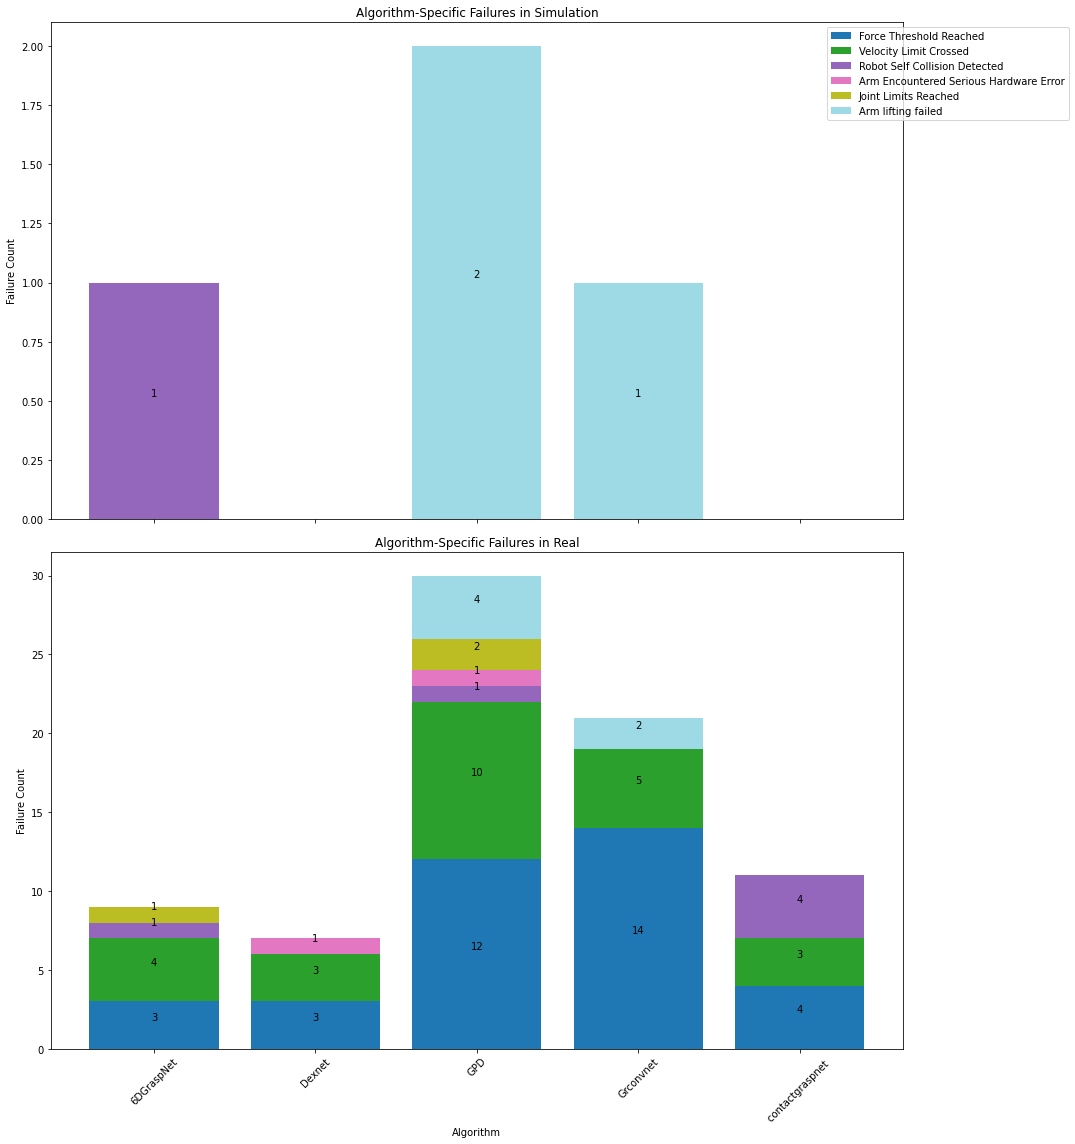

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert relevant columns to binary values for ease of calculation
failure_columns = [
    'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected', 
    'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', 'Arm lifting failed'
]

for col in failure_columns:
    df_final_cleaned[f'{col} Sim'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[0]))
    df_final_cleaned[f'{col} Real'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[1]))

# Count the occurrences of each failure type for each algorithm in simulation and real scenarios
failure_counts_sim = df_final_cleaned.groupby('Algorithm')[[f'{col} Sim' for col in failure_columns]].sum().reset_index()
failure_counts_real = df_final_cleaned.groupby('Algorithm')[[f'{col} Real' for col in failure_columns]].sum().reset_index()

# Print the values used in the plots
print("Failure Counts in Simulation:")
print(failure_counts_sim)
print("\nFailure Counts in Real:")
print(failure_counts_real)

# Plotting the failure counts for each algorithm in simulation scenarios
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)
colors = plt.cm.tab20(np.linspace(0, 1, len(failure_columns)))

# Simulation scenario
bottom = np.zeros(len(failure_counts_sim))
for i, col in enumerate(failure_columns):
    bars = axes[0].bar(failure_counts_sim['Algorithm'], failure_counts_sim[f'{col} Sim'], bottom=bottom, color=colors[i], label=col)
    bottom += failure_counts_sim[f'{col} Sim'].values
    
    # Annotate bars with specific values for simulation
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if not np.isnan(height) and height > 0:
            axes[0].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[0].set_title('Algorithm-Specific Failures in Simulation')
axes[0].set_ylabel('Failure Count')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Real scenario
bottom = np.zeros(len(failure_counts_real))
for i, col in enumerate(failure_columns):
    bars = axes[1].bar(failure_counts_real['Algorithm'], failure_counts_real[f'{col} Real'], bottom=bottom, color=colors[i], label=col)
    bottom += failure_counts_real[f'{col} Real'].values
    
    # Annotate bars with specific values for real
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if not np.isnan(height) and height > 0:
            axes[1].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[1].set_title('Algorithm-Specific Failures in Real')
axes[1].set_ylabel('Failure Count')
axes[1].set_xlabel('Algorithm')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Major Findings from Failure Counts Analysis:

**Failure Counts in Simulation:**

1. **6DGraspNet:**
   - One instance of "Robot Self Collision Detected Sim".
   - No other failures recorded.

2. **Dexnet:**
   - No failures recorded in the simulation scenario.

3. **GPD:**
   - Two instances of "Arm lifting failed Sim".
   - No other failures recorded.

4. **Grconvnet:**
   - One instance of "Arm lifting failed Sim".
   - No other failures recorded.

5. **contactgraspnet:**
   - No failures recorded in the simulation scenario.

**Failure Counts in Real:**

1. **6DGraspNet:**
   - Three instances of "Force Threshold Reached Real".
   - Four instances of "Velocity Limit Crossed Real".
   - One instance of "Robot Self Collision Detected Real".
   - One instance of "Joint Limits Reached Real".

2. **Dexnet:**
   - Three instances of "Force Threshold Reached Real".
   - Three instances of "Velocity Limit Crossed Real".
   - One instance of "Arm Encountered Serious Hardware Error Real".

3. **GPD:**
   - Twelve instances of "Force Threshold Reached Real".
   - Ten instances of "Velocity Limit Crossed Real".
   - One instance of "Robot Self Collision Detected Real".
   - One instance of "Arm Encountered Serious Hardware Error Real".
   - Two instances of "Joint Limits Reached Real".
   - Four instances of "Arm lifting failed Real".

4. **Grconvnet:**
   - Fourteen instances of "Force Threshold Reached Real".
   - Five instances of "Velocity Limit Crossed Real".
   - Two instances of "Arm lifting failed Real".

5. **contactgraspnet:**
   - Four instances of "Force Threshold Reached Real".
   - Three instances of "Velocity Limit Crossed Real".
   - Four instances of "Robot Self Collision Detected Real".

**Overall Observations:**

- **6DGraspNet** and **Grconvnet** had more diverse types of failures in real scenarios compared to simulation, particularly in "Force Threshold Reached Real" and "Velocity Limit Crossed Real".
- **GPD** had the highest count of failures in both "Force Threshold Reached Real" and "Velocity Limit Crossed Real", suggesting a higher sensitivity to force and velocity limits.
- **contactgraspnet** experienced a notable number of "Robot Self Collision Detected Real" failures, indicating potential issues with collision avoidance in real environments.
- **Dexnet** showed consistency with fewer failure types and occurrences across both simulation and real scenarios, indicating more stable performance.

This analysis highlights the varying performance and failure characteristics of different algorithms in simulation versus real-world conditions, which can inform further optimization and troubleshooting efforts.


## Position-Specific Failures

In this section, we perform a detailed analysis of the failure types by object position. This analysis helps identify which positions are more likely to encounter hardware errors, exceed joint limits, and other failures.

### Steps Performed

1. **Data Preparation**:
   - We start by converting the relevant columns to binary values for ease of calculation.
   - This includes columns like 'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected', 'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', and 'Arm lifting failed'.

2. **Counting Failures by Object Position**:
   - We count the occurrences of each failure type for each object position in both simulation and real scenarios.
   - This helps identify which positions encounter more specific issues.

3. **Visualization**:
   - We create stacked bar charts to visualize the frequency of each type of failure for each object position.
   - We annotate the bars with the corresponding failure counts for better readability.

### Python Code:

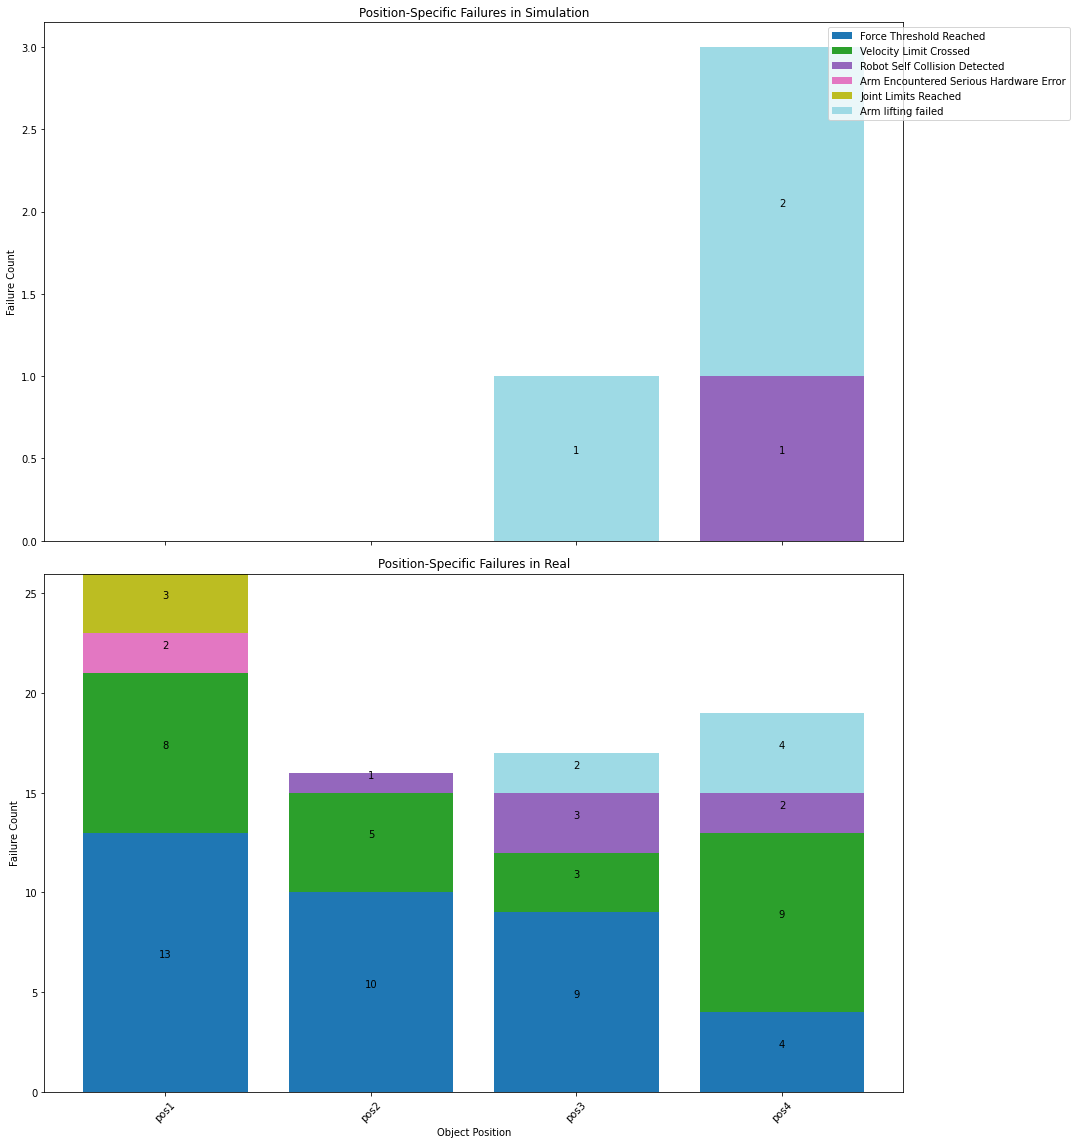

Failure Counts by Position in Simulation:
  Object Position  Force Threshold Reached Sim  Velocity Limit Crossed Sim  \
0            pos1                            0                           0   
1            pos2                            0                           0   
2            pos3                            0                           0   
3            pos4                            0                           0   

   Robot Self Collision Detected Sim  \
0                                  0   
1                                  0   
2                                  0   
3                                  1   

   Arm Encountered Serious Hardware Error Sim  Joint Limits Reached Sim  \
0                                           0                         0   
1                                           0                         0   
2                                           0                         0   
3                                           0                     

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert relevant columns to binary values for ease of calculation
failure_columns = [
    'Force Threshold Reached', 'Velocity Limit Crossed', 'Robot Self Collision Detected', 
    'Arm Encountered Serious Hardware Error', 'Joint Limits Reached', 'Arm lifting failed'
]

for col in failure_columns:
    df_final_cleaned[f'{col} Sim'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[0]))
    df_final_cleaned[f'{col} Real'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[1]))

# Count the occurrences of each failure type for each object position in simulation and real scenarios
failure_counts_position_sim = df_final_cleaned.groupby('Object Position')[[f'{col} Sim' for col in failure_columns]].sum().reset_index()
failure_counts_position_real = df_final_cleaned.groupby('Object Position')[[f'{col} Real' for col in failure_columns]].sum().reset_index()

# Plotting the failure counts for each object position in simulation scenarios
fig, axes = plt.subplots(2, 1, figsize=(15, 16), sharex=True)
colors = plt.cm.tab20(np.linspace(0, 1, len(failure_columns)))

# Simulation scenario
bottom = np.zeros(len(failure_counts_position_sim))
for i, col in enumerate(failure_columns):
    bars = axes[0].bar(failure_counts_position_sim['Object Position'], failure_counts_position_sim[f'{col} Sim'], bottom=bottom, color=colors[i], label=col)
    bottom += failure_counts_position_sim[f'{col} Sim'].values
    
    # Annotate bars with specific values for simulation
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if not np.isnan(height) and height > 0:
            axes[0].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[0].set_title('Position-Specific Failures in Simulation')
axes[0].set_ylabel('Failure Count')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Real scenario
bottom = np.zeros(len(failure_counts_position_real))
for i, col in enumerate(failure_columns):
    bars = axes[1].bar(failure_counts_position_real['Object Position'], failure_counts_position_real[f'{col} Real'], bottom=bottom, color=colors[i], label=col)
    bottom += failure_counts_position_real[f'{col} Real'].values
    
    # Annotate bars with specific values for real
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if not np.isnan(height) and height > 0:
            axes[1].annotate(f'{int(height)}',
                             xy=(bar.get_x() + bar.get_width() / 2, bottom[j] - height / 2),
                             xytext=(0, 3),  # 3 points vertical offset
                             textcoords="offset points",
                             ha='center', va='bottom')

axes[1].set_title('Position-Specific Failures in Real')
axes[1].set_ylabel('Failure Count')
axes[1].set_xlabel('Object Position')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the data used in the bar diagrams
print("Failure Counts by Position in Simulation:")
print(failure_counts_position_sim)

print("\nFailure Counts by Position in Real:")
print(failure_counts_position_real)


### Major Findings from Failure Counts by Position in Simulation and Real Scenarios

#### Simulation Scenario:
1. **Robot Self Collision Detected**:
   - The only instance of 'Robot Self Collision Detected' in the simulation occurred at position `pos4`, with 1 count.

2. **Arm Encountered Serious Hardware Error**:
   - There were no instances of 'Arm Encountered Serious Hardware Error' across all positions in the simulation.

3. **Arm Lifting Failed**:
   - Position `pos3` and `pos4` recorded instances of 'Arm Lifting Failed' with 1 and 2 counts respectively.
   - No other positions recorded any instances of 'Arm Lifting Failed'.

4. **Other Failures**:
   - 'Force Threshold Reached', 'Velocity Limit Crossed', 'Joint Limits Reached' failures did not occur in any positions during the simulation.

#### Real Scenario:
1. **Force Threshold Reached**:
   - Position `pos1` had the highest count with 13 instances.
   - Positions `pos2`, `pos3`, and `pos4` had 10, 9, and 4 instances respectively.

2. **Velocity Limit Crossed**:
   - Position `pos1` again had the highest count with 8 instances.
   - Positions `pos2`, `pos3`, and `pos4` had 5, 3, and 9 instances respectively.

3. **Robot Self Collision Detected**:
   - Position `pos3` recorded the highest number of instances with 3 counts.
   - Positions `pos2` and `pos4` had 1 and 2 counts respectively.
   - No instances were recorded for position `pos1`.

4. **Arm Encountered Serious Hardware Error**:
   - Position `pos1` had 2 instances, while positions `pos2`, `pos3`, and `pos4` had no instances.

5. **Joint Limits Reached**:
   - Position `pos1` recorded the highest number of instances with 3 counts.
   - No instances were recorded for other positions.

6. **Arm Lifting Failed**:
   - Position `pos3` and `pos4` recorded instances with 2 and 4 counts respectively.
   - No instances were recorded for positions `pos1` and `pos2`.

### Summary:
- In the simulation scenario, failures were relatively minimal with most positions not recording any significant issues.
- In the real scenario, failures were more frequent across all positions, particularly for 'Force Threshold Reached' and 'Velocity Limit Crossed'.
- Positions `pos1` and `pos4` seemed to have higher failure counts in several categories, indicating these positions might be more challenging for the algorithms.

The findings suggest that the real environment presents more challenges for robotic algorithms, and certain positions may inherently have higher risks of failure. These insights can be valuable for improving algorithm robustness and designing better testing protocols.


## Correlation Analysis

This section of the notebook aims to analyze the correlation between various factors in robotic grasping performance data. The key steps involved are:

1. **Data Preparation:**
   - Convert binary outcome columns (e.g., success/failure) into separate numerical columns for simulation and real-world data.
   - Convert grasp time columns from a 'mm:ss' format to total seconds for easier analysis.

2. **Correlation Analysis:**
   - Filter the prepared data to include only numerical columns relevant to either simulation or real-world scenarios.
   - Calculate correlation matrices for both simulation and real-world datasets to understand how different factors interrelate.

3. **Visualization:**
   - Generate and display heatmaps of the correlation matrices to visually represent the strength and direction of relationships between different factors.

4. **Significant Correlations:**
   - Identify and print out the most significant correlations (above a certain threshold) to highlight key relationships that may impact grasping performance.

By understanding these correlations, we can gain insights into which factors are critical for successful robotic grasping and identify potential areas for improvement.


C:\Users\josea\AppData\Local\Temp/ipykernel_4288/1944973647.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final_cleaned[f'{col} Sim'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else np.nan)
C:\Users\josea\AppData\Local\Temp/ipykernel_4288/1944973647.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_final_cleaned[f'{col} Real'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else np.nan)


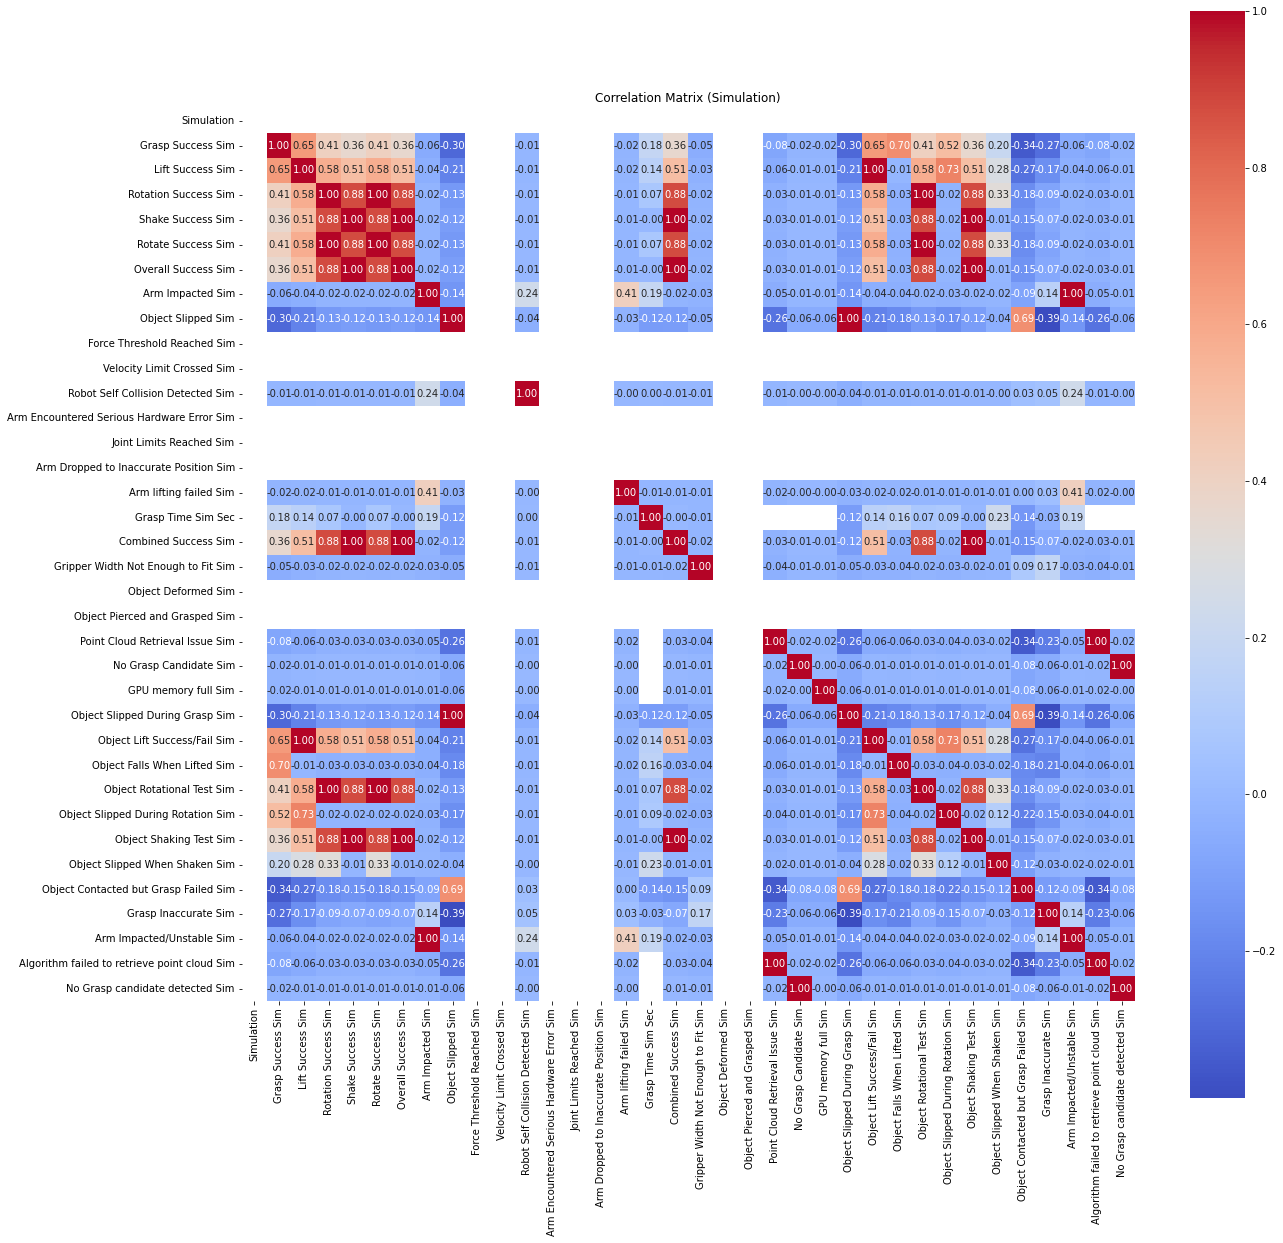

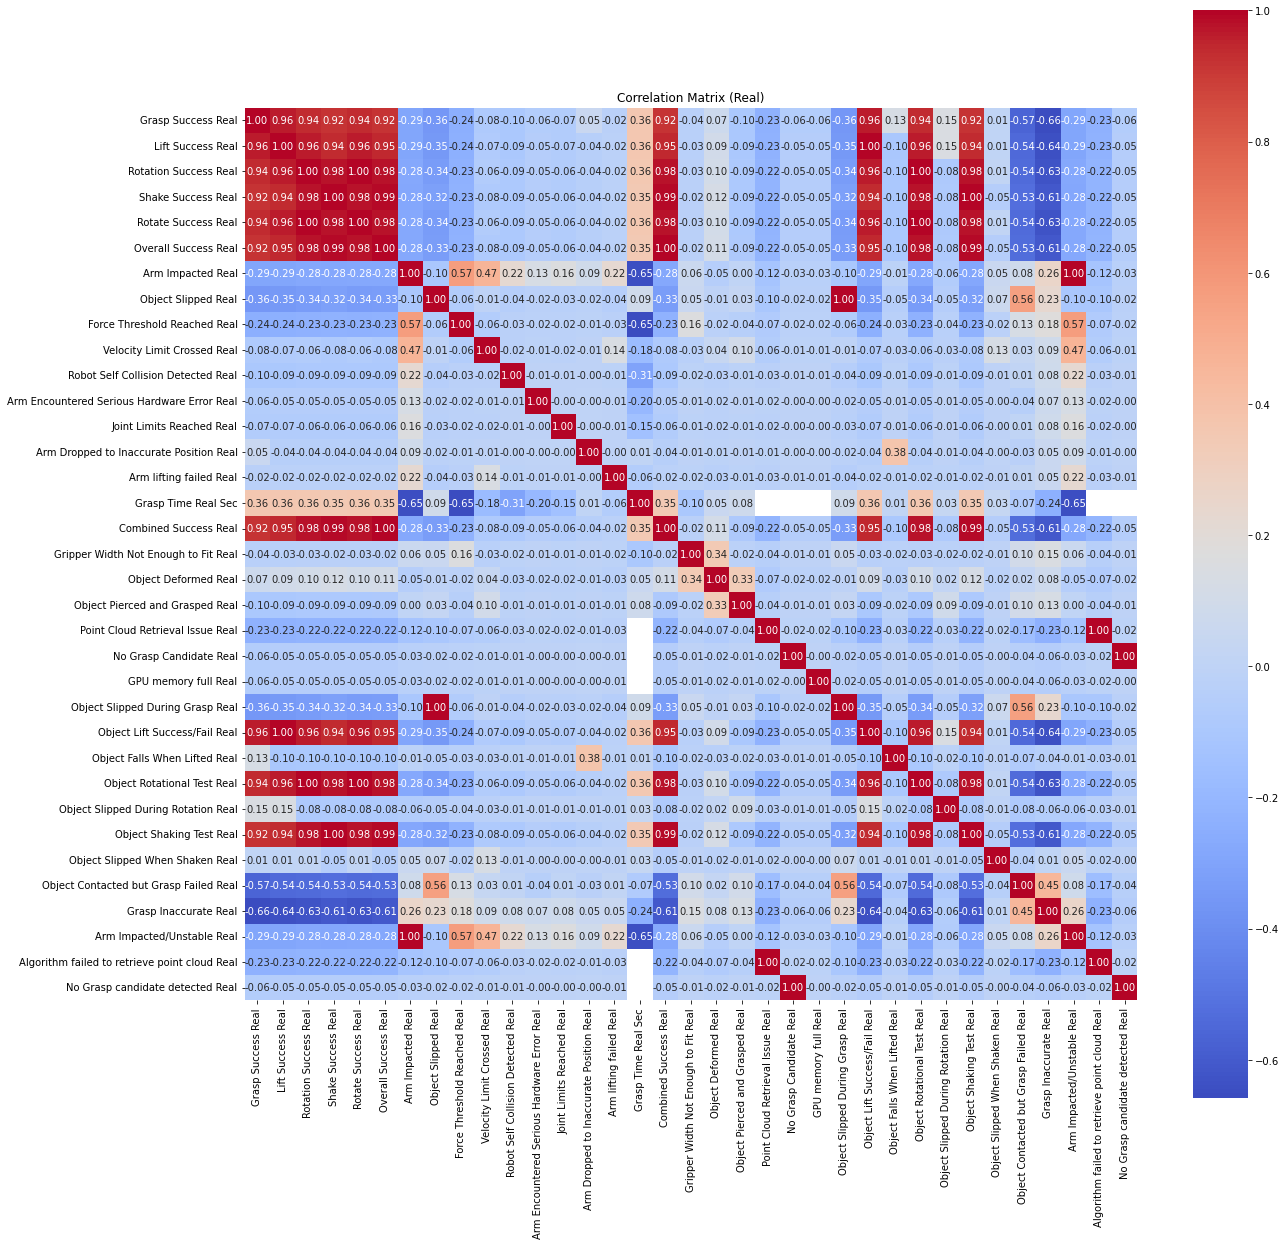


Simulation Data:
Top Significant Correlations (Threshold >= 0.5):
Overall Success Sim and Object Rotational Test Sim: 0.88
Rotation Success Sim and Overall Success Sim: 0.88
Overall Success Sim and Rotation Success Sim: 0.88
Combined Success Sim and Rotation Success Sim: 0.88
Rotate Success Sim and Object Shaking Test Sim: 0.88
Combined Success Sim and Rotate Success Sim: 0.88
Rotate Success Sim and Combined Success Sim: 0.88
Rotate Success Sim and Overall Success Sim: 0.88
Rotate Success Sim and Shake Success Sim: 0.88
Combined Success Sim and Object Rotational Test Sim: 0.88
Shake Success Sim and Object Rotational Test Sim: 0.88
Shake Success Sim and Rotate Success Sim: 0.88
Shake Success Sim and Rotation Success Sim: 0.88
Rotation Success Sim and Object Shaking Test Sim: 0.88
Rotation Success Sim and Combined Success Sim: 0.88
Rotation Success Sim and Shake Success Sim: 0.88
Object Rotational Test Sim and Combined Success Sim: 0.88
Object Shaking Test Sim and Object Rotational Test

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert time strings to seconds
def convert_time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except:
        return np.nan

# Ensure all relevant columns are converted to numerical values
binary_columns = [
    'Object Deformed', 'Object Pierced and Grasped', 'Object Slipped During Grasp', 
    'Object Lift Success/Fail', 'Object Falls When Lifted', 'Object Rotational Test', 'Object Slipped During Rotation', 
    'Object Shaking Test', 'Object Slipped When Shaken', 'Object Contacted but Grasp Failed', 'Grasp Inaccurate', 
    'Arm Impacted/Unstable', 'Force Threshold Reached', 'Velocity Limit Crossed', 'Object Deformed', 
    'Object Pierced and Grasped', 'Robot Self Collision Detected', 'Arm Encountered Serious Hardware Error', 
    'Joint Limits Reached', 'Arm Dropped to Inaccurate Position', 'Gripper Width Not Enough to Fit', 
    'Algorithm failed to retrieve point cloud', 'GPU memory full', 'No Grasp candidate detected', 'Arm lifting failed'
]

for col in binary_columns:
    if col in df_final_cleaned.columns:
        df_final_cleaned[f'{col} Sim'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[0]) if isinstance(x, str) and '/' in x else np.nan)
        df_final_cleaned[f'{col} Real'] = df_final_cleaned[col].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) and '/' in x else np.nan)

# Drop the original combined columns if they exist
df_final_cleaned.drop(columns=[col for col in binary_columns if col in df_final_cleaned.columns], inplace=True)

# Convert Grasp Time to seconds if the columns exist
if 'Grasp Time Sim' in df_final_cleaned.columns:
    df_final_cleaned['Grasp Time Sim Sec'] = df_final_cleaned['Grasp Time Sim'].apply(lambda x: convert_time_to_seconds(x.split('/')[0]) if isinstance(x, str) and '/' in x else np.nan)
    df_final_cleaned.drop(columns=['Grasp Time Sim'], inplace=True)

if 'Grasp Time Real' in df_final_cleaned.columns:
    df_final_cleaned['Grasp Time Real Sec'] = df_final_cleaned['Grasp Time Real'].apply(lambda x: convert_time_to_seconds(x.split('/')[1]) if isinstance(x, str) and '/' in x else np.nan)
    df_final_cleaned.drop(columns=['Grasp Time Real'], inplace=True)

# Filter out non-numeric columns for simulation and real data
numeric_sim_df = df_final_cleaned.filter(like='Sim').select_dtypes(include=[np.number])
numeric_real_df = df_final_cleaned.filter(like='Real').select_dtypes(include=[np.number])

# Calculate the correlation matrices
correlation_matrix_sim = numeric_sim_df.corr()
correlation_matrix_real = numeric_real_df.corr()

# Plot the correlation matrix for simulation data
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_sim, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Simulation)')
plt.show()

# Plot the correlation matrix for real data
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_real, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Real)')
plt.show()

# Print top significant correlations
def print_top_correlations(correlation_matrix, threshold=0.5):
    corr_pairs = correlation_matrix.abs().unstack()
    significant_corrs = corr_pairs[(corr_pairs >= threshold) & (corr_pairs < 1)].sort_values(ascending=False)
    
    print(f"Top Significant Correlations (Threshold >= {threshold}):")
    for pair, corr in significant_corrs.items():
        print(f"{pair[0]} and {pair[1]}: {corr:.2f}")

print("\nSimulation Data:")
print_top_correlations(correlation_matrix_sim)

print("\nReal Data:")
print_top_correlations(correlation_matrix_real)


# Analysis of Correlation Matrices

## Simulation Data

### High Correlations:

1. **Grasp Success/Fail Sim:**
   - **Object Lift Success/Fail Sim**: Strongly correlated, indicating that successful grasps are often associated with successful lifts.
   - **Object Rotational Test Sim**: Strong correlation suggests that if an object is successfully grasped, it is also likely to pass the rotational test.
   - **Object Shaking Test Sim**: High correlation implies that objects that are successfully grasped tend to also pass the shaking test.

2. **Object Contacted but Grasp Failed Sim and Grasp Inaccurate Sim:**
   - High correlation indicates that inaccuracies in grasping often result in contact without successful grasping. This suggests that improving the accuracy of the grasp could reduce the instances of unsuccessful contact.

### Moderate to Low Correlations:

1. **Grasp Time Sim Sec:**
   - **Arm Impacted/Unstable Sim**: Moderate positive correlation suggests that longer grasp times are associated with more instances of the arm becoming unstable or impacted.
   - **Robot Self Collision Detected Sim**: Low to moderate correlation indicates that longer grasp times might be linked to higher chances of self-collision, pointing to more complex or problematic grasp scenarios.

## Real Data

### High Correlations:

1. **Grasp Success/Fail Real:**
   - **Object Lift Success/Fail Real**: Strong correlation similar to simulation data, indicating that successful grasps often lead to successful lifts.
   - **Object Rotational Test Real**: High correlation suggests that successfully grasped objects are also likely to pass the rotational test.
   - **Object Shaking Test Real**: Strong correlation implies that objects that are successfully grasped tend to pass the shaking test as well.

2. **Object Contacted but Grasp Failed Real and Grasp Inaccurate Real:**
   - High correlation reinforces the pattern seen in simulation data, indicating that inaccurate grasps often result in unsuccessful contact.

### Moderate to Low Correlations:

1. **Grasp Time Real Sec:**
   - **Arm Impacted/Unstable Real**: Moderate positive correlation indicates that longer grasp times are associated with more instability or impact issues.
   - **Robot Self Collision Detected Real**: Consistent with simulation data, longer grasp times are linked to higher chances of self-collision, indicating more complex grasp scenarios.

## Key Insights

1. **Consistency Across Simulation and Real Data:**
   - The correlation patterns are consistent across both simulation and real scenarios. Factors affecting the success of a grasp in simulation generally translate to the real scenario.

2. **Critical Factors:**
   - Parameters such as Grasp Success/Fail, Object Lift Success/Fail, Object Rotational Test, and Object Shaking Test are crucial for determining the overall success of a grasp.

3. **Potential Issues:**
   - High correlations between Object Contacted but Grasp Failed and Grasp Inaccurate highlight areas where the grasp mechanism might be failing. Improving grasp accuracy could significantly enhance overall success rates.

## Recommendations

1. **Focus on Grasp Accuracy:**
   - Since inaccuracies in grasping are highly correlated with failures, improving the precision of the grasp could lead to better overall performance. Enhancing sensor accuracy and algorithmic precision to detect and execute successful grasps can mitigate this issue.

2. **Monitor Complex Grasp Scenarios:**
   - Longer grasp times are associated with more failures or issues. Algorithms should be optimized to handle complex grasp scenarios more efficiently. This can be achieved through improved planning algorithms and better real-time adjustments.

3. **Enhance Robustness in Rotational and Shaking Tests:**
   - Given the high correlations with overall success, ensuring that objects pass rotational and shaking tests will likely improve success rates. Strengthening the grip and improving stability during these tests can be beneficial.

## Conclusion

By focusing on improving grasp accuracy, monitoring and optimizing complex grasp scenarios, and enhancing robustness in rotational and shaking tests, it is possible to improve the success rates of grasping algorithms and their real-world applications. This structured approach based on the correlation analysis provides clear areas for targeted improvements.
